In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import geopandas as gpd
import numpy as np
import plotly.graph_objects as go



# Cargar el archivo tmin.xlsx que contiene los municipios de cada estación
tmin_path = 'data/tmin.xlsx'
tmin_df = pd.read_excel(tmin_path)

# Cargar el archivo tmean.xlsx en el que queremos agregar la columna 'Municipio'
tmean_path = 'data/tmean.xlsx'
tmean_df = pd.read_excel(tmean_path)

# Realizar el merge para agregar la columna 'Municipio' al archivo tmean.xlsx usando 'CodigoEstacion'
estaciones_df = pd.merge(tmean_df, tmin_df[['CodigoEstacion', 'Municipio']], on='CodigoEstacion', how='left')
estaciones_df = estaciones_df.drop_duplicates()

In [3]:
# Cargar el archivo CSV con los reportes de delitos
csv_path = 'data/delitos.csv'
delitos_df = pd.read_csv(csv_path)

# Filtrar el departamento "Santander" y convertir fechas a formato datetime
santander_delitos_df = delitos_df[delitos_df['DEPARTAMENTO'] == 'SANTANDER']
santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)


# Agrupar los delitos por mes y municipio
delitos_mes_df = santander_delitos_df.groupby([santander_delitos_df['FECHA HECHO'].dt.to_period('M'), 'MUNICIPIO']).size().reset_index(name='casos')
delitos_mes_df['FECHA HECHO'] = delitos_mes_df['FECHA HECHO'].dt.to_timestamp()

C:\Users\LUISRODRIGUEZ\AppData\Local\Temp\ipykernel_25976\3685385405.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)
C:\Users\LUISRODRIGUEZ\AppData\Local\Temp\ipykernel_25976\3685385405.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)


In [4]:
estaciones_df

,CodigoEstacion,Latitud,Longitud,Altitud,Fecha,Valor_max,Valor_min,Valor_medio,Municipio
0,23195502,7.121472,-73.184528,1189,2000-01-01,23.965188,17.560887,20.763038,Lebrija
214,23195502,7.121472,-73.184528,1189,2000-02-01,24.037069,17.985632,21.011351,Lebrija
428,23195502,7.121472,-73.184528,1189,2000-03-01,24.156183,18.191250,21.173716,Lebrija
642,23195502,7.121472,-73.184528,1189,2000-04-01,24.881111,18.677917,21.779514,Lebrija
856,23195502,7.121472,-73.184528,1189,2000-05-01,24.751049,18.933286,21.842167,Lebrija
...,...,...,...,...,...,...,...,...,...
1240654,24055030,6.792778,-73.282750,1810,2024-06-01,24.594444,14.843889,19.719167,Zapatoca
1240885,24055030,6.792778,-73.282750,1810,2024-07-01,25.022043,14.602151,19.812097,Zapatoca
1241116,24055030,6.792778,-73.282750,1810,2024-08-01,24.841398,14.027299,19.434348,Zapatoca
1241347,24055030,6.792778,-73.282750,1810,2024-09-01,25.015000,13.905833,19.460417,Zapatoca


In [5]:
delitos_mes_df

,FECHA HECHO,MUNICIPIO,casos
0,2003-01-01,BUCARAMANGA,2
1,2003-02-01,FLORIDABLANCA,1
2,2003-04-01,BARRANCABERMEJA,1
3,2003-07-01,BARRANCABERMEJA,1
4,2003-07-01,LEBRIJA,1
...,...,...,...
2242,2024-09-01,SABANA DE TORRES,5
2243,2024-09-01,SAN GIL,1
2244,2024-09-01,SAN JOSE DE MIRANDA,1
2245,2024-09-01,SOCORRO,2


In [6]:
estaciones_df.rename(columns={'MUNICIPIO': 'Municipio'}, inplace=True)
delitos_mes_df.rename(columns={'FECHA HECHO': 'Fecha'}, inplace=True)
delitos_mes_df.rename(columns={'MUNICIPIO': 'Municipio'}, inplace=True)

# Estandarizar los nombres de municipios en minúsculas en ambos DataFrames
estaciones_df['Municipio'] = estaciones_df['Municipio'].str.lower()
delitos_mes_df['Municipio'] = delitos_mes_df['Municipio'].str.lower()

# Realizar el merge en base a las columnas de fecha y municipio
merged_df = pd.merge(estaciones_df, delitos_mes_df, left_on=['Fecha', 'Municipio'], right_on=['Fecha', 'Municipio'], how='inner')

# Verificar el resultado
print(merged_df.head())

   CodigoEstacion   Latitud   Longitud  Altitud      Fecha  Valor_max  \
0        23195502  7.121472 -73.184528     1189 2003-07-01  25.412097   
1        23195502  7.121472 -73.184528     1189 2004-02-01  26.214943   
2        23195502  7.121472 -73.184528     1189 2008-08-01  25.710618   
3        23195502  7.121472 -73.184528     1189 2009-09-01  27.496806   
4        23195502  7.121472 -73.184528     1189 2012-02-01  26.012356   

   Valor_min  Valor_medio Municipio  casos  
0  18.489382    21.950739   lebrija      1  
1  18.770115    22.492529   lebrija      1  
2  18.020968    21.865793   lebrija      1  
3  18.988611    23.242708   lebrija      1  
4  18.295977    22.154167   lebrija      1  


In [7]:
estaciones_df['Municipio'].unique()

array(['lebrija', 'barrancabermeja', 'albania', 'tona', 'suratá',
       'puerto parra', 'capitanejo', 'el carmen', 'charalá', 'chima',
       'cimitarra', 'pinchote', 'mogotes', 'gámbita', 'puerto wilches',
       'socorro', 'guadalupe', 'landázuri', 'girón', 'palmar', 'cerrito',
       'bucaramanga', 'vélez', 'sabana de torres', 'zapatoca'],
      dtype=object)

In [8]:
delitos_mes_df['Municipio'].unique()

array(['bucaramanga', 'floridablanca', 'barrancabermeja', 'lebrija',
       'socorro', 'sabana de torres', 'san gil', 'onzaga', 'suaita',
       'giron', 'matanza', 'el playon', 'el carmen de chucuri',
       'zapatoca', 'piedecuesta', 'chipata', 'betulia', 'rionegro',
       'cimitarra', 'puerto wilches', 'charala', 'la paz', 'barbosa',
       'california', 'gambita', 'san andres', 'simacota', 'los santos',
       'san vicente de chucuri', 'aratoca', 'valle de san jose',
       'pinchote', 'barichara', 'puerto parra', 'florian', 'enciso',
       'confines', 'galan', 'bolivar', 'jesus maria', 'villanueva',
       'ocamonte', 'san jose de miranda', 'surata', 'cerrito', 'el peñon',
       'oiba', 'concepcion', 'mogotes', 'velez', 'landazuri', 'aguada',
       'guadalupe', 'encino', 'chima', 'capitanejo',
       'santa helena del opon', 'malaga', 'puente nacional', 'vetas',
       'guavata', 'paramo', 'san miguel', 'santa barbara', 'el guacamayo',
       'palmas del socorro', 'coromoro', 

In [9]:
merged_df = merged_df[['Municipio','Latitud','Longitud','Fecha','casos']]
merged_df

,Municipio,Latitud,Longitud,Fecha,casos
0,lebrija,7.121472,-73.184528,2003-07-01,1
1,lebrija,7.121472,-73.184528,2004-02-01,1
2,lebrija,7.121472,-73.184528,2008-08-01,1
3,lebrija,7.121472,-73.184528,2009-09-01,1
4,lebrija,7.121472,-73.184528,2012-02-01,1
...,...,...,...,...,...
515,zapatoca,6.792778,-73.282750,2007-02-01,1
516,zapatoca,6.792778,-73.282750,2011-03-01,1
517,zapatoca,6.792778,-73.282750,2016-02-01,1
518,zapatoca,6.792778,-73.282750,2016-05-01,2


In [10]:
merged_df.to_csv('data/delitos/delitos_santander.csv', index=False)

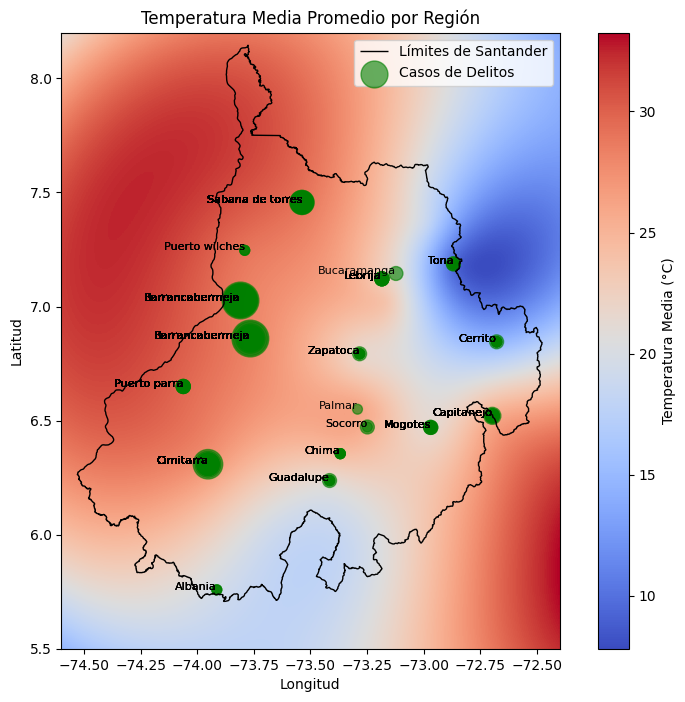

In [11]:
# Ruta de los archivos .npy
npy_folder_path = 'data/tmean_interp_final/npy/*.npy'
npy_files = glob.glob(npy_folder_path)

# Inicializar una matriz acumuladora para la suma de todas las matrices de 700x300
sum_matrix = None

# Cargar y sumar todas las matrices npy
for file in npy_files:
    data = np.load(file)
    if sum_matrix is None:
        sum_matrix = data
    else:
        sum_matrix += data

# Calcular la media dividiendo la suma por el número de archivos
mean_temperature_matrix = sum_matrix / len(npy_files)


# Cargar el archivo de límites administrativos de Colombia con Geopandas
colombia_shapefile = 'data/aoi/Departamento.shp'  # Archivo SHP o GeoJSON con límites de municipios
gdf = gpd.read_file(colombia_shapefile)

# Reproyectar los datos geográficos a WGS84 (EPSG:4326)
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")

# Filtrar para mostrar solo el departamento de Santander
santander_gdf = gdf[gdf['DeNombre'] == 'Santander']  # Asegúrate de que coincida con el nombre en el archivo

# Definir la región de límites (longitud mínima, longitud máxima, latitud mínima, latitud máxima)
region = (-74.6, -72.4, 5.5, 8.2)

# Crear el mapa de temperatura promedio
plt.figure(figsize=(10, 8))
extent = [region[0], region[1], region[2], region[3]]
plt.imshow(mean_temperature_matrix, extent=extent, origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Temperatura Media (°C)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Temperatura Media Promedio por Región')

santander_gdf.boundary.plot(ax=plt.gca(), linewidth=1, edgecolor="black", label="Límites de Santander")
# Graficar los puntos de delitos como scatter plot
plt.scatter(
    merged_df['Longitud'], merged_df['Latitud'],
    c='green', s=merged_df['casos']*50, alpha=0.6, label='Casos de Delitos'
)

# Agregar el nombre de cada municipio en el plot con la primera letra en mayúscula
for i, row in merged_df.iterrows():
    municipio_nombre = row['Municipio'].capitalize()  # Capitalizar solo la primera letra
    plt.text(row['Longitud'], row['Latitud'], municipio_nombre, fontsize=8, ha='right', color='black')

plt.legend()
plt.show()

In [12]:
np.save('data/delitos/temperatura_mean.npy',mean_temperature_matrix)

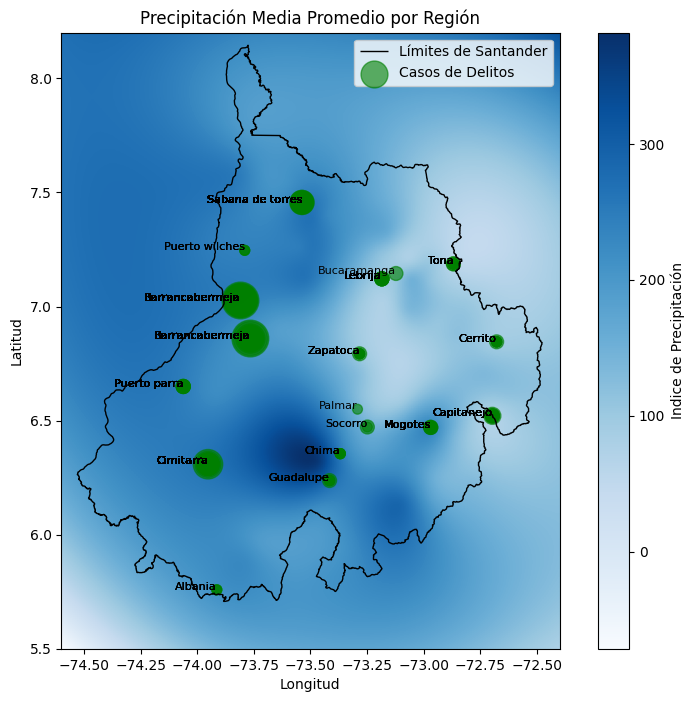

In [13]:
# Ruta de los archivos .npy
npy_folder_path = 'data/precipitacion_interp_final/npy/*.npy'
npy_files = glob.glob(npy_folder_path)

# Inicializar una matriz acumuladora para la suma de todas las matrices de 700x300
sum_matrix = None

# Cargar y sumar todas las matrices npy
for file in npy_files:
    data = np.load(file)
    if sum_matrix is None:
        sum_matrix = data
    else:
        sum_matrix += data

# Calcular la media dividiendo la suma por el número de archivos
mean_precipitacion_matrix = sum_matrix / len(npy_files)

# Crear el mapa de temperatura promedio
plt.figure(figsize=(10, 8))
extent = [region[0], region[1], region[2], region[3]]
plt.imshow(mean_precipitacion_matrix, extent=extent, origin='lower', cmap='Blues', aspect='auto')
plt.colorbar(label='Indice de Precipitación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Precipitación Media Promedio por Región')

# Dibujar los límites de Santander
santander_gdf.boundary.plot(ax=plt.gca(), linewidth=1, edgecolor="black", label="Límites de Santander")

# Graficar los puntos de delitos como scatter plot
plt.scatter(
    merged_df['Longitud'], merged_df['Latitud'],
    c='green', s=merged_df['casos']*50, alpha=0.6, label='Casos de Delitos'
)

# Agregar el nombre de cada municipio en el plot con la primera letra en mayúscula
for i, row in merged_df.iterrows():
    municipio_nombre = row['Municipio'].capitalize()  # Capitalizar solo la primera letra
    plt.text(row['Longitud'], row['Latitud'], municipio_nombre, fontsize=8, ha='right', color='black')

plt.legend()
plt.show()

In [14]:
np.save('data/delitos/precipitacion_mean.npy',mean_precipitacion_matrix)

In [15]:
# Crear el mapa de temperatura promedio
fig = go.Figure()

# Agregar la matriz de temperatura media como imagen de fondo
fig.add_trace(
    go.Heatmap(
        z=mean_precipitacion_matrix,
        x=[region[0], region[1]],  # Coordenadas en longitud
        y=[region[2], region[3]],  # Coordenadas en latitud
        colorscale='Blues',
        colorbar=dict(title='Indice de Precipitación'),
        zmin=mean_precipitacion_matrix.min(),
        zmax=mean_precipitacion_matrix.max()
    )
)

# Dibujar límites de Santander (suponiendo que tienes las coordenadas en santander_gdf)
# Puedes usar una `Scatter` lineal con las coordenadas de los límites
for geom in santander_gdf.geometry:
    x, y = geom.exterior.xy
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', line=dict(color='black'), name="Límites de Santander"))

# Agregar puntos de delitos
fig.add_trace(
    go.Scatter(
        x=merged_df['Longitud'],
        y=merged_df['Latitud'],
        mode='markers+text',
        marker=dict(
            size=merged_df['casos'] * 5,  # Aumentar tamaño de puntos
            color='green',
            opacity=0.6
        ),
        text=merged_df['Municipio'].str.capitalize(),  # Capitalizar nombres
        textposition='top right',
        name='Casos de Delitos'
    )
)

# Configurar el layout
fig.update_layout(
    title='Precipitación Media Promedio por Región',
    xaxis=dict(title='Longitud', range=[region[0], region[1]]),
    yaxis=dict(title='Latitud', range=[region[2], region[3]]),
    showlegend=True
)

fig.show()


ValueError: 
    Invalid value of type 'array.array' received for the 'x' property of scatter
        Received value: array('d', [-73.77428553813112, -73.77413477797924, -73.77399831459506, -73.77397702229854, -73.77397743057138, -73.77413644497277, -73.77431681181699, -73.77468465385441, -73.77498746986655, -73.77540543203104, -73.77580170870161, -73.77634196612703, -73.77683899106073, -73.77739352872402, -73.77845939922358, -73.7794747778422, -73.78020924196188, -73.78117411620707, -73.7817934007859, -73.78243421944285, -73.78290220064976, -73.78336281524757, -73.78372260601378, -73.78430508963942, -73.78471513506238, -73.78514682720969, -73.78550675094552, -73.7858234956535, -73.78629865983729, -73.78737877132141, -73.78803415166223, -73.78855995014115, -73.78905700812503, -73.78992168360514, -73.7909019463847, -73.79107537820406, -73.79130637090722, -73.79142206594983, -73.79142251671989, -73.79111324919339, -73.7907174029787, -73.7901271793913, -73.78938576079211, -73.78873786466262, -73.78808281372207, -73.78747094367674, -73.78696004175653, -73.78663661095794, -73.78665142656979, -73.7867022658526, -73.78681782621231, -73.78658768291919, -73.78628523143688, -73.78578115961443, -73.78485204991217, -73.78412455795039, -73.78348335967284, -73.78231588904518, -73.78184736912272, -73.7814654096668, -73.78108359083693, -73.78075950623986, -73.78040677766421, -73.78006867380483, -73.77975945187083, -73.77949348844423, -73.77947302257682, -73.7795311261134, -73.77944510787705, -73.77920041265736, -73.77848017231604, -73.77764467370682, -73.77678768772192, -73.77608918357114, -73.77549164702691, -73.7748077933222, -73.77382182637194, -73.7732965495836, -73.77305198889603, -73.77310263643626, -73.7732900316985, -73.77366468176864, -73.77401770114804, -73.77452206282419, -73.77499766140075, -73.77540126511774, -73.77556014125389, -73.7755605264134, -73.77525171257756, -73.77485614206225, -73.77410748336867, -73.77325080400344, -73.77209170137571, -73.77140776782407, -73.77064481029554, -73.77034983486975, -73.77027092858405, -73.770265361971, -73.77020861513523, -73.77009385610363, -73.76985650006152, -73.76927356006647, -73.76753862419486, -73.7657245634053, -73.76522077821637, -73.76504810767872, -73.76493316420719, -73.76491915403575, -73.76499857058944, -73.76513559888011, -73.76605060543838, -73.76659802410731, -73.76705895107355, -73.7676421887478, -73.76821104566426, -73.768607107815, -73.76882320935896, -73.76911143240169, -73.76927728344316, -73.76932076181153, -73.76927803409535, -73.76912715168517, -73.7688322687616, -73.76846532019162, -73.76812717065269, -73.7667380555524, -73.76516890184043, -73.76467951917746, -73.76447093503218, -73.7644570298815, -73.76467369720531, -73.76494055568241, -73.76509233534675, -73.76505733784617, -73.76478432207594, -73.76447512981174, -73.76380604985727, -73.7633239272112, -73.76270484226652, -73.76196319592219, -73.7605877251545, -73.75982430283473, -73.75882319240431, -73.75850640493638, -73.75815379941496, -73.75795957463605, -73.75739877419782, -73.75673683412323, -73.75629060843052, -73.7556786363665, -73.75518893760938, -73.75325872154632, -73.75245214835918, -73.7516024944464, -73.75089700867383, -73.7505371987248, -73.74937159598588, -73.74864517338217, -73.74843679373984, -73.74843744341568, -73.74874813981424, -73.74925420415356, -73.74913938542281, -73.74887317527917, -73.74854206708522, -73.74805960915758, -73.74756260910371, -73.74638082955148, -73.74528558942013, -73.74496875297841, -73.74449360366296, -73.74414098230258, -73.74272360082266, -73.74247902193521, -73.74224180976661, -73.74190381095116, -73.74179614166215, -73.74187586424428, -73.74197703537814, -73.7421430059933, -73.74241690491237, -73.74269793336403, -73.7432309562124, -73.74404481898581, -73.74498790658208, -73.74580142982666, -73.746586192043, -73.74732060668897, -73.74805507459683, -73.7490707934365, -73.74965450138156, -73.74986362694497, -73.75003676575083, -73.75009481466292, -73.750066364361, -73.74982938117209, -73.74958480133557, -73.74913150607533, -73.74851969414047, -73.74774936519707, -73.74698619621137, -73.74634549138383, -73.74563291472003, -73.74502835530363, -73.74413621679231, -73.74376231334665, -73.7433812582358, -73.7428563331403, -73.7421516980529, -73.74177054706388, -73.74146845629498, -73.74119513740715, -73.74058352042283, -73.74001481723595, -73.73961168424931, -73.7389419778597, -73.73809225889579, -73.73722796603911, -73.73646459869725, -73.73578769227956, -73.73524762386879, -73.73492362472142, -73.73460691081644, -73.73417995680886, -73.7336764049401, -73.73324488044268, -73.73262229325186, -73.73235884193936, -73.73231201109341, -73.733249293251, -73.73413772221919, -73.7358904326653, -73.73701898813195, -73.73757189016251, -73.73771655271233, -73.73759728257356, -73.73709411776706, -73.73644670981533, -73.73577500435844, -73.73431116986167, -73.73342345971518, -73.73258385400678, -73.73085650441107, -73.72960909542742, -73.7289136038394, -73.72850630623213, -73.72785912664922, -73.72752428391954, -73.7268050683997, -73.72603773179647, -73.72455086257852, -73.7229436088706, -73.72205601484346, -73.72169552105287, -73.7215128067721, -73.72116892196536, -73.72102533664942, -73.72085925791558, -73.7211329588931, -73.72137230265726, -73.72160107906507, -73.72185125544019, -73.72218870164318, -73.72247130868205, -73.72281079869141, -73.72314231216357, -73.7234529715625, -73.72364824057613, -73.72386470223051, -73.72413808699794, -73.72446003709632, -73.72469005809687, -73.72485662185619, -73.72499257834944, -73.72522730104163, -73.72534331563146, -73.7254433569538, -73.72552414071608, -73.72559471045166, -73.72562241795838, -73.72565268168417, -73.72562286563411, -73.72558876332053, -73.72542168134001, -73.72523792903581, -73.72509929698477, -73.72493872512453, -73.7246641936743, -73.72453885599634, -73.72435544919254, -73.7242037139472, -73.72398041771037, -73.72367723827102, -73.72343359079942, -73.72324897920437, -73.72300430998403, -73.72282204405724, -73.7226663002536, -73.72249711919787, -73.72238561683896, -73.72224172626059, -73.7219586392227, -73.72179090826612, -73.72163019660927, -73.72153319119589, -73.72136918804719, -73.72124911716185, -73.72116347187585, -73.7210492026864, -73.72089851127177, -73.72076439485963, -73.72066386160958, -73.72059741692222, -73.72051405220117, -73.72045870196321, -73.7204252729856, -73.72040626081062, -73.7203920186506, -73.7203921821564, -73.72041858362535, -73.7204477577411, -73.72051533103004, -73.7206117280781, -73.72066963469673, -73.72074665736933, -73.72085247109939, -73.72099674130973, -73.72107367168572, -73.7212178917684, -73.72146777631822, -73.72168878526992, -73.721986682646, -73.72239971880349, -73.72258219607417, -73.72308151205569, -73.72350403086075, -73.72372489793094, -73.72426262115603, -73.7248580483618, -73.72529979818383, -73.72562642522462, -73.72600104121977, -73.72627963638422, -73.72657747116298, -73.72681778880653, -73.72710611315689, -73.72726019678983, -73.72727967419594, -73.72719357902004, -73.72704010034292, -73.72678104928644, -73.72649309417956, -73.72617633224812, -73.72570585258916, -73.72537940896291, -73.7249185050857, -73.72454393138406, -73.72418854796801, -73.72388116276785, -73.72361221674085, -73.7232952718083, -73.72302634241395, -73.72272866304876, -73.72245981545083, -73.72214299389826, -73.72173022640447, -73.7213079249783, -73.72098164609343, -73.7207226144186, -73.72042519984316, -73.72021425778057, -73.720003249584, -73.71984988080135, -73.71968688800622, -73.71953351871426, -73.7193898007509, -73.71930351280521, -73.71927482344441, -73.71925579894078, -73.71922717532543, -73.71936177805296, -73.71953468733105, -73.71991871123159, -73.7203698479392, -73.72064823538292, -73.72096496256417, -73.72125295005357, -73.72151213832667, -73.72191531893975, -73.72224170469107, -73.72276967165185, -73.72309614039615, -73.72337456013013, -73.72373943362585, -73.72404670184896, -73.7243828432695, -73.72465171284706, -73.72489181639803, -73.72526639609752, -73.72562179240828, -73.7259003834415, -73.72627501779202, -73.72672654701692, -73.72704352722842, -73.72737020429497, -73.72762959425651, -73.72785069154645, -73.7278508791683, -73.72782230936686, -73.72774577298803, -73.72754438838639, -73.72738129518342, -73.72708384174472, -73.72682472958017, -73.72651759696232, -73.72615283358367, -73.72593205405657, -73.7257016669997, -73.72552887669279, -73.72529848961443, -73.72501048957159, -73.72472241617473, -73.72444395783599, -73.72410788722836, -73.72381986204121, -73.72351260532771, -73.72311896895937, -73.72277338863294, -73.72242900673838, -73.72218901526527, -73.72189506811068, -73.72159513091344, -73.72133120339309, -73.72112128180997, -73.72090535721887, -73.7206354664109, -73.72035960640366, -73.72014371181805, -73.71994584785354, -73.71974802643962, -73.71957429211669, -73.71955201667096, -73.71962903728173, -73.71971568964095, -73.71989831976714, -73.720109764795, -73.72031155178017, -73.72059975782578, -73.72081117692295, -73.72099377209756, -73.72127247734285, -73.72146467182117, -73.72161850128342, -73.72178186408473, -73.72199347176831, -73.7221955290905, -73.72226293902469, -73.72233994776815, -73.72240736708216, -73.7224555686377, -73.72249421435893, -73.72253274398678, -73.72255213164716, -73.72255227172556, -73.72257161131776, -73.7225719001127, -73.72256252390028, -73.7225243494271, -73.72239981468687, -73.72228489619307, -73.72209326740891, -73.72196863428807, -73.72179602096138, -73.72165227329447, -73.72147009431795, -73.7213838673409, -73.72135532640915, -73.72132680967546, -73.72132698316973, -73.72140395123809, -73.72156743494136, -73.72171161309178, -73.7219422574519, -73.72232653829262, -73.72270115167083, -73.72309493971083, -73.72333510813398, -73.72347926666767, -73.72361388568588, -73.72378697395158, -73.72388328612038, -73.72392219980492, -73.72393207042055, -73.72392286459193, -73.72380799554591, -73.72369300489078, -73.7235587980922, -73.7234437252122, -73.72323275105212, -73.72282982082935, -73.72261870776802, -73.7222540193461, -73.72203324138724, -73.72170689833882, -73.72136134077144, -73.72106377119522, -73.72084299320251, -73.72033422681181, -73.71995024863214, -73.71973906138436, -73.71942230133973, -73.71915352836416, -73.71892315073887, -73.71874077762018, -73.7184624887705, -73.71817455080627, -73.71792504321023, -73.71769476700251, -73.71733015389128, -73.7170806877339, -73.7168311893592, -73.71658167261324, -73.71634173879359, -73.71616897429867, -73.71574662561711, -73.71552582322836, -73.71520900471971, -73.71506496916584, -73.71488253733023, -73.71469048126762, -73.71439279263646, -73.71415270795326, -73.71398941480298, -73.71377812570896, -73.71357634418457, -73.7134034343315, -73.71319211210773, -73.71296150568142, -73.7126541406811, -73.71248123994536, -73.71227946419121, -73.71209697158044, -73.71195285938519, -73.71181836080152, -73.71167428214248, -73.71150138779021, -73.71124207673816, -73.7110307438211, -73.71074266031128, -73.71047377134457, -73.71035851840541, -73.71028168156776, -73.7101808413398, -73.7101088051713, -73.7099599757822, -73.70985914257078, -73.70966710957909, -73.70953270537953, -73.70937909034961, -73.7092782650523, -73.70913907795654, -73.70900949941336, -73.70884633118222, -73.70867836944753, -73.70855362830267, -73.70839529036675, -73.70828975473158, -73.70810747612725, -73.70794438513698, -73.70771411859855, -73.70757979158056, -73.70746468892708, -73.70733520938737, -73.70718170130502, -73.7070762136741, -73.70689391776074, -73.70678841498484, -73.70657258638062, -73.70645270057308, -73.70616489798164, -73.70606898877413, -73.70583876319569, -73.70572367844521, -73.70556538398546, -73.70537833697156, -73.70516254021838, -73.70498989644983, -73.70481245212684, -73.70465422875752, -73.70449599194538, -73.70431379263694, -73.70416995903246, -73.70404050670618, -73.70389669962807, -73.7037864456636, -73.70358510978538, -73.70350848705667, -73.70341265266399, -73.70330723428435, -73.70319226831742, -73.70309165173764, -73.70301506855643, -73.70294813317791, -73.70291464961191, -73.70289082560693, -73.70284788276284, -73.70284332330678, -73.70283867702639, -73.70283416258877, -73.70283444115348, -73.70285387402623, -73.70285398326968, -73.70287886174901, -73.7029175189339, -73.7029466112661, -73.70302366330131, -73.7031007580208, -73.70313931763548, -73.70313953515634, -73.70317809563664, -73.70314003032024, -73.70297711132385, -73.70279483710476, -73.70243031630973, -73.70223840926161, -73.70201767129889, -73.70176816177975, -73.70143231657116, -73.70101968121902, -73.70065505664775, -73.70035759845405, -73.69996423958999, -73.69967645099285, -73.69931192398784, -73.69893780819527, -73.6985444766684, -73.69814159237409, -73.69778666738074, -73.69755648133491, -73.69748342102716, -73.6974223366015, -73.69738646425094, -73.69734698917664, -73.69733267973213, -73.6973184239574, -73.69730775405569, -73.69730070982418, -73.69729723639809, -73.69729738863647, -73.69731195878455, -73.69731214389074, -73.69733389871622, -73.69736241474483, -73.69737364611538, -73.6973953520784, -73.69739966427746, -73.69740621695638, -73.69741377321877, -73.69742066769275, -73.69744232781639, -73.69746042106111, -73.6974820980511, -73.69749658764854, -73.69750743261618, -73.69753633493694, -73.69755081155616, -73.69756529601507, -73.6975870048974, -73.69760871468215, -73.69762681781762, -73.69764489502509, -73.69765938456548, -73.69766304394176, -73.69767032893876, -73.697674001269, -73.69767406997441, -73.69768136491119, -73.69768147129402, -73.69767913486811, -73.69767681371691, -73.69767450131866, -73.69767453556553, -73.69766021722276, -73.69765067307142, -73.69764593083534, -73.69763396558876, -73.69761961581668, -73.69760287780271, -73.6975789704483, -73.69756220330277, -73.6975478595815, -73.69751433084167, -73.69748081185695, -73.69745925297926, -73.69741131945355, -73.69734421441335, -73.69730587920334, -73.69726755326334, -73.69721961286099, -73.697169271269, -73.69713811326388, -73.69707577180803, -73.69697745236648, -73.69693188495519, -73.69689112035228, -73.6968191537915, -73.69674479621409, -73.6966632429883, -73.69653370265138, -73.69642096322079, -73.69632739665626, -73.69623383241512, -73.69604048273013, -73.69592652744038, -73.6957885795816, -73.69565061568268, -73.6955006537277, -73.69541667175513, -73.69521870593975, -73.69494873293812, -73.69473273108109, -73.69459472869454, -73.69448672190207, -73.69433672678488, -73.69420471754668, -73.69405469641333, -73.69388069342055, -73.69373669680087, -73.69355070736042, -73.69337072725223, -73.6931967349444, -73.69304675674833, -73.69290277713382, -73.6927827945726, -73.69258485106482, -73.6923809143967, -73.6922159666, -73.6920930036803, -73.69202102605786, -73.69191605755819, -73.69184407362488, -73.69171451833418, -73.6915753702889, -73.69141701071604, -73.69123944990591, -73.69106190699206, -73.69086036325938, -73.69070195000333, -73.69062514695601, -73.69053392902183, -73.69048111359915, -73.69039949862854, -73.69030827214115, -73.69023625542503, -73.6901113826371, -73.68997691713378, -73.689895238794, -73.6898231596188, -73.68971263156624, -73.68960206841763, -73.6895155676098, -73.68943386726451, -73.6893905704509, -73.68932807899492, -73.68921275566194, -73.68910700024588, -73.68901090081927, -73.68887641185594, -73.68875148988597, -73.68865060482581, -73.68856894765834, -73.68846330362838, -73.68837203096487, -73.68829039825721, -73.68817038656506, -73.6880359739771, -73.68793518823311, -73.68781521820497, -73.68769523961407, -73.68758487266747, -73.68746972980199, -73.68735459462697, -73.68722990292146, -73.68714840896457, -73.68706693877485, -73.68697110119018, -73.68691846314955, -73.686856257346, -73.68685637917942, -73.6868373862242, -73.68681824295241, -73.68678482364295, -73.68676570798065, -73.68670822489301, -73.6866555052557, -73.68651636112939, -73.68630519604926, -73.68613718367276, -73.68596435443862, -73.68582990114132, -73.68566186573247, -73.68554662323486, -73.6854217996282, -73.68523454544221, -73.68496566984923, -73.68481199571245, -73.68467273374408, -73.68453347558473, -73.68438945983044, -73.68415899700535, -73.68388538622776, -73.68368857155964, -73.68351096489374, -73.68331417887269, -73.68317977078341, -73.68301659940389, -73.68285345406423, -73.68267594734654, -73.68257519827047, -73.68245049431238, -73.68239295740017, -73.68232104475463, -73.68226353967603, -73.6822108804343, -73.6821726278639, -73.68217269237564, -73.68216798427814, -73.68216808539971, -73.68220178584748, -73.68222107397473, -73.68224037740157, -73.68228852100924, -73.6823607261823, -73.68241366931237, -73.68243778485831, -73.68246674137359, -73.68252451099492, -73.68257747229094, -73.68263038828245, -73.68270734082887, -73.68277465939012, -73.6828708332312, -73.68299093775671, -73.68314001129573, -73.6832213809862, -73.68337980323625, -73.68355742285844, -73.68377822634115, -73.68399422631673, -73.68421024355561, -73.68439746600052, -73.68464713292913, -73.68477199601449, -73.68494966503137, -73.68509379331938, -73.68524269812089, -73.68537725476676, -73.68547334484849, -73.68556953907623, -73.68565133543835, -73.68567814098078, -73.68570924854707, -73.68574081984951, -73.6857384205602, -73.68573861642177, -73.68573659446844, -73.68570536642254, -73.68565281890581, -73.68560501741179, -73.68554609736164, -73.68549024416984, -73.68546637939882, -73.68542334038625, -73.6853803023143, -73.68531803935838, -73.6852862796021, -73.68526057983729, -73.68520308010376, -73.68512641483129, -73.68503537879334, -73.68494912505766, -73.68487242830807, -73.68476695930329, -73.68472628295697, -73.6846908648889, -73.68460996316806, -73.68451706591009, -73.68444813219378, -73.68438219869134, -73.68430726562048, -73.68422937480806, -73.68417244366654, -73.68414550304773, -73.68408561972953, -73.68404674394449, -73.68403486821985, -73.68403501893651, -73.68402312572019, -73.68402050259621, -73.68401571578292, -73.68403985435053, -73.68404596712335, -73.68404608143729, -73.68405824982347, -73.68405840379077, -73.68407653742135, -73.68408271288617, -73.68408870861394, -73.68406612310454, -73.68405315037292, -73.68396935212516, -73.68388553091029, -73.6837836230922, -73.6836996709292, -73.68358572477767, -73.68341777061508, -73.68322579779755, -73.68314172088776, -73.68296165515545, -73.68278751285129, -73.6827454571932, -73.68261331392756, -73.68249920196708, -73.68231305029568, -73.68221091928561, -73.681988635774, -73.6818685638892, -73.68161648143293, -73.68135239267126, -73.68111835727842, -73.68077034087491, -73.68051225657157, -73.68030218300763, -73.6800201380297, -73.67968409466219, -73.67935406911505, -73.67883805082292, -73.67870600329786, -73.67836995542496, -73.67814193413663, -73.67786591000406, -73.67760791770365, -73.6773678823142, -73.67715785889777, -73.67679183755924, -73.6762633294352, -73.67617936991265, -73.67578347686775, -73.67501595314087, -73.67480205424427, -73.67462884908716, -73.67446368403778, -73.67444772484495, -73.6743210470842, -73.67427141410731, -73.67429179355925, -73.67435611125936, -73.67442625195449, -73.67451971297675, -73.67460154669318, -73.67490506827951, -73.67512686578917, -73.67531360576366, -73.67544198905905, -73.67552368780984, -73.67565207096949, -73.67572216609419, -73.67578065672184, -73.6758509096632, -73.67587450102212, -73.67594472006157, -73.67600332363577, -73.67607350875957, -73.67614387356886, -73.67620233093618, -73.67622584177617, -73.67624947758888, -73.67624995110401, -73.67618038683504, -73.6761340177534, -73.67599451825919, -73.67587833820663, -73.67542469067196, -73.67528798092135, -73.6752035518685, -73.6750757472642, -73.67507057879631, -73.67504103939515, -73.67494803278001, -73.67483162760753, -73.67462192289791, -73.67438893334861, -73.67356169786576, -73.6732821267303, -73.67311910710154, -73.67299096510966, -73.67283961673645, -73.67271164544395, -73.67261870930977, -73.67261899329607, -73.6726192321064, -73.67258449228412, -73.67257310542352, -73.67257329819226, -73.6725735592302, -73.67264373311549, -73.67273966728625, -73.67278388616218, -73.67292407315546, -73.67316932074027, -73.67345842998797, -73.67353152568236, -73.6736717577435, -73.67373032712885, -73.67385922666817, -73.67389438712176, -73.67403457161298, -73.67410469917222, -73.6742214858012, -73.67432665765212, -73.67449017291959, -73.67467703030091, -73.67485218092769, -73.67500392294166, -73.67520232462579, -73.6753890792865, -73.67566922010481, -73.67586755424165, -73.67607744626942, -73.67626405192449, -73.67652068306595, -73.67676574398496, -73.6768824500127, -73.67696420083678, -73.67697601671583, -73.67711609843899, -73.67726496986538, -73.67739624876819, -73.6774779646044, -73.67754807827788, -73.67757156538276, -73.67759510813521, -73.6775952760452, -73.67759544396128, -73.67753435157691, -73.67746759484109, -73.67715306333899, -73.67702497909357, -73.67694361088247, -73.67694405982886, -73.67699097775123, -73.67708449896847, -73.67710803101039, -73.67713151823433, -73.67716666404245, -73.67743519712911, -73.67756369539795, -73.6776454779937, -73.67770397626181, -73.67772677480207, -73.67777413303801, -73.67782099365263, -73.6778328320381, -73.6778329781007, -73.67783320087013, -73.67782173314981, -73.67776358206297, -73.67774038739563, -73.67772894076973, -73.67767088023085, -73.6775778077317, -73.67750932487944, -73.67691389842867, -73.67661117463287, -73.67644229438328, -73.67620378033443, -73.67588154644709, -73.67580785309028, -73.67563321358423, -73.67502022917456, -73.67437972741136, -73.67375987211946, -73.67361880760403, -73.67310832944194, -73.67267787909547, -73.67242770313429, -73.6721273790348, -73.6719170651316, -73.67188635297127, -73.67188695898773, -73.67197992690143, -73.67199630624036, -73.67199647236144, -73.67198104770021, -73.67196562396174, -73.6718569581242, -73.6717017019925, -73.6715930223895, -73.67148435683283, -73.67136013119386, -73.67124639565553, -73.67114269535958, -73.67084770890271, -73.67077797171738, -73.67077811977019, -73.6708132555775, -73.67095319717552, -73.67108144517053, -73.67120763881564, -73.67127962304211, -73.6715010513775, -73.67210705315232, -73.67237519644097, -73.67257338655929, -73.67286485930136, -73.67307749983826, -73.67319141042712, -73.67342472415555, -73.67359967536457, -73.67377305139888, -73.6738097047231, -73.67396156383245, -73.67404345868265, -73.67406703563861, -73.67406727307564, -73.67391610289374, -73.67378810419655, -73.67339249539509, -73.67325454687717, -73.67292696821444, -73.67253147520292, -73.67214760784263, -73.67175193720128, -73.67141443629022, -73.671251736054, -73.67087940838994, -73.67060047584071, -73.6705892267185, -73.67058987464593, -73.67060178373974, -73.67066034979305, -73.67088243100959, -73.67115107798566, -73.671384567017, -73.6717462663472, -73.6721778696726, -73.67260895541578, -73.67264347270745, -73.67278448734115, -73.67362443164957, -73.67414939162326, -73.67499325472689, -73.6751175877146, -73.67518515497855, -73.67533931271004, -73.67553760828, -73.67571258718604, -73.67591084843379, -73.67610909763388, -73.67629564471227, -73.67655212111444, -73.67683193616263, -73.67708845579422, -73.6774033351719, -73.67769489784581, -73.67791640892969, -73.67809127503948, -73.67824279069406, -73.6783942733743, -73.67851081294195, -73.67866230580317, -73.67908187801262, -73.67940081256582, -73.67966472476782, -73.67981628639015, -73.6800028661925, -73.68018945689477, -73.6803760712502, -73.68057435427946, -73.68072600326721, -73.68088929905291, -73.6809913760079, -73.6811540018505, -73.68128126665682, -73.68142072085288, -73.68172504018223, -73.68211068287799, -73.6826483254469, -73.68310691182123, -73.68364525254982, -73.68432316463092, -73.68483159862933, -73.6852802172478, -73.68541553781309, -73.68553787918157, -73.68557201687254, -73.68563498654768, -73.68577402304487, -73.68585007932091, -73.68598288020046, -73.68603791638886, -73.68614966494106, -73.68622566543142, -73.68647916231744, -73.68650924725425, -73.68665268940322, -73.68690867635104, -73.68701220004587, -73.68716020258834, -73.68760306100276, -73.6881114943874, -73.68859001962396, -73.6889090365911, -73.68917820795576, -73.68935403524635, -73.68955987517278, -73.68968083576313, -73.68981624308057, -73.69003165000022, -73.6902050446755, -73.69050412358817, -73.69062423809507, -73.69075924569104, -73.69093550004068, -73.69107184645149, -73.69116552127753, -73.69120197355937, -73.69139138972595, -73.69158080716916, -73.69188673919221, -73.69191855874803, -73.69205800030781, -73.69212783382855, -73.6922152901715, -73.69225280622128, -73.69238591468552, -73.69248262332273, -73.69260133482138, -73.6927284073686, -73.69281699841937, -73.69330549324188, -73.69336530915385, -73.6933434899705, -73.69337006772368, -73.69331546287448, -73.69329552439261, -73.69327558566498, -73.69326034997884, -73.69321651603357, -73.69304629216137, -73.6928768138031, -73.69280702927483, -73.69287420228706, -73.69290940101523, -73.69319583063621, -73.6933350209552, -73.69351484812216, -73.69365455374908, -73.6939734360116, -73.69450180764007, -73.69477994756252, -73.69529935086179, -73.69631621767999, -73.6969841607851, -73.69738293238971, -73.69769198025728, -73.69779408781064, -73.69790694800632, -73.69794384229947, -73.6979915840763, -73.6980013099348, -73.69799279880351, -73.6977476097758, -73.69764215768461, -73.69749432288395, -73.69719882177138, -73.6970215213015, -73.69692020599568, -73.69689487812022, -73.69694553499467, -73.6970384069405, -73.69719132307031, -73.69723259296977, -73.6978404817434, -73.69813598323356, -73.69859189927531, -73.6988705147322, -73.69911535868646, -73.69948684621144, -73.69973989918712, -73.699808730567, -73.69984683778854, -73.7000525204078, -73.7002382640309, -73.70051687958625, -73.7006772945698, -73.70084615276109, -73.70105722487133, -73.70137086417168, -73.70155535633626, -73.7019184001127, -73.70210414405743, -73.70214373184724, -73.70220191299636, -73.70245528494142, -73.70303504644903, -73.70345685778618, -73.70367618994626, -73.70373030582368, -73.70381873684472, -73.70397638075379, -73.7040490047292, -73.70420625717412, -73.70428860617494, -73.7044272248287, -73.70447950475106, -73.70456640959793, -73.70461180829331, -73.70474734874846, -73.70484883384854, -73.70514076837871, -73.70534256175796, -73.70588675538444, -73.70619174133535, -73.70666565314528, -73.7068107635711, -73.70701082863447, -73.70710546662472, -73.70736955545136, -73.70752880811098, -73.70776798017701, -73.7078320268716, -73.70790910658454, -73.7079499091584, -73.70810518857868, -73.70820123225917, -73.70879641479704, -73.70941240986093, -73.70960263137302, -73.70991054798442, -73.71018145331016, -73.71045235561337, -73.71057397806976, -73.71087341339809, -73.71120410688651, -73.71156468303286, -73.71210501000742, -73.71313363955106, -73.71337623892407, -73.71373366808346, -73.7142373465609, -73.71516355674515, -73.71598420767671, -73.71688615993625, -73.71740627718069, -73.71765012164362, -73.71818671783213, -73.7184794674354, -73.71860963997975, -73.71869700699058, -73.71873981237371, -73.71884563336755, -73.71893514708947, -73.71913856808119, -73.719179295824, -73.71925255166944, -73.71927702872297, -73.71925671041737, -73.71925663884274, -73.7192558045854, -73.71925410662864, -73.71925146925642, -73.71924797499615, -73.71924384008709, -73.71923761053972, -73.71923134206976, -73.71921584410175, -73.71919662422292, -73.71917378585701, -73.71914745057572, -73.71912560356861, -73.7191004769863, -73.71907183919741, -73.71903915606006, -73.71901532019083, -73.71898679209816, -73.71886978846473, -73.71882329270589, -73.7187697478784, -73.7187246757061, -73.7186852210619, -73.71865059108916, -73.71861568529535, -73.71858315901471, -73.71855308887076, -73.71852554513957, -73.71850079271772, -73.71847826161206, -73.71845799205651, -73.7184400215953, -73.7184235605276, -73.71841078802048, -73.71840129560793, -73.7183949603475, -73.71838642352891, -73.7183842987217, -73.718387110165, -73.71839557044069, -73.71840942107347, -73.71842624959113, -73.71844798852669, -73.71847484237664, -73.71850458986783, -73.71853054931246, -73.71855695866509, -73.71858447166834, -73.71860836206396, -73.71863876271703, -73.71869501607253, -73.71874136878145, -73.71879135859157, -73.71884596387449, -73.7189128520369, -73.7189816094447, -73.71904300031622, -73.71910237825412, -73.71915733928225, -73.71919714236685, -73.7192424859356, -73.71926951767526, -73.71932491043012, -73.71935143336793, -73.71938488096157, -73.71942508655322, -73.71957279178152, -73.71962767233333, -73.71970818898546, -73.71979010896986, -73.71987437710112, -73.7199629887445, -73.72007498330598, -73.7201079650403, -73.72013524072088, -73.72016404339145, -73.72021877455776, -73.72024613644894, -73.72027816829278, -73.72029513794321, -73.72031852303888, -73.7203390964113, -73.72036218333167, -73.72038710880551, -73.72041549767796, -73.7204491517481, -73.72048332575623, -73.72056377618757, -73.72066301096889, -73.72076281103755, -73.720861118243, -73.72098395590325, -73.72102567675825, -73.72106363785463, -73.72111029245404, -73.7211365090432, -73.72119625977666, -73.72127149500832, -73.72134304825629, -73.72138686665798, -73.72143075987307, -73.72148669585, -73.72163001041739, -73.72176523981844, -73.72189428022892, -73.72201814237758, -73.72213594990536, -73.72225022630609, -73.72236126830134, -73.72246928187954, -73.7225696865779, -73.72282529297486, -73.72294342782781, -73.72308691013356, -73.72322271383028, -73.72332052130668, -73.72341886764505, -73.72351759587639, -73.72361654268133, -73.72371538873374, -73.72381301723236, -73.72390927939871, -73.72400404641114, -73.72411539257705, -73.72422799687745, -73.72434175046426, -73.72445652816559, -73.72464207824267, -73.72470905173171, -73.7247689651371, -73.7248348396711, -73.72487615275496, -73.72490651149523, -73.72493704287459, -73.72496771517089, -73.72499848760674, -73.7250519424234, -73.72510051729286, -73.72514167982128, -73.72518013043842, -73.72521622026535, -73.72523145327213, -73.72524194763395, -73.72524555331935, -73.7252434228328, -73.72522790206087, -73.72521150582926, -73.7251628206974, -73.72512559181537, -73.72508809686232, -73.72505029219872, -73.72501215691254, -73.72497408567855, -73.72493456108779, -73.72489396474862, -73.72485266459532, -73.72482304657797, -73.72478901082849, -73.72466636712907, -73.72461886927603, -73.72453828764687, -73.72437038685949, -73.72429599411257, -73.72417286103028, -73.72404311705331, -73.72394182132173, -73.72384081145786, -73.72374019097725, -73.72364005067774, -73.72356216156156, -73.72341540865138, -73.72335764797442, -73.72329941632864, -73.72324850831777, -73.72319424317175, -73.7231368371349, -73.7230749587898, -73.72300218170142, -73.72293856882995, -73.72287077457293, -73.72279743638934, -73.72269818076067, -73.72255600629278, -73.72249677125855, -73.72246694288059, -73.72244041233303, -73.72241668237704, -73.72239551480251, -73.72234557703159, -73.72232766763638, -73.72231325639537, -73.72230347521457, -73.72229500540308, -73.72228753113023, -73.72228030242451, -73.72224221120081, -73.72224253634815, -73.72225138061462, -73.72226210834724, -73.72227501110521, -73.72228980821387, -73.72231117446952, -73.72233660519956, -73.72236616824352, -73.72240004460349, -73.72243285844735, -73.72246835898038, -73.72250626001816, -73.72254621463388, -73.72260147690288, -73.72269058008705, -73.72277055965482, -73.72286141974875, -73.72296050356525, -73.72313159928846, -73.72321451116163, -73.72330858457678, -73.72362800305692, -73.72374630971868, -73.72386118918992, -73.723961567734, -73.72408732680111, -73.72417430035271, -73.7242371230414, -73.72429220683189, -73.72434146074829, -73.72438555243447, -73.72444640332068, -73.72447012989024, -73.7244877208007, -73.72449731287904, -73.72451682305729, -73.72452402712644, -73.72452941900404, -73.72453438132152, -73.72453722898229, -73.72453902493703, -73.72453922121657, -73.7245380213301, -73.72453553228745, -73.72452751701354, -73.72451673075508, -73.72450318592513, -73.72448491446931, -73.72446637219946, -73.72442471121299, -73.72439682179957, -73.7243633998398, -73.7243295785317, -73.72424745899502, -73.7241863011828, -73.72411784065972, -73.72404100859121, -73.72388109654842, -73.72381280750614, -73.72374164220734, -73.72367884645053, -73.7235473577793, -73.72349237666607, -73.72344188722185, -73.72339197881769, -73.72333744579318, -73.72316321602771, -73.72296520861265, -73.7227721564201, -73.7225843346752, -73.72240198409628, -73.72222474790249, -73.72213756106459, -73.72205527211177, -73.72198470616986, -73.72189489373955, -73.72186919834834, -73.72184869591511, -73.72182087053558, -73.72178843733239, -73.72177405708774, -73.72176111904948, -73.72172292482279, -73.72170270840195, -73.72166075546716, -73.72161679437491, -73.72157524913749, -73.72154246444343, -73.72152101904912, -73.72149734264327, -73.72144373509182, -73.72141326917865, -73.72138066978255, -73.72134616317595, -73.72129961813788, -73.72125756695326, -73.72119010707192, -73.72115539013738, -73.72111131558006, -73.7210676381734, -73.72096998528869, -73.72091911102702, -73.72086776008032, -73.72081593244631, -73.72075667906644, -73.72072764689531, -73.72071372200682, -73.7207015347473, -73.72069420107138, -73.72069242278289, -73.72069360921209, -73.72069675648913, -73.72070204299727, -73.72070954696375, -73.7207383466302, -73.72077326138456, -73.72079051453866, -73.72080847338019, -73.7208312811849, -73.72085626600449, -73.72088330583746, -73.72091226869493, -73.72094332917109, -73.7209764709743, -73.72101153396349, -73.72104834619233, -73.72108701629777, -73.72112760671936, -73.72116992730875, -73.72121378427582, -73.72128582836068, -73.72136161517444, -73.7214399034391, -73.72152354090368, -73.72156317803847, -73.7216092403756, -73.72176071744326, -73.72181156349241, -73.72185642208942, -73.72189520385467, -73.72192723679386, -73.72196100083573, -73.72208858906976, -73.72214635872012, -73.72220533479039, -73.72226754856206, -73.72233302178026, -73.72240179432532, -73.72245802211307, -73.72252064282625, -73.72268724122748, -73.72275389903253, -73.72282858312533, -73.72312800600035, -73.7232552534378, -73.72347121903572, -73.7237500476048, -73.72383917320941, -73.7241288808954, -73.72417062988487, -73.72421068168299, -73.72425092709348, -73.7247450226256, -73.72475865855293, -73.72477549117038, -73.72479730803505, -73.72480662969446, -73.72484322876227, -73.72487256264674, -73.72488477450754, -73.72489523872129, -73.7249039112262, -73.72491075522427, -73.72491565439599, -73.72491859983363, -73.72491989644236, -73.72491997769187, -73.72491588703649, -73.72490574998692, -73.72489071517921, -73.72485931574863, -73.72484172670833, -73.72481800317802, -73.7247305725793, -73.72470244245272, -73.72468025274853, -73.72466446132958, -73.72464863717457, -73.72464023600439, -73.72463619970567, -73.72463476322697, -73.72463598125523, -73.72463865963623, -73.7246499770601, -73.72465711682555, -73.72466544869681, -73.72467693063804, -73.72469042768225, -73.72470572103563, -73.72472256104443, -73.7247410455001, -73.72476133545538, -73.72478310220697, -73.72480599342089, -73.72482977084225, -73.72485536130367, -73.72488236423163, -73.72491029741875, -73.72494838169025, -73.72499158435875, -73.72504066983325, -73.72510002711208, -73.7251472706517, -73.72519611396488, -73.72524609706468, -73.72529664377481, -73.72534687854306, -73.7253972543231, -73.72544717299253, -73.72549603455627, -73.72553931421011, -73.72558429463221, -73.72563125275674, -73.72568083968426, -73.72572983758293, -73.72578151898787, -73.7258294562753, -73.72594563534491, -73.72600942833769, -73.72608574286778, -73.72617260461776, -73.72626275098817, -73.72650930007401, -73.72658273788797, -73.72664753466222, -73.72681077778209, -73.726979250764, -73.72715469606653, -73.72734067239645, -73.72752573376212, -73.72770157892035, -73.72786894297508, -73.72802830663443, -73.72809014681172, -73.7281572120973, -73.72837535946077, -73.72845814924905, -73.7285428302647, -73.72862240367319, -73.72873278969206, -73.7288435497025, -73.72897023975817, -73.72909241260966, -73.72920900653945, -73.72932861663816, -73.72943858090332, -73.72960067831517, -73.7299418092607, -73.73004878233257, -73.73014559606709, -73.73024475533755, -73.73033888373011, -73.73042949567419, -73.73051740461243, -73.73064432007095, -73.73068521266333, -73.73072216463265, -73.73078554294828, -73.73083021137121, -73.73086995627345, -73.73090513109112, -73.73094539834143, -73.73097582795408, -73.7310036795294, -73.73103764804493, -73.73107417694376, -73.7311077188306, -73.73112462914924, -73.73114282793672, -73.73115578492876, -73.73118407288172, -73.73120858367638, -73.7312296603878, -73.73124813840118, -73.73125470756112, -73.73125963553586, -73.73126363079491, -73.73126680205064, -73.73126934080916, -73.7312703673167, -73.73127050393794, -73.73126962678559, -73.73126632073347, -73.73126047091255, -73.73125202834386, -73.7312408313136, -73.73122157461499, -73.7311751304716, -73.73115811977895, -73.7311349798549, -73.7311036612795, -73.73108345009828, -73.73106444176024, -73.73101377515971, -73.73099416614882, -73.73097219053311, -73.7309480007631, -73.73091818023497, -73.73089072858282, -73.73086692935314, -73.73081587302113, -73.73079677860113, -73.73077998659689, -73.73076857578569, -73.73076108655168, -73.7307553185578, -73.73075115622603, -73.73074813140056, -73.7307460427049, -73.73074654150025, -73.73074873720232, -73.7307525547608, -73.73075685735337, -73.73077220999039, -73.73078491022923, -73.7308063161885, -73.73082967661907, -73.73085655738798, -73.73091636543462, -73.73095745600742, -73.73099928993874, -73.73104171413863, -73.73108460177107, -73.731129760548, -73.73117666852808, -73.73122504749053, -73.73127459562308, -73.73133133230493, -73.73139394181881, -73.7314637214887, -73.73154598909494, -73.73161285923891, -73.73168286679505, -73.73175619404246, -73.73183314026531, -73.73190733034966, -73.7319831397309, -73.73206357562108, -73.7321430887034, -73.73222125064481, -73.73229976044142, -73.73237836769152, -73.73245682198407, -73.73257222603083, -73.73268764779546, -73.7327970351163, -73.73291629294899, -73.73297888467133, -73.73304760819896, -73.73331018384562, -73.73342240695354, -73.7335509508478, -73.73372504160466, -73.73387162447553, -73.73401962703596, -73.73416903476144, -73.73431983222002, -73.7344720021682, -73.73462552554604, -73.734780383292, -73.73493655543876, -73.73520130105089, -73.73540620134067, -73.73557515020072, -73.73569491401429, -73.73577329978711, -73.73585357370433, -73.73593583737262, -73.73602023684714, -73.73610408611015, -73.73618548289427, -73.73626452244284, -73.73634127187866, -73.73645543048814, -73.73659778509816, -73.73676063135515, -73.73697035940495, -73.73710446510304, -73.7372510081159, -73.73739981882036, -73.73780486365122, -73.7379291566643, -73.73804171716581, -73.73815678841058, -73.73828610142904, -73.73870856186748, -73.73885903858609, -73.73900181636778, -73.73912960034899, -73.73930950704668, -73.73943594115248, -73.73951836930809, -73.7397036791116, -73.73979188921825, -73.73986420029804, -73.73993444588122, -73.74000293061191, -73.74006984581051, -73.74016848354687, -73.74026860568462, -73.74036975061583, -73.74047144944524, -73.74060249433543, -73.74073772865204, -73.74080635040623, -73.74096634523828, -73.74104253481434, -73.74111069335427, -73.74118601132682, -73.74125488618883, -73.7414403641309, -73.74160793050302, -73.7417810674365, -73.74196093300307, -73.742149513196, -73.74238932894616, -73.7426190851331, -73.74283999955759, -73.74305287468584, -73.74325958551111, -73.74339056036561, -73.74352204454797, -73.74361432152668, -73.74369564262224, -73.74376715486898, -73.7438674554128, -73.74390859006323, -73.74394550588937, -73.74399402716614, -73.74403795214312, -73.74407738225088, -73.7441123609514, -73.7441398603763, -73.7441632058294, -73.74418314188962, -73.74419990640118, -73.74421209147997, -73.74422362357352, -73.74425572474347, -73.74427755491779, -73.74429679389306, -73.74431363789367, -73.7443283986856, -73.74433939549917, -73.74434967922276, -73.7443792251425, -73.7443926489977, -73.74441023116908, -73.74443094044827, -73.74446778780454, -73.74448452957775, -73.74450491810663, -73.74452710185236, -73.74456692945485, -73.74458306178046, -73.74460010938239, -73.74461893854424, -73.74464112300475, -73.7446669459482, -73.74469727443699, -73.74472148807915, -73.74475721948386, -73.74479951741843, -73.74484648961152, -73.74493163509396, -73.74501684008656, -73.74510959373009, -73.7451988735451, -73.74540011702341, -73.74547940718323, -73.74553033508438, -73.74558430037054, -73.74564427450021, -73.74582259891038, -73.74588139685001, -73.7459359641524, -73.74598022931815, -73.74603054797248, -73.74621754580694, -73.74629262912556, -73.74633858789277, -73.7464204706529, -73.74649209965872, -73.74659005718021, -73.74668803088211, -73.74678644736588, -73.74688603201916, -73.74696584166546, -73.74700804698462, -73.74704586619204, -73.7470770702059, -73.74710883076328, -73.74713910716761, -73.74716390264929, -73.74720455363536, -73.74722249016222, -73.74724345462194, -73.74726880513242, -73.74738029384439, -73.74742034718797, -73.74746529090953, -73.747506455778, -73.74754306102429, -73.7475750777428, -73.74759739736119, -73.74761605783046, -73.74763119496215, -73.74764287341085, -73.74764553344173, -73.7476484049717, -73.7476502713215, -73.74765107987201, -73.74765098225909, -73.74765031933005, -73.74764956756692, -73.74764617822841, -73.7476432054097, -73.74764194921096, -73.74764120815995, -73.74764271854686, -73.747645621719, -73.74765599753025, -73.74766684693492, -73.74768395939894, -73.74770527118694, -73.74773167162184, -73.7477770523208, -73.74780667033853, -73.74784017277831, -73.74792388576411, -73.74798661970063, -73.7480490124084, -73.7481116038739, -73.74817472521005, -73.74825867671754, -73.74834668928553, -73.74843881183914, -73.7485347800226, -73.74863442905145, -73.7487378458037, -73.74884441803171, -73.74895507679199, -73.74902017579662, -73.74909268428303, -73.74915111030099, -73.74923168444695, -73.74925426820343, -73.74939411170085, -73.74948291108211, -73.74958312531686, -73.74995529003407, -73.75010602735946, -73.75022178893701, -73.7505666488166, -73.75063849142789, -73.75066059740998, -73.75071950754815, -73.75076585091118, -73.75081010996631, -73.75085218503796, -73.75089244128776, -73.75093113238442, -73.75097020051227, -73.7510058028243, -73.75103120749048, -73.75110918413523, -73.75113001892551, -73.75114713314073, -73.75116788308128, -73.75118783322046, -73.75120557913674, -73.75124117168211, -73.75127503074978, -73.75130623416102, -73.75133465550348, -73.75136321748579, -73.75137315241483, -73.75138110362981, -73.7513908824847, -73.75140075992795, -73.75141836575816, -73.75143099022456, -73.7514405606556, -73.75144734571587, -73.75145157623696, -73.75145381930979, -73.75145376123344, -73.75145336669019, -73.75145190511876, -73.7514507261458, -73.75144755132476, -73.75144587720138, -73.75143881110439, -73.75142389891724, -73.75140592947302, -73.75138404663382, -73.75136580807536, -73.75134643850625, -73.75132573792213, -73.75130358861169, -73.75127724643585, -73.75124840708737, -73.75121723362864, -73.75118389545038, -73.75114683903652, -73.75106308621233, -73.75102895715017, -73.75095930055427, -73.75090835462662, -73.75086646429634, -73.7508388627626, -73.75082094376407, -73.75079932478401, -73.75077893538459, -73.7507615184205, -73.75074657303466, -73.75072922995247, -73.75071844318616, -73.75071031459194, -73.75070485726935, -73.75070208159272, -73.75070200404014, -73.75070246416595, -73.75070398828323, -73.75070525209156, -73.75070860024876, -73.75071037681197, -73.75071781184776, -73.75072855247295, -73.7507418902565, -73.75075780736962, -73.75077628323245, -73.75080606277324, -73.75085011986144, -73.75088495025419, -73.75091826583359, -73.75095153086484, -73.75098532928457, -73.7510412552045, -73.7510631748743, -73.75108479663388, -73.75111337696154, -73.75114349462265, -73.75117508638216, -73.75120808986883, -73.75124506686059, -73.75128417771917, -73.75132528947967, -73.75136826645051, -73.75141293487324, -73.75145964671077, -73.75150824357088, -73.75155855798027, -73.75160672684747, -73.75166042757097, -73.75172092065873, -73.75179409120439, -73.75183152850819, -73.7518583515618, -73.75188702891455, -73.7519340227561, -73.75198422101384, -73.75201622278827, -73.75203646633423, -73.75206681121611, -73.75210236424564, -73.75217015668878, -73.75223298152689, -73.75229068393789, -73.75234315620447, -73.75240492481448, -73.75246101765512, -73.7525068226986, -73.75255544057592, -73.75259478338008, -73.75261514341751, -73.75263156175302, -73.75264288976736, -73.75265058969289, -73.75265706592356, -73.75265952117513, -73.75265982719061, -73.75265775924305, -73.75265279935195, -73.7526313861902, -73.7526106270895, -73.7525860007368, -73.75255574220867, -73.75252069040559, -73.75248106216195, -73.75243746120867, -73.75238803192816, -73.75233123169666, -73.75230960046379, -73.75228391811054, -73.75217055565166, -73.75214675369394, -73.75212152877242, -73.7521054247274, -73.75208672609237, -73.75207299087091, -73.75204610894663, -73.7520211401112, -73.75198327545841, -73.75195343688131, -73.75187377580609, -73.75178671700141, -73.75167284513243, -73.75155521012793, -73.75150680348725, -73.75137596499832, -73.75134008960696, -73.75131018256452, -73.75125533888695, -73.75121355983708, -73.75118275954803, -73.75113598715001, -73.75108577355827, -73.7510344428559, -73.75098444453481, -73.75089205642989, -73.75080099019979, -73.75074855647497, -73.7507028255564, -73.75066517029543, -73.75062960191568, -73.75061219975417, -73.75059975527164, -73.7505905256859, -73.7505871144239, -73.75058668003136, -73.75058595781935, -73.75058664605717, -73.75058958096203, -73.7505985137748, -73.750613457316, -73.7506255591214, -73.75063054994402, -73.75063818115899, -73.75064337989022, -73.75064856819618, -73.75065565599844, -73.75068388430077, -73.7507181121143, -73.75073638975236, -73.75075999496721, -73.75084700916821, -73.75087665920469, -73.75090148006123, -73.75091902768679, -73.75093670648127, -73.75094782712029, -73.75095487447767, -73.750957879392, -73.75095767609635, -73.75095598703221, -73.75095261824723, -73.75094674033603, -73.75093847512234, -73.75092914714834, -73.75091839248014, -73.75090604741577, -73.7508914526206, -73.75087547419137, -73.75085815954363, -73.75083954694554, -73.7508183332646, -73.75079521491703, -73.75077041213522, -73.75074415327686, -73.75070583443633, -73.7506633642836, -73.75061722916342, -73.75056807527619, -73.75052591193692, -73.75047690251733, -73.75042173848412, -73.75033210586501, -73.7502187606194, -73.75010372156349, -73.74998772055801, -73.74987141222476, -73.74976385231534, -73.74966205728272, -73.74955535767754, -73.74944797678378, -73.7493659233105, -73.7492823481511, -73.74919756617096, -73.74911194121522, -73.7490457122209, -73.74897251428952, -73.74876128057845, -73.74869424987952, -73.74862383292637, -73.74855667024244, -73.74848214452703, -73.74841574114267, -73.7483446360771, -73.74799256926985, -73.74785260669324, -73.74777705117562, -73.74769960101756, -73.7476357021871, -73.7475678980121, -73.74740954157706, -73.74736238111912, -73.74731997140451, -73.74721806576423, -73.74717191457084, -73.74712827881446, -73.74708157759537, -73.74703508240644, -73.7469891435729, -73.74694409510941, -73.74689906915889, -73.74685442972034, -73.7468105181551, -73.74676766768755, -73.74672559678002, -73.74668428273284, -73.74664402889191, -73.7466051322759, -73.7465421934266, -73.74648452387991, -73.74645762391249, -73.74643577134867, -73.74640945090876, -73.74638689381958, -73.74635780794155, -73.74632811363244, -73.74625900200108, -73.74621382272268, -73.74616309555785, -73.74610650945883, -73.74605321723065, -73.7460029892241, -73.7459554570693, -73.74591945849984, -73.74588927519788, -73.74586150065919, -73.74583900006827, -73.74582273979127, -73.74581262081674, -73.74580627037933, -73.74580367194459, -73.74580361526192, -73.74580448658075, -73.74580620322477, -73.74580793178187, -73.74581319139389, -73.74582029889184, -73.74582771771891, -73.74583677539061, -73.74584372540043, -73.74585087873524, -73.74585744197371, -73.74587289097187, -73.74588700072637, -73.74589448863199, -73.74590590818063, -73.7459130543046, -73.74592204181826, -73.74594186171103, -73.74595150190335, -73.74598432393655, -73.74601162090923, -73.74603116372796, -73.74603913380082, -73.74605818343736, -73.7460733197874, -73.74608310402765, -73.74609762808853, -73.74610960049232, -73.74612072685397, -73.74612996575972, -73.74613767088034, -73.74614444085313, -73.74615018499739, -73.74615576830978, -73.74615884189281, -73.74616041807838, -73.74616107395208, -73.74616008935585, -73.74615721318445, -73.74615251319491, -73.74614628598846, -73.74614148631453, -73.74613035706902, -73.74611671231942, -73.74610064715458, -73.74608227479463, -73.74606145760593, -73.74603818460882, -73.74601261799458, -73.74598493989866, -73.7459550092761, -73.74592275237069, -73.74588839936885, -73.74585219586461, -73.74581189261626, -73.74576931951685, -73.74572480746633, -73.74567869821331, -73.74563602403782, -73.7455888809039, -73.74553658013284, -73.74547705686986, -73.745396514731, -73.74530789574534, -73.74520985764127, -73.74509824882131, -73.74500940289079, -73.74493653518176, -73.74486973989488, -73.74480736675008, -73.74472424602727, -73.74458019780671, -73.74443514514111, -73.74439966198638, -73.74424276990042, -73.74413805341305, -73.74409057380541, -73.74404664134873, -73.74387727459326, -73.74371216422496, -73.74352739510275, -73.74345309591598, -73.743370492427, -73.74307249793648, -73.74295186440466, -73.74282726464914, -73.74277028896635, -73.74271271255454, -73.74267781668827, -73.74262263613278, -73.74257237409412, -73.74252550535356, -73.74248907632357, -73.74243105568895, -73.74236926556178, -73.74230224978514, -73.74222044313316, -73.74211898063888, -73.74208523318823, -73.74205634538288, -73.74203645604277, -73.74201060479477, -73.74198297777309, -73.74195728846321, -73.7419348732744, -73.74190836901651, -73.7418844602833, -73.74185967935036, -73.74184156497027, -73.74181405613604, -73.7417822975469, -73.74166245877245, -73.74156358982457, -73.7414857357148, -73.74151155914761, -73.74159832656916, -73.74171382341044, -73.74181480016522, -73.74186853618973, -73.74190139639418, -73.74203120431058, -73.74216100012126, -73.74233175045822, -73.74247812819884, -73.74250723257578, -73.74256505361127, -73.74263725581936, -73.74263759092472, -73.74263766724408, -73.74269146434793, -73.74270997103295, -73.74273899641214, -73.74286890358209, -73.74285476242413, -73.74272563989251, -73.74259632512157, -73.74245112237483, -73.74226565288116, -73.74203562508475, -73.74173363617844, -73.74149791133452, -73.74105765137506, -73.7407699627567, -73.74039577320599, -73.73984894340947, -73.73945722071365, -73.73937400657594, -73.73924063342562, -73.7389422812299, -73.73851056802616, -73.73824139567508, -73.73799248942733, -73.73769137160396, -73.73765205291866, -73.737431708103, -73.73742088760476, -73.73740331734702, -73.73738935324235, -73.73745859204999, -73.73747613513783, -73.73748966832906, -73.7376204391679, -73.73772162384707, -73.73792358923097, -73.73813999168664, -73.73841399836466, -73.73855818526509, -73.73877450522671, -73.73895900967368, -73.73903402529486, -73.739279094399, -73.73961064099484, -73.73966568926042, -73.73981230163, -73.73998543243344, -73.74003536006693, -73.74004337871604, -73.74010797078417, -73.74018868295254, -73.74036058945147, -73.74049360144237, -73.74057666370861, -73.74065655178013, -73.74072729947065, -73.74079340167148, -73.74099403317196, -73.74128173569166, -73.74156939410908, -73.74192894429375, -73.74201575297572, -73.74220225679878, -73.74244957179364, -73.74248987017673, -73.74261584736334, -73.74284951268666, -73.74316601324531, -73.74346623106725, -73.74371279905652, -73.74427409044947, -73.74463398279748, -73.74500827856978, -73.74575695043994, -73.74636164165142, -73.7469087423286, -73.747105610433, -73.74759993087153, -73.74769690588843, -73.74801756865448, -73.74830574474379, -73.74847883028616, -73.7486086256719, -73.74869942965235, -73.74872404097582, -73.7488611579041, -73.74895479337094, -73.74910953529663, -73.74919975708386, -73.7492407156939, -73.74948780765742, -73.74987657918551, -73.750341791959, -73.75038040823755, -73.75060097738364, -73.75075453109602, -73.75122919778696, -73.75158786218665, -73.75167508292742, -73.75213508862204, -73.7522016326319, -73.75255891670898, -73.75268208930072, -73.75282452085709, -73.75344467630465, -73.75419293821936, -73.75495566935419, -73.75543065987263, -73.75567686511046, -73.75592004180503, -73.75599348479075, -73.75615044487952, -73.75652472335571, -73.75657952093816, -73.75704297593019, -73.7574604189795, -73.75793537640322, -73.75862627704046, -73.75928844829055, -73.75950737655413, -73.75956202499717, -73.75992202870395, -73.76026780180341, -73.76046950432064, -73.76082960414966, -73.76090510038466, -73.76113208057092, -73.76139846774917, -73.76157847433657, -73.76172150702466, -73.76187011025124, -73.76195659041606, -73.76196522278627, -73.76198549669611, -73.76198556612589, -73.7619856226144, -73.76196418782668, -73.76185634603794, -73.76167654861722, -73.76139240956283, -73.76135392561613, -73.76113702655873, -73.76076652856476, -73.7605182966173, -73.76026648844558, -73.76000746492319, -73.75982761327272, -73.75957636017705, -73.75954702673226, -73.75934920141343, -73.7591441668586, -73.75888878201002, -73.75866693801954, -73.75850879555246, -73.75843575559819, -73.75838664987039, -73.75844670016807, -73.75849476171352, -73.75854868388356, -73.75867485421931, -73.75897000394691, -73.75935149921108, -73.75984804741023, -73.76029421289373, -73.76032300912627, -73.76069000800418, -73.7611361794141, -73.76144562861197, -73.76163907589788, -73.7618630014396, -73.76188857009123, -73.76209328529286, -73.76250349827045, -73.76297131039988, -73.76311779392337, -73.7632686965673, -73.7633745138163, -73.76345389170635, -73.76340361156285, -73.76334441514172, -73.76320953235627, -73.76292898398695, -73.76239648543466, -73.7621130977096, -73.7619718918077, -73.7616120404129, -73.76129534808719, -73.76106126909583, -73.76103621571252, -73.76055398009319, -73.76008625963907, -73.7595321682765, -73.7590716333514, -73.75869750713447, -73.75839537301226, -73.75822642313646, -73.75809325578754, -73.7576113125835, -73.75744517806372, -73.7572444873453, -73.75688013671187, -73.75668845572997, -73.7565806180126, -73.75643270595623, -73.75638485592275, -73.75635948774698, -73.75634834227859, -73.75629390143827, -73.75625202982755, -73.75621137635807, -73.75617823820342, -73.75616362015478, -73.75616852356363, -73.75617350914666, -73.75618079206446, -73.75617941025045, -73.75617848437216, -73.75618709586838, -73.75620017330343, -73.75623148563831, -73.75625795391284, -73.75628683356322, -73.75630834419185, -73.75631814143752, -73.7563298896572, -73.75641424621665, -73.75644118622948, -73.75649594170139, -73.7566183683854, -73.75668559433726, -73.75679359812816, -73.75681687415143, -73.75690878756673, -73.75698078840226, -73.75710796911386, -73.757239963941, -73.75727872886026, -73.75738630428036, -73.75759024403445, -73.75761814113989, -73.75768383218302, -73.75783259341198, -73.75793335225279, -73.75805088919735, -73.75810910707273, -73.75815196304842, -73.75828834937212, -73.75845863983392, -73.75858813667189, -73.75868406026581, -73.75880875335729, -73.75896701678492, -73.75912209471213, -73.7592659512409, -73.75942422004796, -73.75954101141383, -73.7596184471548, -73.75969629214605, -73.75982708127029, -73.76018683478172, -73.76046386459248, -73.76062936814047, -73.76073646125666, -73.76078049178466, -73.76098561542302, -73.76114038856427, -73.76126278389232, -73.7613959653825, -73.76147879116792, -73.76158322420616, -73.76163150721935, -73.76167327467618, -73.76173092739907, -73.76180211480828, -73.7618463250595, -73.76184640782395, -73.76186095234026, -73.76185626535933, -73.76185636528534, -73.76185645385695, -73.7618565401559, -73.76181824140643, -73.76179435876777, -73.7617272810539, -73.76164107132051, -73.76154525973867, -73.76143504033011, -73.7612912542764, -73.76110428285168, -73.76103725878474, -73.76092704931854, -73.76061528540434, -73.76035620671917, -73.76019541499528, -73.76016553850565, -73.75962684694001, -73.75945407723256, -73.75942547383367, -73.75928129690784, -73.75911814368156, -73.75895978361193, -73.75880146017907, -73.75865754480026, -73.75841249707223, -73.75808270178756, -73.7578248996367, -73.75778854133009, -73.75766288239336, -73.75760310019679, -73.75739329235222, -73.75723148439661, -73.75714766543217, -73.75705185324068, -73.75702494865715, -73.7570039859893, -73.75692878741181, -73.75689617299071, -73.75685428829462, -73.75672248883625, -73.75669264775031, -73.75666279340717, -73.75663290979143, -73.75663303687749, -73.75663317344117, -73.75669333715899, -73.75672070042936, -73.75672940143089, -73.75680756732223, -73.75687375024641, -73.75696388555693, -73.75711409877893, -73.75728832382052, -73.75739650813392, -73.75752874411106, -73.75756927143384, -73.75757693184313, -73.75760712595027, -73.75775004594881, -73.75776265813046, -73.75789419399777, -73.7580023170287, -73.75812244343066, -73.75819461512155, -73.75827871745116, -73.75832684977286, -73.75837497444306, -73.75837517199109, -73.75836336883023, -73.75835153831098, -73.7580998456643, -73.75795600689509, -73.75777616239371, -73.7576203211999, -73.75740446332466, -73.75728454467131, -73.75709266259057, -73.75688872469458, -73.75662481540401, -73.7563488749263, -73.75610894112532, -73.75583300978607, -73.75553310337281, -73.75526920966601, -73.75484936677896, -73.7545111211692, -73.75419447078703, -73.75405054266717, -73.75397478310376, -73.75382746264376, -73.75366196389615, -73.75349646514564, -73.75333096728977, -73.75316549636301, -73.75303600209665, -73.75292095531044, -73.7527852304126, -73.75266209643263, -73.75263340739804, -73.752597693422, -73.75246277369156, -73.63354791721592, -73.63328788613015, -73.63323317460468, -73.6330808682074, -73.63304263283067, -73.63304137467182, -73.63309809904365, -73.63333045410434, -73.6335316373389, -73.63373800272406, -73.63379185885077, -73.63371715798579, -73.6336203363726, -73.63346464215289, -73.63337823156537, -73.63325551305422, -73.6331489805814, -73.6330155473675, -73.6326725680878, -73.63236336518013, -73.63227228927087, -73.63211386683274, -73.63211030285211, -73.6321325076718, -73.63215267789786, -73.63204626062945, -73.63186370624297, -73.63164811095722, -73.63151580267643, -73.63126850832587, -73.6304943995918, -73.63027805432117, -73.6300102809047, -73.62981632073134, -73.62945372587086, -73.62926998062818, -73.62909387978358, -73.62877237636869, -73.62862696521468, -73.62842036732138, -73.62799215024623, -73.62753328341704, -73.62725793607932, -73.62700342517105, -73.62662287195782, -73.62634742019141, -73.62612547843848, -73.62573513507154, -73.62543661983838, -73.62522247602163, -73.6250161956668, -73.62483289835929, -73.62463425518506, -73.62445062431776, -73.62416003858169, -73.62394598637518, -73.62369353306508, -73.62342574320462, -73.62305844697563, -73.62278292287871, -73.62259914457229, -73.62242294493353, -73.62205558368737, -73.62166522461253, -73.62133614164651, -73.6210147450487, -73.62067052955301, -73.62051015122469, -73.62027344806957, -73.62011294734394, -73.61990662155996, -73.61959333906452, -73.61946362891106, -73.61911192903226, -73.61882898438675, -73.61859064636144, -73.61827820299204, -73.61812834320249, -73.61786553304515, -73.61752881674036, -73.61734503799659, -73.61720750464279, -73.61701633033137, -73.61664165986915, -73.61633566934628, -73.61602198511554, -73.61572401968802, -73.6155355316942, -73.61506618941027, -73.6148715657037, -73.61487013581245, -73.61491945925282, -73.61489206026518, -73.61472139920791, -73.61460168325614, -73.61443646008493, -73.61423296857312, -73.61405098968801, -73.61378895137125, -73.61364812916098, -73.61372049989868, -73.61380405513158, -73.61390278715143, -73.61397617336581, -73.61393910185068, -73.61377898239427, -73.61351264031173, -73.61321845301424, -73.61296588865213, -73.6127959295603, -73.612609669905, -73.61232251415711, -73.61186683799332, -73.61182223475389, -73.61169043760762, -73.61154671355513, -73.6113788202732, -73.61111494926975, -73.61092536190873, -73.6107043382711, -73.61030996330356, -73.6097874240096, -73.60907547385396, -73.60867968871725, -73.608500281872, -73.60825879901277, -73.60806550702718, -73.60781432539054, -73.60760102304755, -73.60755336609351, -73.60741181223285, -73.60719700280619, -73.60696550595785, -73.6068511819433, -73.60672788671471, -73.60648106907779, -73.60634459817575, -73.60635053313881, -73.60616582288438, -73.60596055904544, -73.60588512782152, -73.60581349335467, -73.60576313660745, -73.6055718432213, -73.60503494222509, -73.60469995584828, -73.6046026996556, -73.60441855010195, -73.6042687969804, -73.60411687042142, -73.60402938081899, -73.60398943877138, -73.60399195762083, -73.6039816933785, -73.60395312504818, -73.6038797446125, -73.60382411822725, -73.60372291990664, -73.6036120538279, -73.60351185124335, -73.60338460098428, -73.60333779175286, -73.60322785427933, -73.60315578305355, -73.60315798994083, -73.60324413954649, -73.60336526714404, -73.6033876410509, -73.60331895937378, -73.60323118898444, -73.60307234990837, -73.60293498143326, -73.60279866755252, -73.60268297311359, -73.60254791222359, -73.60238786215346, -73.60220034171996, -73.60205656425548, -73.60191231571329, -73.60160684205879, -73.60109789867221, -73.60084074343045, -73.60055267243973, -73.60036979322233, -73.60021373228264, -73.60002781376342, -73.59993543443935, -73.59983849555839, -73.59977749230276, -73.5997056976295, -73.59962339615636, -73.59949482785639, -73.59933036068159, -73.59920216157136, -73.59909995007109, -73.59896232164014, -73.59891766000901, -73.59889400843682, -73.59895733931832, -73.59904564268469, -73.59915443820914, -73.59924236334236, -73.59924081867517, -73.59917316916619, -73.59917135155521, -73.59922206678851, -73.59925527339877, -73.59942876812283, -73.59966864465588, -73.59971320332785, -73.59995233431171, -73.60015014822085, -73.60021780864511, -73.60011175781187, -73.60003704579576, -73.59993865158592, -73.59987335214787, -73.59978209067845, -73.59978734475418, -73.59988410714564, -73.59997136405879, -73.60040936868418, -73.60064984316391, -73.60071949463887, -73.60074499443041, -73.60078210158348, -73.60081536035521, -73.60092792106693, -73.60111845758686, -73.6012863633123, -73.60150758524104, -73.60207644544711, -73.6023041831214, -73.60250380009482, -73.60264034707228, -73.60280389363012, -73.60300878102822, -73.60316067433698, -73.60321252384276, -73.60318040329702, -73.60309082603568, -73.6029807722221, -73.6029175770855, -73.60290116968497, -73.60294730875022, -73.60303444401804, -73.60304887699296, -73.60303235214286, -73.60292257483259, -73.60274014022683, -73.60255407877659, -73.60238956382476, -73.60216890400514, -73.60194153886545, -73.60169298276664, -73.60143929162959, -73.60132560112616, -73.60119116863699, -73.60108239062949, -73.6009785632755, -73.60080698070739, -73.60065098222488, -73.60046398660386, -73.60022003094842, -73.60002717389254, -73.5999316471331, -73.59963014425219, -73.59931672428739, -73.59913091831099, -73.5989824410318, -73.5989042182174, -73.59881827857951, -73.59880340918706, -73.59880981367061, -73.5987777829359, -73.59865370608036, -73.59845501565623, -73.59826662143895, -73.59817070309497, -73.59814468005516, -73.59813952022543, -73.59813753589718, -73.598150282353, -73.59818186380951, -73.59828690496258, -73.59840760587306, -73.59845967634752, -73.59852201731769, -73.59863193257104, -73.59877920790949, -73.59897947063142, -73.59910561593175, -73.59930287407644, -73.5994257020555, -73.59961923387216, -73.59976190831071, -73.59987300077788, -73.59988998598809, -73.59985586886711, -73.59979071809029, -73.5996830279954, -73.59961659594082, -73.59946726381585, -73.59936421810025, -73.59916591557368, -73.59893664316972, -73.598728035551, -73.59845984627027, -73.59827270910112, -73.59800880604898, -73.5977569667816, -73.59751751332401, -73.59719774205116, -73.597042318564, -73.59691828790261, -73.59671309158742, -73.59654085103, -73.59637398878554, -73.59606407336342, -73.59570031454821, -73.59540538161525, -73.59495279722371, -73.59468579629447, -73.59455627571718, -73.59447598061728, -73.59439455173298, -73.59433217657389, -73.59427925111962, -73.5942458431204, -73.59418506269603, -73.5940950272086, -73.59398544774665, -73.59371150721805, -73.59346715697806, -73.59334767399642, -73.59317585386772, -73.59289040926045, -73.59247087431477, -73.59215306419829, -73.59194783465118, -73.59179122211745, -73.59158354854736, -73.59140221467553, -73.59116962924666, -73.59084301995132, -73.59070625725664, -73.59066666204907, -73.59047502888728, -73.59045913203765, -73.59045459138872, -73.59066224632147, -73.59080735515741, -73.59078054430402, -73.59065316217526, -73.59041091341378, -73.59032753203175, -73.59008740626236, -73.58979844598552, -73.58966307988406, -73.58952416760252, -73.58950657002177, -73.58952156742416, -73.58918739934101, -73.58908453025794, -73.58884050078328, -73.5885710423226, -73.58844532883938, -73.588327233864, -73.58827185464303, -73.5881334033374, -73.58790173406597, -73.58767076923344, -73.58736823193925, -73.58676365781658, -73.58630264519373, -73.58601129755843, -73.58574400498725, -73.58539267397722, -73.58489854631542, -73.5846228447807, -73.58441950388533, -73.58403975070274, -73.58371161215324, -73.58348833668211, -73.58333975341174, -73.58330396079836, -73.58330838379108, -73.58336885737094, -73.58336519782073, -73.58327454514311, -73.58302178335528, -73.58264096006576, -73.58227158657525, -73.58188978988845, -73.58168081802566, -73.58152228799077, -73.58134342332148, -73.58110986194205, -73.58073202055579, -73.58048555436994, -73.58018981106319, -73.57964110476092, -73.57935057206083, -73.57910551285879, -73.57881075603548, -73.57867445842207, -73.57853959729151, -73.57839341683831, -73.57818623599165, -73.57804033455693, -73.57778330798952, -73.5775372747526, -73.57733980969834, -73.57715461066208, -73.57688250828866, -73.5765862523296, -73.57627315172977, -73.5760200113596, -73.575651595297, -73.5754114849019, -73.57524017869383, -73.57501494826761, -73.57486146128758, -73.57475535880806, -73.57457828661833, -73.5743779636297, -73.57409393677759, -73.57388099624546, -73.57364489842826, -73.57345698758006, -73.5733046011921, -73.57307066374763, -73.5728834721879, -73.57262396967973, -73.57249260194003, -73.57238440663116, -73.57235726277473, -73.57228399239129, -73.5721155086083, -73.57187740833696, -73.57172239885828, -73.57163717214709, -73.57154190058453, -73.57145668972333, -73.57140493463919, -73.57139571182722, -73.57139390656708, -73.5713666393112, -73.57130591987648, -73.57116956057297, -73.57113400789154, -73.57110825099252, -73.57099828976412, -73.57099137312395, -73.57095276503895, -73.57083693707524, -73.57063003568302, -73.57040911474817, -73.57030580506314, -73.57017507275569, -73.57013309866561, -73.5700607831621, -73.56999507772109, -73.56986312255522, -73.56975001392985, -73.56958384339563, -73.56931218125293, -73.56905825877686, -73.56880950228619, -73.56861151372402, -73.56848303101026, -73.56838934843081, -73.56836496712609, -73.56838428943423, -73.5684379008938, -73.56857730197089, -73.56914079627697, -73.5693417629354, -73.569353743111, -73.56934148613524, -73.56921713189078, -73.56905678076832, -73.56882393475935, -73.56862846815736, -73.56848113066884, -73.56828170426519, -73.56817763614538, -73.56804948362482, -73.56799295279733, -73.56786822428079, -73.56773721599406, -73.56758126874496, -73.56744338691595, -73.56718639995754, -73.567033423358, -73.56695802061226, -73.56683920897153, -73.56661833007317, -73.56645861209078, -73.56640947108802, -73.56635193378217, -73.5663151830352, -73.56622327958965, -73.56610828879748, -73.56597505697937, -73.56575960040294, -73.56559533912258, -73.56530082313694, -73.56504855407302, -73.56493374830998, -73.56488086007388, -73.56488920626329, -73.56499233875945, -73.56519864690672, -73.56551821629262, -73.56561022614974, -73.56560419126, -73.5655554721945, -73.56549586611241, -73.5654254629464, -73.5653304107412, -73.56518746015635, -73.5649706717712, -73.56481385316552, -73.56469103799745, -73.56455541274406, -73.56454103612721, -73.56450049859646, -73.56437589821402, -73.56430105424772, -73.56415218425265, -73.5639773329354, -73.5638010847061, -73.56361475525539, -73.56342880536236, -73.5632376393379, -73.56321233395036, -73.56313588898136, -73.5631176985677, -73.56309153265647, -73.56313466787526, -73.56335520341634, -73.56357409698812, -73.56373765399013, -73.56379581329075, -73.56380405177109, -73.56378486700108, -73.56380243443961, -73.56377560594119, -73.56365664600999, -73.56351006881754, -73.56332204265871, -73.56309306413003, -73.5629016548323, -73.56280990659585, -73.56271084599285, -73.56260741395707, -73.56245996156672, -73.5621121810884, -73.56197298880663, -73.56184009331882, -73.56174328410442, -73.56162533811201, -73.56147778300416, -73.56138570329331, -73.56131933020269, -73.56135249678768, -73.5614568409042, -73.56164577007877, -73.56167772501887, -73.56165900941251, -73.56160492763159, -73.56162688757242, -73.56175981794259, -73.56213020925348, -73.56235024003215, -73.56246706711192, -73.56250664077035, -73.56248383836666, -73.56241924622348, -73.56236850685575, -73.56224453924632, -73.5620740152025, -73.56187874167294, -73.5616746638393, -73.56144739856788, -73.56120638377205, -73.56113726285636, -73.56094891805145, -73.56074544166088, -73.56055961767952, -73.56054780968142, -73.56033134443337, -73.56019073419291, -73.56000323198552, -73.55967683397118, -73.55937034545192, -73.55923168096389, -73.55908975302555, -73.55901611687369, -73.55889922828678, -73.55888493321866, -73.5590607908911, -73.55935215369806, -73.55937622358809, -73.55927383680381, -73.55920670439532, -73.55895215195316, -73.55838730435484, -73.55779579842039, -73.55749900927886, -73.5572729649184, -73.55716842133225, -73.55707492228406, -73.55703947416522, -73.5571818686327, -73.55726605341489, -73.55744655227782, -73.55779491509163, -73.55813005104446, -73.55839318129381, -73.55852499274225, -73.55860193875186, -73.55872277791698, -73.55893166763421, -73.55942183432046, -73.55962086121112, -73.55964617726096, -73.55966373068667, -73.55971181628153, -73.55979326285228, -73.55992688888831, -73.55989757125435, -73.55980005219774, -73.5596162308491, -73.55939751058301, -73.55930762372375, -73.55915956315454, -73.55913897503164, -73.55913232433996, -73.5591447681507, -73.5591834027917, -73.55933429082683, -73.55975329721053, -73.55993556578886, -73.56007963023795, -73.56018223784235, -73.56032328494636, -73.56044546270002, -73.56102023477278, -73.5611114843925, -73.56089906373249, -73.56086187460393, -73.56093737355745, -73.56115006213894, -73.561115947098, -73.56090300222404, -73.55979251660429, -73.55957072728738, -73.55943056190759, -73.55930040292365, -73.55925422777067, -73.55925673387388, -73.55914976404048, -73.55898195629159, -73.55883166655954, -73.55868174817307, -73.55816313287279, -73.55812848088992, -73.55812922926245, -73.55839353181318, -73.55858619285009, -73.55881475071646, -73.55896859894521, -73.55893052077748, -73.55882629155988, -73.55864856477896, -73.55844955964969, -73.55816590789806, -73.55791400178673, -73.55766858870659, -73.55739518720307, -73.55698030680948, -73.55677734611557, -73.5565530395937, -73.55644428592588, -73.55626908001524, -73.55605534326415, -73.55585223898214, -73.55564736204052, -73.55543517861528, -73.5553479629018, -73.55519058628066, -73.55511694475898, -73.55499067490271, -73.55489202217257, -73.55475234356699, -73.5545436369095, -73.55453478485745, -73.55461248218754, -73.55431777271076, -73.55420738531947, -73.5542321312517, -73.55436744321544, -73.55441673855363, -73.55441690410245, -73.55434331199477, -73.55420835859967, -73.55402406502729, -73.55385200214609, -73.5537167651715, -73.55358137734747, -73.55347058472135, -73.55322444983204, -73.55296605403011, -73.55270783902154, -73.5523514359072, -73.5519213669574, -73.5517003075682, -73.55152851613468, -73.55152884724248, -73.55165208072351, -73.55183662980082, -73.5519229620434, -73.55189862335438, -73.55167754882588, -73.55133345364551, -73.5510384888507, -73.5508541196415, -73.5507434034449, -73.55075552729535, -73.55075534640426, -73.55066925469431, -73.55052175705265, -73.5503743800808, -73.55026387402066, -73.5500427252725, -73.54973546968199, -73.54923151056252, -73.54888706726734, -73.54851813407335, -73.54823555013816, -73.54796536206545, -73.54770776800784, -73.54760991615889, -73.54762264563104, -73.54765995711679, -73.54773424362419, -73.54773471373063, -73.54764924394689, -73.547440812246, -73.54714624301265, -73.54681468391038, -73.54648289708516, -73.54628628506413, -73.54595445264309, -73.54573321489214, -73.54552429898385, -73.54532788598054, -73.54516838942233, -73.5451563266733, -73.54502131891599, -73.54486159395276, -73.54464047859531, -73.54446863112643, -73.54435844803702, -73.54424806570407, -73.54385530445157, -73.54329060307583, -73.54309419218367, -73.54289761302569, -73.54255349302682, -73.54235685262609, -73.54222176983723, -73.54209911372253, -73.54192739084966, -73.5417186146529, -73.5415343110029, -73.54122704462385, -73.54100561127618, -73.54084551769448, -73.54072226535241, -73.5406605853139, -73.54058659941106, -73.54036520958664, -73.540119348278, -73.5397997759333, -73.53933275536986, -73.53896388505459, -73.53870551693747, -73.53842261484918, -73.53812762283238, -73.5380704759764, -73.53783278531853, -73.53756257522952, -73.53715746704196, -73.53698594801914, -73.53687584779392, -73.53693780814484, -73.536999923232, -73.53690239166926, -73.53676808322003, -73.53651048980903, -73.53616660355421, -73.5359085783562, -73.53530631019687, -73.53491304915585, -73.53464290299306, -73.53442194862323, -73.53433619913991, -73.5343488620968, -73.53446001420323, -73.53468182091969, -73.5351004829839, -73.53540847208443, -73.53550773641273, -73.53550823087565, -73.53533663942898, -73.53516506203249, -73.5350305257187, -73.53478384913137, -73.53474500501628, -73.53443731920451, -73.53402054127915, -73.53348198930114, -73.53289842615517, -73.53227004793608, -73.53159691542898, -73.5310587607663, -73.53076764863532, -73.53081317409176, -73.53097130093154, -73.5308598676439, -73.53061374109096, -73.5299643032139, -73.52947125277166, -73.52884373918668, -73.52812617310131, -73.52743132942477, -73.52678150024501, -73.5263785389355, -73.52633432996309, -73.52676118937251, -73.52718804604118, -73.5271438372825, -73.52640375768776, -73.52550669738734, -73.524273293392, -73.52353295829269, -73.52310624174325, -73.52243274685848, -73.52180466979938, -73.52124441814796, -73.5208638160391, -73.52093166880402, -73.52129105290187, -73.5220094725905, -73.52248146044813, -73.52252722513431, -73.52232606760411, -73.52192262801567, -73.52147388621505, -73.5211144178973, -73.52064234334952, -73.51969963911021, -73.51880206466126, -73.51824117906996, -73.5178824635972, -73.51770357262596, -73.51781638544198, -73.51828799914439, -73.51873714817974, -73.51900682259235, -73.5189850865725, -73.51867153193714, -73.51824554564999, -73.51764014589696, -73.51707993562016, -73.51690119314097, -73.51687978008269, -73.51688059708778, -73.51667910042364, -73.51638798415028, -73.51618663419755, -73.51614237900736, -73.51643445727113, -73.51686102143097, -73.51728761260041, -73.51733291828602, -73.51722109913503, -73.51686250841598, -73.51636946078735, -73.51594374502314, -73.51585459383213, -73.51605696519181, -73.51648364337174, -73.5170448052641, -73.51769561392335, -73.51836911779768, -73.5187060577046, -73.5189313527335, -73.51893216477248, -73.51873122236869, -73.51832840680885, -73.51797031385381, -73.51785869902625, -73.51797118620385, -73.51844254927641, -73.5188463213394, -73.51949662867989, -73.51999027958361, -73.52030460760456, -73.52052943368429, -73.52059768917398, -73.52062127872729, -73.52068430145054, -73.52070848167364, -73.52087115898016, -73.52101078808914, -73.52089578671846, -73.52059559774482, -73.52017948515463, -73.5196704649745, -73.51936935131816, -73.51895201336066, -73.5183491841654, -73.51788532763753, -73.5173759445558, -73.51684378404262, -73.51661264978347, -73.5164742155668, -73.51645161874279, -73.51638292776013, -73.51617559443599, -73.51580608771977, -73.51511275313315, -73.51446554335818, -73.51386469928462, -73.51349516767725, -73.5131951096492, -73.51310331735326, -73.51303478120231, -73.51289638237097, -73.51264208589382, -73.51201768917299, -73.5114164292318, -73.51100053903765, -73.51065409057753, -73.51026121786673, -73.50968343184321, -73.50924413543734, -73.5087817931979, -73.50857392615904, -73.50852817028351, -73.50852880897368, -73.50839056569428, -73.50820595914874, -73.50809115844756, -73.50797666156983, -73.50800062132822, -73.50820964198476, -73.50853413305501, -73.50897418428845, -73.50941429462469, -73.50978496624742, -73.5099243917568, -73.5098325428622, -73.50969421005681, -73.50939395177834, -73.509093603344, -73.50879328531254, -73.50856234721184, -73.50851650017539, -73.50856328887326, -73.5087719415906, -73.50907329111976, -73.5094902302898, -73.50969912382074, -73.50956088334787, -73.50926029357383, -73.50884381092172, -73.50840416190185, -73.50777936215863, -73.50699263782656, -73.50648373333186, -73.5060214346593, -73.50581382029046, -73.50586085591927, -73.50606978301565, -73.5063943286159, -73.50644130233064, -73.50618729439007, -73.5059103023132, -73.50556378015602, -73.50512456340878, -73.50470808438128, -73.50431440538065, -73.50392066538524, -73.50380440287431, -73.5038268042344, -73.5037800416829, -73.50354815990819, -73.50313149497872, -73.50278451469629, -73.50227595007534, -73.50181332119797, -73.50125802425734, -73.50086501785317, -73.5007731214003, -73.5007969649739, -73.500728079759, -73.50035821218451, -73.49991844399072, -73.49933979676321, -73.49873810709647, -73.49827563374029, -73.4980678433734, -73.49783707093817, -73.49744456505168, -73.49709814600413, -73.49679765837077, -73.49621901387486, -73.49552366397675, -73.49503731158161, -73.49457446786595, -73.49429699344812, -73.49408923608776, -73.4940902640542, -73.49409104232464, -73.49374447170206, -73.4932587130966, -73.49203198257709, -73.49126812472392, -73.4906430504432, -73.48990254630495, -73.48946309008632, -73.48925530601802, -73.48914006738649, -73.48909454923435, -73.4890953333656, -73.4890961175471, -73.48928164330977, -73.48928211425114, -73.48898163302214, -73.48872776832366, -73.48875140578966, -73.48891404741715, -73.48893780986675, -73.48875322767778, -73.48852209179356, -73.4882907045947, -73.48810549472805, -73.48768861365534, -73.48729511967878, -73.48683256624743, -73.4863702644254, -73.4860470286106, -73.4860475344246, -73.48600189275295, -73.48563201026627, -73.48521557077444, -73.48459059671106, -73.48410475242437, -73.48364223192884, -73.48327260331854, -73.4829723178917, -73.48257920573596, -73.48216299136064, -73.48174658493738, -73.48107549883986, -73.4805202178239, -73.47968750307425, -73.47890128220031, -73.47825374700456, -73.47749076027145, -73.47712094566637, -73.47691320779381, -73.47670556725451, -73.47631274809449, -73.47591980066339, -73.47538775408503, -73.4747399987629, -73.47423108788608, -73.47383804717518, -73.47344526291737, -73.47323778610775, -73.47319232124073, -73.47301081508223, -73.4726373005935, -73.47205990617066, -73.47156196181247, -73.47105272383632, -73.47057764263434, -73.47002304940138, -73.4694568734268, -73.46891059872632, -73.46865494443642, -73.46839945410161, -73.4683607470437, -73.46853846290729, -73.46865753701543, -73.46859917215957, -73.46838330226015, -73.46814758172343, -73.4676951649393, -73.46734084040052, -73.46678953033948, -73.46627744986267, -73.46578505527344, -73.46527319605796, -73.46486003872883, -73.46446667796819, -73.46405390986405, -73.46373948310554, -73.46340534440789, -73.46299246827724, -73.46261873761866, -73.46214611181935, -73.4619291634441, -73.46173167483994, -73.46147538299604, -73.46100264407234, -73.46060895026949, -73.46023488475593, -73.45993922338143, -73.45966349773968, -73.4592108624391, -73.45879765098171, -73.45852231810258, -73.45838503028428, -73.45832650904059, -73.45820873775737, -73.45795309035434, -73.45769738667666, -73.4574221946199, -73.45722616392074, -73.45708865263711, -73.45663618934353, -73.45626232266407, -73.4560457928132, -73.4557502710657, -73.45537592705301, -73.45515905756996, -73.45494207709895, -73.45458707677557, -73.45425176114031, -73.45395626574437, -73.45352320385044, -73.45320825014369, -73.45279478828024, -73.45242063843801, -73.45175113440483, -73.45123941757544, -73.45098371710343, -73.4507676401622, -73.45074858021991, -73.45088713826249, -73.45092741454684, -73.45086915612542, -73.45065350728153, -73.45037843525674, -73.44994574645052, -73.44953240090065, -73.44907943062285, -73.44850823885389, -73.44807515296255, -73.4473272571187, -73.4465990180488, -73.44563473706884, -73.44467034230539, -73.44429605085551, -73.44411806038406, -73.44394029681594, -73.44360505795997, -73.44287621422106, -73.44195083984351, -73.44073011174939, -73.43958846654995, -73.43876218122249, -73.43829033087052, -73.43783860213797, -73.43720968578211, -73.43632467135035, -73.43557677966992, -73.43508467115024, -73.43459229892777, -73.43374225169595, -73.43334398761515, -73.43306747186182, -73.43244782520208, -73.43189448191607, -73.43119708266775, -73.43017173562676, -73.42984691800692, -73.42929274424509, -73.42894886779645, -73.42856693270083, -73.42839782489854, -73.4284315865607, -73.42846528298034, -73.42836594607783, -73.42807823032669, -73.4277240129535, -73.427303312928, -73.42702642070934, -73.42659436729275, -73.42621737566496, -73.42606371113581, -73.42600928870098, -73.42579338773585, -73.42550247802518, -73.425125790294, -73.42485686785832, -73.42456647424682, -73.42429761575897, -73.42392141238479, -73.42360972258791, -73.42322132092254, -73.42296803737132, -73.42256790357659, -73.42180709476575, -73.42104632741835, -73.42025923363131, -73.4195766882213, -73.41897311821106, -73.41805503722082, -73.41737316887406, -73.41669154065806, -73.41598378913214, -73.41467291244416, -73.41351915275042, -73.41197151559948, -73.4103188216865, -73.40874438479182, -73.40748460909214, -73.4064871656317, -73.40543719204926, -73.4046232630443, -73.40378296501585, -73.40330993882858, -73.4025218458178, -73.400998676167, -73.39984350977323, -73.39903010664, -73.39834780827562, -73.39790163740224, -73.39737685229147, -73.39653753390374, -73.3957497621468, -73.3955387285545, -73.39574749862508, -73.39600876156055, -73.3956929097507, -73.3954297141555, -73.39534986574859, -73.39550626925104, -73.39589904900889, -73.39660731244945, -73.39728945384935, -73.39789826102515, -73.3981729505752, -73.3985272310891, -73.39891332438287, -73.39915402460157, -73.3993303482445, -73.39934567368478, -73.39921611222547, -73.39882842873503, -73.39831191419026, -73.39789142538633, -73.39749198722272, -73.39675615302627, -73.39623016187771, -73.39557314509796, -73.39507422169952, -73.39470690016384, -73.39397188493018, -73.39347279641744, -73.39307844205807, -73.39278886604657, -73.39242034339762, -73.39194708199202, -73.39136904300165, -73.39073904921555, -73.38994308630825, -73.38938338802528, -73.3888234680769, -73.38801858280674, -73.38756359337552, -73.38696856724829, -73.3864438099556, -73.38598926522876, -73.38570986282858, -73.38553578125914, -73.38532703940444, -73.38491636291903, -73.38447767116214, -73.38390498517053, -73.38350415844292, -73.38306513469247, -73.3828552652751, -73.38237804637673, -73.38207259278656, -73.38157597230071, -73.38127052001896, -73.3808315326201, -73.38046891022054, -73.38008719042362, -73.379781709579, -73.37941899734726, -73.37882686128982, -73.37861699695893, -73.37817758587951, -73.37764277772246, -73.3772610947469, -73.37695577318344, -73.3768607150931, -73.37674634330475, -73.37647909467665, -73.37613542522463, -73.37573440069603, -73.37535247475557, -73.37498964730197, -73.37477978840654, -73.37460806303274, -73.3743023143706, -73.37395809141178, -73.37351819392455, -73.3732505173237, -73.37277285911043, -73.3724860852721, -73.37219931064615, -73.37179792080704, -73.37149204986083, -73.37114820081824, -73.37068982993581, -73.37046090909197, -73.37023186421393, -73.37000269516865, -73.36977346364174, -73.36950622490313, -73.36933469161109, -73.36922072990002, -73.36916409218018, -73.36901165612674, -73.36883987365972, -73.36868728330406, -73.3686684965911, -73.36874538444044, -73.36880311127874, -73.36874622395656, -73.36859350934846, -73.36834505856636, -73.36807738683167, -73.36767584929709, -73.3674655931595, -73.36725549405897, -73.36708380744065, -73.36695047126233, -73.36681707230879, -73.36664541832903, -73.36649301599694, -73.36655083770842, -73.3667234914152, -73.36697246973704, -73.36716412590732, -73.36729855305646, -73.36726073335272, -73.36706988818545, -73.36672589359684, -73.36666872805874, -73.36676458701366, -73.36695624174392, -73.36703315978284, -73.36730129659692, -73.36753099029117, -73.36793283500816, -73.36808613995073, -73.36808663777266, -73.36801056212295, -73.36780055783375, -73.36760955844275, -73.36736095570956, -73.36707394207785, -73.3669207000574, -73.36676730083177, -73.3666711928053, -73.36651770006654, -73.36632632605462, -73.36596289324139, -73.36563796598834, -73.36523665099679, -73.36460555086725, -73.36418464029656, -73.36387868495785, -73.36368790613612, -73.36357392073515, -73.36357451718526, -73.36365190571316, -73.36369081921471, -73.36372982715888, -73.36367297606154, -73.36344400385046, -73.36332976988874, -73.36342575369386, -73.36361712632358, -73.36388472901746, -73.36417148984629, -73.36436280099119, -73.36443959422178, -73.36444012500878, -73.36424941009923, -73.36407769661218, -73.3638681362898, -73.36388798418695, -73.36388854664456, -73.36373599466538, -73.36346842486464, -73.36314337874094, -73.3627225679237, -73.36249306616804, -73.36226381639958, -73.36209179227133, -73.36170898558336, -73.36153639717207, -73.36145910140245, -73.36136267693338, -73.36105641163557, -73.36075046220216, -73.36046376497445, -73.36031115136721, -73.36012069221529, -73.35994929655955, -73.35972026839632, -73.35933812305437, -73.35882195858576, -73.35836314574222, -73.35801903744472, -73.35757941564398, -73.3572929747372, -73.35689164209752, -73.35662398093392, -73.35635632076522, -73.35614613787902, -73.35589773164281, -73.35576421776538, -73.35559251309023, -73.35534401177225, -73.35505693966861, -73.35475080405294, -73.3544447939142, -73.35410075114251, -73.353775550348, -73.353488762803, -73.35310621211825, -73.3528764903065, -73.35260838566866, -73.35218707130015, -73.35191880740561, -73.35166979765951, -73.3513828836378, -73.3510770970929, -73.35096271311669, -73.35082910733152, -73.35058067119965, -73.35042806533154, -73.35029461802463, -73.34996973702117, -73.34949161178425, -73.3489751042087, -73.34868787139881, -73.34840054177491, -73.34805557499432, -73.34784433993984, -73.34772848607878, -73.34742151639817, -73.34678959907248, -73.3460625549049, -73.34558442734865, -73.3450873973037, -73.34455211240787, -73.34401660159375, -73.34344277324753, -73.34290726342913, -73.34260141444493, -73.34229575940643, -73.3419514617401, -73.34133912016334, -73.34072671278822, -73.3402484256814, -73.33977020294522, -73.33933052588267, -73.33887172241029, -73.3385082332138, -73.33812542143926, -73.33764706921518, -73.33707320812192, -73.33655686033002, -73.3359641967059, -73.3356201275791, -73.33529499062446, -73.3343198100811, -73.33366950492305, -73.33324846978348, -73.33292277944037, -73.33265460093136, -73.33229127358692, -73.33183247391439, -73.33137360838327, -73.3310483408402, -73.33068488416079, -73.33009206018677, -73.32942246419528, -73.32896314008812, -73.32854180803184, -73.32823560176557, -73.32789143684857, -73.32748992187855, -73.32701176521151, -73.32641861275893, -73.32599751035367, -73.32571049674296, -73.32511734432077, -73.32463895582806, -73.32414137440075, -73.32347197485994, -73.32287872136838, -73.32232355678167, -73.32178765320063, -73.32132822606997, -73.32088802455678, -73.32056242369862, -73.32006483912953, -73.31968228674819, -73.31926147884187, -73.31891748136722, -73.31865009285347, -73.31826814105476, -73.31773316817018, -73.31725531144463, -73.31691124921755, -73.31639487064051, -73.31597416482114, -73.31564903003084, -73.31543892801588, -73.3151904365545, -73.31494164509083, -73.31463573823717, -73.31434902590863, -73.31419630668677, -73.31404335388478, -73.31389030002312, -73.31352674423087, -73.31322083689793, -73.3130299640374, -73.31270546808128, -73.3124000994238, -73.3120179856032, -73.31150161225389, -73.31092772110752, -73.31050668221886, -73.31000913160624, -73.30966487225771, -73.30926366678409, -73.30890085238812, -73.30849968156782, -73.30804086019698, -73.30750532577584, -73.30714173666286, -73.30670143470472, -73.30620354796802, -73.30606904733266, -73.30602984466229, -73.30618222235346, -73.30610533966419, -73.30597121058192, -73.30564580714504, -73.30524385799879, -73.30489946244353, -73.30451694566518, -73.30394332366974, -73.30367547173398, -73.3034649004215, -73.30304409527464, -73.30245114341035, -73.3020875839218, -73.3017428127824, -73.3014940201753, -73.30124532840638, -73.30093928826591, -73.30061412129024, -73.3003080471458, -73.29994424882533, -73.29952299974089, -73.29908245311039, -73.29869959473898, -73.29839351976928, -73.2981068470126, -73.2976864514207, -73.29707484963905, -73.29657811842381, -73.29602420888459, -73.29552764938532, -73.29516467403373, -73.2947434593131, -73.29424518430855, -73.29365192330125, -73.29304008474935, -73.29240939619712, -73.29156833978223, -73.291109385084, -73.29015242771376, -73.28967317100782, -73.28938505024016, -73.28884840770979, -73.28838917496643, -73.28793015007639, -73.28750979538786, -73.28668515807016, -73.2863542098781, -73.28589385913077, -73.28536088241884, -73.2847551933551, -73.28439189302675, -73.28376247907993, -73.28339155061744, -73.28307735821514, -73.28278741915805, -73.28248921920985, -73.28216663401055, -73.28190856115127, -73.28153312360645, -73.28065137230023, -73.28004178265934, -73.27977236144643, -73.27916364768332, -73.27862133010237, -73.27780704589912, -73.2767201136766, -73.27549604634194, -73.27447550118647, -73.27359071767287, -73.27263861733843, -73.27148280768266, -73.27008928925375, -73.26923995591059, -73.26859483357697, -73.26808604175359, -73.26788303040081, -73.2675457084513, -73.26707193259193, -73.2657491576312, -73.26388184229131, -73.26282927425576, -73.26102744266139, -73.25874855813565, -73.25657104032913, -73.25514106645134, -73.2542547493909, -73.25387892223199, -73.25367381394732, -73.25343502290757, -73.25336663196381, -73.2532976630287, -73.25305880732701, -73.25268412904076, -73.2525814133206, -73.25251218638384, -73.25251070887913, -73.25257723804148, -73.25257601758271, -73.25257479715157, -73.25250537582583, -73.25236781880041, -73.25229865385919, -73.25212670656924, -73.25185339032738, -73.25141018072073, -73.25127294172519, -73.25120338903402, -73.25120171360511, -73.25126830524648, -73.25140335479259, -73.25140290437992, -73.25095975366972, -73.2504825989982, -73.24997169596402, -73.24966423711543, -73.24956086798043, -73.24955976974678, -73.24966075004149, -73.24969333260364, -73.2495220828504, -73.24928295236741, -73.24880559389153, -73.24822654433183, -73.24785210373257, -73.24754340480281, -73.24784543172875, -73.24855461598064, -73.2488245208038, -73.24943422171377, -73.25001056838016, -73.25102782492964, -73.25177420574484, -73.25235062474877, -73.25272307643304, -73.25312856678117, -73.25329569525337, -73.25366666792671, -73.25414140103892, -73.25509222485765, -73.256654715845, -73.25780977944058, -73.2585562537961, -73.25889503767151, -73.25906295623027, -73.25912840630222, -73.25915984795337, -73.2593951405803, -73.2593585047907, -73.25920665426243, -73.25918574744058, -73.25917694803347, -73.25886376890513, -73.25829269792006, -73.25797147122418, -73.2575074760251, -73.25693640476582, -73.25622256737473, -73.25572287998855, -73.25533026854697, -73.2547235061171, -73.25425951191528, -73.25301029428624, -73.2521536886001, -73.25143984963557, -73.25079739644102, -73.2502620170329, -73.24972663799919, -73.2491912602605, -73.24887003234791, -73.24854880508786, -73.24810479456066, -73.24665250334951, -73.24491529202261, -73.24382507311958, -73.24297113684437, -73.24218416011095, -73.24115977002988, -73.2405437347569, -73.23989447603404, -73.23917620523972, -73.23859416028192, -73.23722797759294, -73.23630654873986, -73.23507935662744, -73.2331370229855, -73.23133091112473, -73.2304792641828, -73.23018332567025, -73.2299747323863, -73.229784375973, -73.22951787621315, -73.22915619815889, -73.2286612699252, -73.22824248510139, -73.2278808071454, -73.22755720028155, -73.22738587878874, -73.22696709414217, -73.22652927273779, -73.22597723792022, -73.22546327357547, -73.22502545380068, -73.22464474016242, -73.22435920520583, -73.22404225774558, -73.22271356972567, -73.22070453259411, -73.21903680831109, -73.21818641382632, -73.21767652873933, -73.21709909880272, -73.21659050471818, -73.21611578790548, -73.21530178596302, -73.21384173399203, -73.21221157173888, -73.21044380972916, -73.20911715341367, -73.2079934583116, -73.20673310304122, -73.20489505341287, -73.20312660282974, -73.20159649867162, -73.19979549421844, -73.19901313443434, -73.19826603480517, -73.19737373717983, -73.1964457471382, -73.19537498955634, -73.19398300511425, -73.19330485926193, -73.19205564240198, -73.19119903577479, -73.19037812226044, -73.18941443973429, -73.18841506686633, -73.1870944659534, -73.18623786045166, -73.1856310972616, -73.18431049580239, -73.18370373377051, -73.18306127861015, -73.1825972838944, -73.18241882512102, -73.18209759834599, -73.18191913825075, -73.18159791142232, -73.18121173543595, -73.18087104129668, -73.1799417228701, -73.17850064570152, -73.17665656286562, -73.17469350836896, -73.17386069700869, -73.17180841215743, -73.17100534378802, -73.17002381582793, -73.16930997796385, -73.16859613912364, -73.16826896336521, -73.16758486832458, -73.1668710302496, -73.16630590789634, -73.16571104255408, -73.16523515116694, -73.16464028520485, -73.1642238801217, -73.16383721669732, -73.16359927143415, -73.16321260881124, -73.16270697324322, -73.16226082437883, -73.16172544564857, -73.1613387833159, -73.16095212107209, -73.16065468817517, -73.16035725612598, -73.1600895663608, -73.15973264668106, -73.15955418679516, -73.15916752483312, -73.1583347138689, -73.15779933488703, -73.1570854967626, -73.15637165787896, -73.15598499571604, -73.15559833393766, -73.15515218536329, -73.1545573193736, -73.15381373777053, -73.15336758915944, -73.15277272381122, -73.15211837232971, -73.15149376307298, -73.15075018187753, -73.15003634271307, -73.1488032842266, -73.14829396000934, -73.14751278756933, -73.14615281544114, -73.14462272783615, -73.14406851874367, -73.14329057059317, -73.14278493601394, -73.14239827435398, -73.14221981411808, -73.14180340840244, -73.14150597620493, -73.1409705966608, -73.14052444769398, -73.13987009614239, -73.13930497355243, -73.13873985233354, -73.13781781120443, -73.13737166238869, -73.13698499982976, -73.13633064764666, -73.13567629604833, -73.13525989070288, -73.1350516884397, -73.13448656627025, -73.13398093012746, -73.13296965867451, -73.13234505108132, -73.13151223938704, -73.1310958339808, -73.13082814414247, -73.13041173940502, -73.12969789961562, -73.12889483213813, -73.12838919662767, -73.12812150765488, -73.1265406121473, -73.12603587756819, -73.12504965478692, -73.12430283499843, -73.12331751398104, -73.12165121829472, -73.12039196122288, -73.118757110274, -73.11725858508368, -73.1150791399314, -73.11313963514922, -73.1097714171221, -73.10864824441587, -73.10766056680171, -73.10636574703271, -73.10439014641416, -73.10180115877455, -73.10057509626787, -73.09989477711042, -73.09911343476445, -73.09836818330777, -73.09484000290847, -73.09331251756008, -73.09232900943269, -73.09144667394447, -73.09062604577257, -73.08966575477241, -73.088403659184, -73.08771494519044, -73.0863946416404, -73.08488756475266, -73.08345215558481, -73.08204547167821, -73.08039512202957, -73.0792612246949, -73.07778333316145, -73.07660712473859, -73.07566089755106, -73.07434205505348, -73.07341027895212, -73.07240687013622, -73.07181905259966, -73.07081518044599, -73.06929475861283, -73.06797459131403, -73.06678341024208, -73.06553430407071, -73.06414172928989, -73.06309404630764, -73.06259157301544, -73.06155833790018, -73.0603247189236, -73.0590487031782, -73.0577008886364, -73.05610958996634, -73.05454705581674, -73.05393086218592, -73.05315689010446, -73.05225397001185, -73.05165212576347, -73.0507057605911, -73.0495299186809, -73.04874153857295, -73.04858431201723, -73.04837962771595, -73.04799512864864, -73.0477341443883, -73.04745959369143, -73.04707584303497, -73.04673307873595, -73.04617103164838, -73.04589674174407, -73.04563559182984, -73.04533371458143, -73.04481301270003, -73.04441520566742, -73.04418183559896, -73.04400288516784, -73.0439061702964, -73.04386433193665, -73.0436857079845, -73.04334248206045, -73.04275258103567, -73.04224478356284, -73.04181925369389, -73.04147553310185, -73.0411730930439, -73.04100727529823, -73.04085508613957, -73.04066197525584, -73.04056476236599, -73.04035779011615, -73.04026103669074, -73.04005422767915, -73.03984745223093, -73.0397229462704, -73.03951597060204, -73.0392269888881, -73.03896539574646, -73.03877316820318, -73.03823813024657, -73.03778565784897, -73.0373742709111, -73.03712719493284, -73.03667429286509, -73.03602992029988, -73.03537185032403, -73.03486465976803, -73.03433021095391, -73.0338370798155, -73.03349486172262, -73.03305700899065, -73.03260556033592, -73.03203092099076, -73.03146971196527, -73.03094942272546, -73.03046982213817, -73.02979825407208, -73.02900356144333, -73.02837351091351, -73.02779830825105, -73.02733280244152, -73.02688139031476, -73.02651231693349, -73.02621155487742, -73.02573262006469, -73.02528114416943, -73.02487078735332, -73.024556397547, -73.02429645531332, -73.02425483482678, -73.0242680304221, -73.02407626276431, -73.02372045395231, -73.02357024065653, -73.02339270374921, -73.02324249072257, -73.02281870818129, -73.02240812002879, -73.02203844995529, -73.02149050831514, -73.02116165557959, -73.02073723888594, -73.02036720055773, -73.0198190581807, -73.0192571192142, -73.0185855170508, -73.01810608413142, -73.01764041362385, -73.01736671157035, -73.01716165264213, -73.01703836296608, -73.01691480365992, -73.01669547873837, -73.01631208088256, -73.0158191210584, -73.01529860293255, -73.01475049225185, -73.0143118753262, -73.01385919182678, -73.0134064073893, -73.01267978495304, -73.01211801132462, -73.01191265040514, -73.01140613014225, -73.01089974474118, -73.01036593700017, -73.0099417241418, -73.00962720858257, -73.00923035423585, -73.00892905989743, -73.00857301913017, -73.00810768809568, -73.00756005135298, -73.0071492977789, -73.00675224079158, -73.00647864257603, -73.00606853596334, -73.00571324379568, -73.00539907132743, -73.00497557686343, -73.00470232054994, -73.00430584270008, -73.00400492590104, -73.00377244987504, -73.00354024610297, -73.00332146594577, -73.00297905642108, -73.00260928932207, -73.00232196591138, -73.00196644033602, -73.00159718521077, -73.00124172830024, -73.000749151121, -73.00022887689845, -72.99979080834976, -72.99925700955583, -72.99879175562175, -72.9986131741418, -72.99843435268963, -72.99809101963122, -72.99789867375434, -72.99773361507715, -72.99762367825036, -72.99725394642279, -72.9967749279058, -72.99643299766706, -72.99613204955689, -72.99595391234959, -72.99574838409004, -72.99533753422799, -72.99502265136077, -72.99470776855469, -72.99439298973934, -72.99411898658913, -72.99370792977075, -72.9933791818402, -72.99310545325287, -72.99279046839912, -72.99253050395215, -72.99199653725381, -72.9917502676676, -72.99153131971407, -72.99135325078231, -72.99121626560927, -72.9910791789043, -72.99052841970682, -72.98987754064626, -72.9890644297006, -72.98853024636709, -72.98749116125896, -72.98627923478438, -72.98477831663524, -72.98327827599152, -72.98235477713742, -72.98244364662655, -72.9823599329844, -72.98184383109783, -72.98141418757267, -72.98094016619886, -72.98055194131656, -72.97994796481107, -72.97994994276932, -72.98025522512627, -72.98051755241289, -72.98147381489238, -72.98247225656539, -72.98342642628683, -72.9839471201212, -72.98507462944703, -72.98563991034656, -72.98581521854872, -72.98625065184618, -72.98690292443784, -72.98738163344737, -72.98807630791435, -72.98894421392438, -72.98963790540962, -72.99050417589181, -72.99150061442155, -72.99215123667535, -72.99223877365986, -72.99211131568445, -72.9916377223829, -72.99155267878207, -72.99086485512565, -72.99065094825933, -72.99035308565232, -72.98983741426397, -72.98975486939995, -72.98949942166284, -72.98907161918942, -72.98855704170188, -72.98812924373844, -72.98800385784327, -72.98783540955411, -72.9874934137294, -72.98723808513823, -72.98702614439479, -72.98676940598901, -72.9862566928591, -72.98630246713086, -72.98678210019298, -72.986567014959, -72.98579019296042, -72.98497140034218, -72.98488853832693, -72.9843739937606, -72.98420360218181, -72.98433462583854, -72.98442335103636, -72.98429525909361, -72.98433994730522, -72.98455773976202, -72.98468941415308, -72.98460459734434, -72.98469299375736, -72.98482368972635, -72.98504169700209, -72.98504332438276, -72.98465546661431, -72.98396457118535, -72.98318712617447, -72.98249612597405, -72.98202172289464, -72.98163398119257, -72.98111630581137, -72.9807279141408, -72.98016685657785, -72.97964918538823, -72.97900288764076, -72.97857231533924, -72.97831506233051, -72.97814359612656, -72.97792820172774, -72.97762593206899, -72.97749676230075, -72.97749763436539, -72.9774991600199, -72.97750155772265, -72.97746057202565, -72.97746264298821, -72.97746493059587, -72.97777122836675, -72.97812025302078, -72.97807861144611, -72.97829879011721, -72.97830107501738, -72.97786986033213, -72.97709245673074, -72.9762282900842, -72.97553722014044, -72.97510557456388, -72.97458803797552, -72.97389741001844, -72.97281743280364, -72.97160720318318, -72.97031010121428, -72.9694888972395, -72.96931646166796, -72.96897093526098, -72.96866846270923, -72.96827966340848, -72.96776104559343, -72.96680937000565, -72.96542496565357, -72.96481881513212, -72.96373655230491, -72.96274127589226, -72.96200585714979, -72.96135698496037, -72.96062189767312, -72.95949735838903, -72.95893514289105, -72.95794097621614, -72.95673078091802, -72.95578055670155, -72.95539321240622, -72.95509252283604, -72.95479061466618, -72.95422918536825, -72.95349455517726, -72.95241386108779, -72.95137588584255, -72.95046839556947, -72.94969016704837, -72.94882450268955, -72.94769931891351, -72.94718016685118, -72.94605487063603, -72.94484347882744, -72.94354666383677, -72.94268257197258, -72.94142892267017, -72.94008940818013, -72.93926848263857, -72.93875079806145, -72.93814769637186, -72.93754459662482, -72.93694127509777, -72.9369003678296, -72.93677258133368, -72.93677517032015, -72.9364738491559, -72.93591211598667, -72.93522023318971, -72.93413880130943, -72.93310052839261, -72.93201954983167, -72.93137161963854, -72.9308979050335, -72.93068392688983, -72.93033979882942, -72.92986574816267, -72.92934922085176, -72.92909186408404, -72.92900724755981, -72.92887890958657, -72.92857805764484, -72.92819055429219, -72.92793320009116, -72.92763065228354, -72.92719795488442, -72.92650586589447, -72.92555427338027, -72.92460256794496, -72.92373797084765, -72.9228743990234, -72.9222704460632, -72.92162288385482, -72.92093125832498, -72.92028324332021, -72.91976481044225, -72.91902946077849, -72.91825095683024, -72.91768868635474, -72.91543937523845, -72.91327763770856, -72.91085675577355, -72.90990633428572, -72.90926006118534, -72.90878812986597, -72.90848881641045, -72.90779974311648, -72.90715382713788, -72.9065080289371, -72.90599123073828, -72.90547339899712, -72.90452358135842, -72.9035735359786, -72.90275352701417, -72.9020627470129, -72.90162995635339, -72.9010667837346, -72.89972363675663, -72.89889993001243, -72.89772915086506, -72.8968193681905, -72.8960849766586, -72.89591457807074, -72.89591678529723, -72.8957888398409, -72.8949693147293, -72.89406291037238, -72.89350171521639, -72.89315697391201, -72.89328770569274, -72.89315988288725, -72.89350776363972, -72.89385529474994, -72.8941608358714, -72.8943357632845, -72.894727835192, -72.89516351995783, -72.89551150918918, -72.89552981589236, -72.89555628422816, -72.89521374919242, -72.89526188779993, -72.89573932309243, -72.8964763534341, -72.89695517474287, -72.89713240626699, -72.89774229221577, -72.89839532309945, -72.89857023439245, -72.89913476387179, -72.89974278827432, -72.90000526399422, -72.89974844189076, -72.89988135182331, -72.90005717900824, -72.9003189589584, -72.90071156912907, -72.90127700402941, -72.90145420661112, -72.90115480856167, -72.90094251627143, -72.90094596921074, -72.90060330886303, -72.90026214803409, -72.90026467981484, -72.90026721065006, -72.90018310096136, -72.90048743994211, -72.90061976131042, -72.90036225094809, -72.89958535443158, -72.89880834439978, -72.89759928158352, -72.89686611787769, -72.89656604524913, -72.89635249901136, -72.89574924426405, -72.89466871923722, -72.89389045582304, -72.89332873680121, -72.89307043440567, -72.89320241739323, -72.89324706565608, -72.89294873836954, -72.89260483687659, -72.89226105321886, -72.89213323344029, -72.89178921957088, -72.89096863364891, -72.89014828231907, -72.88902556484291, -72.88811869592053, -72.88734138220958, -72.88669466590954, -72.88587525601369, -72.88492839014096, -72.88436901762755, -72.88385151467062, -72.88255718182896, -72.88156428220404, -72.88018262516006, -72.87919008357576, -72.8785864222955, -72.87789484060367, -72.87716046773573, -72.87694556997411, -72.87707722016988, -72.87729632335176, -72.87686570922295, -72.87652255104389, -72.87652512058247, -72.87657352007042, -72.87609758398862, -72.87604851605252, -72.87595006317129, -72.87586841143748, -72.87566979223344, -72.87547117363941, -72.87508857231703, -72.8747397521185, -72.87467345594875, -72.87457405684916, -72.87457482490538, -72.87457563664326, -72.87456041835155, -72.8745277213432, -72.87441161385149, -72.87431203515192, -72.87421277333057, -72.87409648514135, -72.87392997958024, -72.87374703582262, -72.87346397344552, -72.8732974676224, -72.87304755292426, -72.87262534918513, -72.8721646846111, -72.87111772237581, -72.87036390931651, -72.86948446026163, -72.86810246911224, -72.86709738475537, -72.86609230069789, -72.8643334029208, -72.8632042171701, -72.86296192238474, -72.86258889233822, -72.86220109411002, -72.8618134526289, -72.86148335484097, -72.8611389998341, -72.86082339739882, -72.86050771470504, -72.86023520132895, -72.85968986004619, -72.85944597992165, -72.85934582068464, -72.85904443760519, -72.85877165087751, -72.85834112159529, -72.85799673104339, -72.85772410114524, -72.85719341511088, -72.85684922203235, -72.85646190236346, -72.85621826213217, -72.8560035695698, -72.8557455939961, -72.85547347832923, -72.85517237566626, -72.85492877619893, -72.85482846131495, -72.85415032981929, -72.85353026536882, -72.85301785161685, -72.85245057638869, -72.85199132133165, -72.8513160247898, -72.85096501278328, -72.85066834704324, -72.85039959561315, -72.85042810596465, -72.85075417059137, -72.85108045890742, -72.85151513644959, -72.85211247054686, -72.85268322419499, -72.85384974492514, -72.85458292457793, -72.85520748914962, -72.85561630879862, -72.85602475713527, -72.85510737835132, -72.85386557886771, -72.85262407869462, -72.85135578226874, -72.8502218609227, -72.84927569178953, -72.84827451193303, -72.84732722636502, -72.84600213954782, -72.84492122615231, -72.84346214240155, -72.84221916691344, -72.84138108726735, -72.84046283468048, -72.8397885370649, -72.83871032224953, -72.83798318157802, -72.83801110338005, -72.83806649566802, -72.83804097092258, -72.83793475278476, -72.83763870390375, -72.83731555766623, -72.83707318004855, -72.83683125163685, -72.83683282544008, -72.83710566968419, -72.83745785938761, -72.8376483620689, -72.8380290678215, -72.8382199444167, -72.83860012364126, -72.83879047483083, -72.83900739916716, -72.83936085338162, -72.83957807571377, -72.8395794201118, -72.83939220760755, -72.83985456799829, -72.84020831478612, -72.8406694028488, -72.84137353480928, -72.84167241523043, -72.84164621238158, -72.84140428364105, -72.84081062599503, -72.84046001591005, -72.84008223529153, -72.83970542356214, -72.83976178007148, -72.83981761284572, -72.83990166129736, -72.84003937835006, -72.84014992418042, -72.83999085285978, -72.84002212177204, -72.83983617896334, -72.8396500123151, -72.83970703520883, -72.8396547812544, -72.83976510006046, -72.83992916133984, -72.84044493956506, -72.84090704675063, -72.84120680371537, -72.84120888569218, -72.8408864967905, -72.8402681483826, -72.84002786489191, -72.839867973617, -72.83962791575712, -72.8397388985526, -72.84012030604397, -72.84063591989965, -72.84150331382295, -72.84209968638247, -72.84266948217875, -72.84318434621615, -72.84286077303656, -72.84229431691226, -72.84126941374792, -72.8409463616514, -72.84046148986161, -72.8400859599146, -72.8397900062826, -72.83938679027916, -72.83898379855628, -72.83874181067421, -72.83876964768733, -72.83871672442149, -72.83855579635097, -72.838475851615, -72.83818012438181, -72.83745290414089, -72.83694087405372, -72.83591577492874, -72.83570014063261, -72.83494389679036, -72.83429632755703, -72.8340544972619, -72.83405531727482, -72.83424557034947, -72.83473348109963, -72.83578909181861, -72.8364665060947, -72.8373346118317, -72.83793141039732, -72.83844595862543, -72.83958379882792, -72.84137016181832, -72.84242567455003, -72.84415658343649, -72.84545540814199, -72.84610467097339, -72.84675511297787, -72.84743316070336, -72.84851758900531, -72.84916787508284, -72.85025082532479, -72.85138795405939, -72.85244438981543, -72.85341932697139, -72.85431313234122, -72.85493682301906, -72.8553722599645, -72.85593896689001, -72.85627389802734, -72.85692550433023, -72.85735357185729, -72.85781875406084, -72.85822811382954, -72.85861886733329, -72.85902822711961, -72.85934460120953, -72.85984704798544, -72.86027506601404, -72.86046128918245, -72.86109418659365, -72.86146633280543, -72.86198788833737, -72.86239744903062, -72.86278850164473, -72.86336612778614, -72.86385086572601, -72.86446600543941, -72.86491347844552, -72.86521189333284, -72.86567832094252, -72.8660515616395, -72.86646196765487, -72.8670028216848, -72.8674687479651, -72.86817696609465, -72.86866239273503, -72.86892343997157, -72.86924020917311, -72.86961314740236, -72.87009787600321, -72.8705456377804, -72.87088130982873, -72.8711614093316, -72.87127453992211, -72.8712754833583, -72.87105363824986, -72.87096159477639, -72.87096263695844, -72.87083333133054, -72.87064815496772, -72.87048133787216, -72.87048218242253, -72.87052023861668, -72.87053959129636, -72.87072680119171, -72.87106291482183, -72.8713618641495, -72.8716794204116, -72.87190394106601, -72.872109556667, -72.87238984840879, -72.8727071532913, -72.87307988309021, -72.87339689024384, -72.87373240620819, -72.87408642832192, -72.87445861332012, -72.87509213117127, -72.87555769514846, -72.87585589644664, -72.87613593463722, -72.87615572628832, -72.87615769969742, -72.8761591313768, -72.87616061162782, -72.87614437271773, -72.87618311604916, -72.87618716686305, -72.87602992234041, -72.87591570826214, -72.87545885128816, -72.87502103084987, -72.87452610302276, -72.87412635281161, -72.87376467506998, -72.87363142502305, -72.87346010445137, -72.87313649733873, -72.87298421166003, -72.87266060497771, -72.87231796307302, -72.87205146257944, -72.87174689196229, -72.8715946068077, -72.87142328556634, -72.8709664294323, -72.87052860822087, -72.870281144383, -72.86995753797358, -72.86976718065551, -72.86959585941648, -72.86938646671112, -72.86873925430173, -72.86826336055523, -72.86807300425899, -72.8680158967299, -72.86799686181493, -72.86809203967604, -72.86809204010166, -72.868092039825, -72.868111076331, -72.86813011179576, -72.86818721911362, -72.86820625378076, -72.86828239711356, -72.86833950429512, -72.86847275435659, -72.8686440746428, -72.86864407537101, -72.86852986115682, -72.86858696793617, -72.8685869683546, -72.86856793165168, -72.86860600397561, -72.86862503890606, -72.86862503912202, -72.86851082457667, -72.86832046809623, -72.8683014330834, -72.86809520912837, -72.86797425210565, -72.86781643141516, -72.86775921232804, -72.86767336443029, -72.86752987719566, -72.86740091373137, -72.86730058002857, -72.86722891286516, -72.8671143232828, -72.86699980925401, -72.86687080839246, -72.86675598801585, -72.86658410181875, -72.86639765422346, -72.86625424316311, -72.86601023192206, -72.86592430843314, -72.86582408960149, -72.86579576871799, -72.86575292218326, -72.86560970406616, -72.865523858195, -72.8655245096202, -72.86556796966755, -72.86556854458901, -72.86548281403876, -72.8654688642413, -72.86535446670135, -72.86526888932671, -72.86518308164149, -72.86515464499294, -72.86509777264564, -72.86501196511277, -72.86501234855868, -72.86501277071132, -72.86501330807653, -72.86499943499423, -72.86497107587775, -72.86492842065518, -72.86491443330347, -72.86477114010421, -72.86467076856115, -72.86458484711468, -72.86454207774825, -72.86452801309207, -72.86451402497971, -72.86450007559716, -72.86445753682976, -72.86448670162004, -72.86461627636064, -72.86471710679018, -72.8648325005987, -72.86491907538816, -72.86507754534323, -72.86523620597015, -72.86525088539544, -72.86533776497367, -72.8653959029904, -72.86542506825054, -72.86545434684103, -72.86545473011968, -72.86545526725126, -72.86557062161361, -72.86564274683967, -72.86565746388159, -72.86570099876305, -72.86583068673517, -72.86588847890235, -72.86597509065818, -72.86606170326634, -72.86607645701642, -72.8660911729926, -72.86616326015096, -72.8661922712374, -72.86629313923629, -72.86636533957213, -72.86642297864081, -72.86646647626654, -72.86648119210501, -72.86648145998033, -72.8665106624096, -72.86658290212269, -72.86659761790763, -72.86659792440662, -72.86659822999897, -72.86651249972162, -72.86635468269822, -72.86631160680602, -72.8662834769222, -72.86621196462693, -72.86621242406146, -72.86619847424116, -72.86619916294299, -72.86621422402727, -72.86618582542013, -72.86624399999006, -72.86608652799269, -72.86597194030074, -72.86595806703465, -72.86595864074911, -72.86595925403937, -72.86595978998587, -72.86593143021481, -72.8658745569383, -72.86587501738445, -72.86583220891572, -72.86571773683514, -72.86564626390164, -72.8656466848441, -72.86563265794466, -72.86563342428634, -72.86554792372293, -72.86544774694754, -72.86524708588922, -72.86516105030049, -72.86503228403066, -72.8648745079027, -72.86480276728831, -72.86470235960657, -72.86451603272401, -72.86438726693746, -72.86421511986855, -72.86410041944725, -72.86402875466891, -72.86384215992227, -72.86375616263258, -72.8636413092507, -72.86355492911828, -72.86349721410633, -72.8633533883106, -72.86318089464238, -72.86306592590601, -72.8628934728028, -72.86274976143154, -72.86256309030186, -72.86234836741441, -72.8622194107977, -72.8620186365689, -72.86190397565564, -72.86180372307575, -72.86164613972302, -72.86154604160397, -72.86143161110647, -72.86128839936696, -72.86113089322016, -72.86104512791312, -72.86090191741825, -72.86071559241476, -72.86061537936881, -72.8605294987788, -72.86041499140003, -72.86024300013513, -72.86004230542399, -72.859898786667, -72.85979849816306, -72.85966946639549, -72.85952598666192, -72.85948310355901, -72.8593829300551, -72.85929712690235, -72.8591250207607, -72.85902438630795, -72.85890926400171, -72.85879422035568, -72.85866488058005, -72.85849254394901, -72.8583491044332, -72.85823436661931, -72.85811947591745, -72.8580047779984, -72.85796193417535, -72.85787616965398, -72.85787655522708, -72.85790564328839, -72.857891541845, -72.85781987977424, -72.85777688218008, -72.85776266490934, -72.85771982212033, -72.85772016790806, -72.85767717125948, -72.85759086837422, -72.85750441156694, -72.85738944423102, -72.8572889250083, -72.85718840489231, -72.85707390037574, -72.8570023526436, -72.85703140285021, -72.85713211486105, -72.85727582522982, -72.8573049133875, -72.85726203092712, -72.85719029214512, -72.85708996510223, -72.85706145472356, -72.85703302134004, -72.85697599882799, -72.85697646075242, -72.85697680764781, -72.85702034389205, -72.85704931701733, -72.85709269925454, -72.85715049058625, -72.85722261493272, -72.85725158708848, -72.85733796565044, -72.85742419208765, -72.85745277941513, -72.85745250961537, -72.85745227874588, -72.85750949328069, -72.85761008905453, -72.85766784223817, -72.85768248216155, -72.85769712298534, -72.85775487611049, -72.85789873796128, -72.85795675980117, -72.85805762600299, -72.85810096902148, -72.85817313104276, -72.85814485130949, -72.85813074900062, -72.8581310946513, -72.85820341130066, -72.85823242208757, -72.85824713873484, -72.85826185628034, -72.85826220188994, -72.85826254840424, -72.85832030025635, -72.85836356708829, -72.85837835966242, -72.85832114613953, -72.85827837963545, -72.85829290534046, -72.85829328893254, -72.85819296341825, -72.85802051335519, -72.85777624817236, -72.85766135901271, -72.8575609938401, -72.85747511556755, -72.85746101527572, -72.85736084215112, -72.85737567486086, -72.85737605964145, -72.85736203543726, -72.8573192693326, -72.85726224819622, -72.85714770529647, -72.85713368117207, -72.85707658318825, -72.85701952327408, -72.85689064771783, -72.85671885425647, -72.85660423479189, -72.85650387124161, -72.85640358383803, -72.85634652426585, -72.85634702533636, -72.85636193444373, -72.85640554724662, -72.85646372205535, -72.85652170473519, -72.85653661463584, -72.85653738377279, -72.85653803875859, -72.85653861583124, -72.85642292392792, -72.85628998733102, -72.85606247455402, -72.85575890519752, -72.85539788357536, -72.85509390674461, -72.85454218066725, -72.85421883216011, -72.85402894211025, -72.85397246010469, -72.85399229094045, -72.85393570621856, -72.85378369294271, -72.8535553659636, -72.85338372627005, -72.85319312209016, -72.85304110784882, -72.85298457490343, -72.85300430441433, -72.85285285167876, -72.8526251899901, -72.85237805324982, -72.85214952321793, -72.85188332103696, -72.85159866683188, -72.85154254294297, -72.85152429513597, -72.85139185927689, -72.8510688700534, -72.85059335683981, -72.85023198195553, -72.84987096525192, -72.84971910578413, -72.84956765627344, -72.84937858828059, -72.84913237414138, -72.84892403592067, -72.84862042161402, -72.84827836880893, -72.84801227165268, -72.84793677909953, -72.84799458963278, -72.84788122184374, -72.84772956933035, -72.84750165437866, -72.8473304753017, -72.8469885777125, -72.84664668123506, -72.84632420783906, -72.846173068797, -72.84604068780895, -72.8458701761336, -72.84558527209012, -72.84535715322463, -72.8450910070061, -72.84486304168037, -72.84454036687914, -72.84425633578999, -72.8440673252533, -72.84389748319266, -72.84366998160586, -72.84330902317106, -72.84304308378941, -72.84277760666882, -72.84249321910485, -72.84224716757221, -72.84209608494932, -72.8418872910716, -72.84167824054764, -72.841544421892, -72.84129713837227, -72.84116434872824, -72.84101233972659, -72.8408601248369, -72.84061253056456, -72.84038441543528, -72.84017593105082, -72.83998630723016, -72.8397582416226, -72.83964374643226, -72.83918648296155, -72.83878641644695, -72.83842447973595, -72.8381198435973, -72.83771977492921, -72.8370538207469, -72.83692056842469, -72.83650200068631, -72.8360077406176, -72.8357035167913, -72.83539882715019, -72.8349044123324, -72.83446703828676, -72.83401090899171, -72.83368725728782, -72.83315455385204, -72.83273655818324, -72.83241414993608, -72.83237679613806, -72.83241570487485, -72.83260672558396, -72.83268324842847, -72.83270303879435, -72.83268485436294, -72.83270464559993, -72.83262962707184, -72.83259273925606, -72.83268868887698, -72.8328413696499, -72.83303228528632, -72.83303295916456, -72.83293861457327, -72.83282510170416, -72.83267423528677, -72.83254201933673, -72.83239063427118, -72.83223925028463, -72.83216397213896, -72.8320886417903, -72.8321460459978, -72.8321276538054, -72.83205222080124, -72.83193850160026, -72.83180592426524, -72.83161615115914, -72.83144549426852, -72.83133182681674, -72.83119930224709, -72.83118101431813, -72.8312197147174, -72.8314486042563, -72.83165858310569, -72.83186856076998, -72.83219220721104, -72.83245839657783, -72.83266728683091, -72.8329712981984, -72.83338928630042, -72.83369293509183, -72.83397788056887, -72.83424381293518, -72.83447166584529, -72.83469957105254, -72.83499746022484, -72.8352006167879, -72.8353787663176, -72.83553163301191, -72.83576062305752, -72.83598926831385, -72.83621756897249, -72.83667375789851, -72.83697797539975, -72.83715564173212, -72.83746034089855, -72.83776552141887, -72.8379945782328, -72.8381222279452, -72.83814812870827, -72.83814867890955, -72.83804768491459, -72.83794696703376, -72.83794758519763, -72.8378979820795, -72.83800034875078, -72.83812786118992, -72.83838824802463, -72.83850356494848, -72.8386977316132, -72.83889986171529, -72.83901357856222, -72.83925976078676, -72.83955049769617, -72.83991206987703, -72.84016791423069, -72.84036229581157, -72.84053017932837, -72.84074237663714, -72.84098992127377, -72.84110514330479, -72.84106171137427, -72.84100082140426, -72.84101942521805, -72.84109071307562, -72.84121485497606, -72.84133887634523, -72.84158634802021, -72.8417986634017, -72.84192304183698, -72.84187095222444, -72.8417305686244, -72.84148388530677, -72.84117502435812, -72.8409805010206, -72.84082099006766, -72.84054711740202, -72.84042385863745, -72.84043311287694, -72.84050416340477, -72.84051365495348, -72.8405406540436, -72.84047952565074, -72.84030360657006, -72.84003965602633, -72.83981086244314, -72.8395729076311, -72.83938787927947, -72.83939729956711, -72.83950362545191, -72.8397334448464, -72.84001573581547, -72.84029788331935, -72.84068571078456, -72.84116183227599, -72.84146179673411, -72.84172689109367, -72.84188630523934, -72.84190462055933, -72.84197607531625, -72.84206501191882, -72.8420392051745, -72.84182744038014, -72.84165958339462, -72.84152685736852, -72.84114685293265, -72.84093508798358, -72.84074147158479, -72.8407948006387, -72.84090129129767, -72.84095495312648, -72.84108817927782, -72.841274042728, -72.84143290757396, -72.84164436313009, -72.84181195791145, -72.84202372324133, -72.84216460558619, -72.84234942065467, -72.84249967687954, -72.84257954967418, -72.84255369494653, -72.84251915804391, -72.84258173883016, -72.84262669524817, -72.84262740871094, -72.84257519982744, -72.84239940004444, -72.8422939099917, -72.84225050200426, -72.84229540981056, -72.84226964995412, -72.8422350426602, -72.84218285716365, -72.84210410276023, -72.84199002755679, -72.84184051217137, -72.84155822461551, -72.84132871756599, -72.84120548473274, -72.84110013899563, -72.84110071079664, -72.8412865484155, -72.84156909741742, -72.84184296430007, -72.84207285116746, -72.84232937834899, -72.84249778020829, -72.84251602319115, -72.84251661819395, -72.84242033364617, -72.84222710086313, -72.8421130740839, -72.84211376387957, -72.84214126029443, -72.84209806505106, -72.84206333877478, -72.84207282909124, -72.84217020597544, -72.8423379170792, -72.84260248159778, -72.84281452762347, -72.84293880607295, -72.84291311680114, -72.8427024967614, -72.84259755640778, -72.84245743634278, -72.8423173156071, -72.84220388391137, -72.8420725181533, -72.84201169759986, -72.84188946606346, -72.84172266035814, -72.84152933420623, -72.8413799395535, -72.84130121105613, -72.84134571296067, -72.84151339832184, -72.84175162930688, -72.84190180756025, -72.84191108376554, -72.84184082293316, -72.84164702223362, -72.84140034674498, -72.84124196193531, -72.84116313812709, -72.84118154764985, -72.84130534923355, -72.84145536076785, -72.8416405985989, -72.84172926930691, -72.84174763068745, -72.84175735795179, -72.8417057197145, -72.84173288140286, -72.84183047062463, -72.84187520902177, -72.84182257321493, -72.84182311975094, -72.84190313107146, -72.84207136144745, -72.84223949617926, -72.84244264208422, -72.8426639586282, -72.84273497995179, -72.84277967090337, -72.84288601184379, -72.84305433582034, -72.84322239813976, -72.8434078013899, -72.84369005602386, -72.84396343885592, -72.84423691709918, -72.84442265212532, -72.84443197400887, -72.84445033270771, -72.8444425277459, -72.84440787085228, -72.84433810709959, -72.84425053012289, -72.84410130066644, -72.84393447260531, -72.84386452043006, -72.84373301126767, -72.84365447086358, -72.84366402958194, -72.84366450462228, -72.84378865844216, -72.84423085761487, -72.84454914206202, -72.84484961127075, -72.84509704045092, -72.84524674229597, -72.84524596103647, -72.84524522739518, -72.84537739942112, -72.84557143366371, -72.84573930504355, -72.84596035807756, -72.8461199955475, -72.8463150719234, -72.8466247421753, -72.84688149221854, -72.84709386000273, -72.84730606390025, -72.84755346795852, -72.84778284717514, -72.84802116836882, -72.84824188799809, -72.84849806919823, -72.84876293279565, -72.84899259412022, -72.84919557227038, -72.84936306429725, -72.84947763478661, -72.84958314667487, -72.84973306188171, -72.84990954330861, -72.84999799568924, -72.85000717374248, -72.84997225518462, -72.84993733574136, -72.8499377371831, -72.85000861156988, -72.85012337174639, -72.850220224746, -72.85036124459774, -72.85050278338866, -72.85060926114414, -72.8506538291209, -72.85070722110905, -72.85080456825555, -72.85097248399651, -72.85111390475457, -72.85127309110376, -72.85135274257182, -72.85137944979599, -72.85131810622178, -72.8513184352139, -72.85144223132968, -72.85156574403526, -72.85164534888227, -72.85165454918264, -72.85165487898833, -72.85162885426303, -72.85165558506314, -72.85177057877938, -72.85177982729861, -72.8516829982176, -72.85152435373627, -72.85136566282759, -72.8512336089315, -72.85124304536645, -72.85132267279835, -72.8514727518597, -72.85164040784106, -72.85176403766077, -72.851834889254, -72.85183528914416, -72.85188891534577, -72.85196870831523, -72.85217208345054, -72.85231324260495, -72.85249828861045, -72.85265698016042, -72.85279844610325, -72.85291358109879, -72.85301118544979, -72.85307375224941, -72.85314500189395, -72.85326018384634, -72.85339270796631, -72.85341002657826, -72.85339200292967, -72.85339157990597, -72.85350619783578, -72.85366510026854, -72.85385075560313, -72.85400132773017, -72.85404594126896, -72.85406408199019, -72.85420582896487, -72.85446193540447, -72.85468265235154, -72.854885791321, -72.85507128233223, -72.85511582359084, -72.8550632323969, -72.85496647337953, -72.85483451314974, -72.85487924160294, -72.8549766337612, -72.85510038137306, -72.85529483572837, -72.85541884025143, -72.85554569313861, -72.85568428528633, -72.85581869831117, -72.85600526114887, -72.85620611782365, -72.85640704971213, -72.85657920678719, -72.85686646711873, -72.85713947166087, -72.85735515524824, -72.85747037134976, -72.85764287220726, -72.8578299308534, -72.85797369386412, -72.8581892633474, -72.85837605618958, -72.85864932703652, -72.85883646304991, -72.85893738568728, -72.85905286858461, -72.85895285903456, -72.85891017238647, -72.85875253492219, -72.85862352235806, -72.85852328368348, -72.85826506731092, -72.85812164728257, -72.85802118109191, -72.85773415056113, -72.85753325722791, -72.85730370228997, -72.8570741465766, -72.8568877752436, -72.85675887656856, -72.85661568608215, -72.85648678759588, -72.85628612395915, -72.85608542156302, -72.85585598175211, -72.85561217424117, -72.85526790144458, -72.85508471762766, -72.85479933807481, -72.85459930536635, -72.85462940438971, -72.85485923037608, -72.85494610006847, -72.8549757412486, -72.85486197012476, -72.85449048261007, -72.85423345209043, -72.8540910286672, -72.85432100598248, -72.85463663496532, -72.8546944708881, -72.85472434123837, -72.85449542996788, -72.85409483575107, -72.85323634524092, -72.85300774037476, -72.85280824312625, -72.85252309702722, -72.85218003690525, -72.85180817368088, -72.85140788869197, -72.85095014787161, -72.85034937820757, -72.84963400210833, -72.84931967518207, -72.84912002958237, -72.84892076737259, -72.84877835036626, -72.8487227278517, -72.84875237154958, -72.84863853025684, -72.84843865770232, -72.84818217042849, -72.84806863387752, -72.84806978026383, -72.84812815323085, -72.84818622018058, -72.84815833163833, -72.84808208908036, -72.84764409830825, -72.8471433073529, -72.84691441297944, -72.84668563078972, -72.84649834468009, -72.84631105794843, -72.84612382830888, -72.84593654306039, -72.84583308470373, -72.84566682584197, -72.84558394816955, -72.84554340280339, -72.84554485501317, -72.84546298160144, -72.84529733914455, -72.84506833742303, -72.84477720458871, -72.8445691185493, -72.8442976738642, -72.84387960324675, -72.84318997576058, -72.8425005180039, -72.84214547182286, -72.8415944066259, -72.84110796029582, -72.84050829317984, -72.84012502663764, -72.84050501205004, -72.84084495240822, -72.84127713632043, -72.84147011542603, -72.8414715247294, -72.8411375624003, -72.84027730040069, -72.84023081930916, -72.84075878499065, -72.84128674878772, -72.8413841989023, -72.84071525059301, -72.83975831426702, -72.83918387026056, -72.83865821681327, -72.83846857737467, -72.8382305308637, -72.83780002057341, -72.83741740368701, -72.8368922693632, -72.83689406774349, -72.83636880628536, -72.83617929832316, -72.83651620729232, -72.83632579914851, -72.83608942927667, -72.83628356244796, -72.8364773088045, -72.83595256738839, -72.83600225636461, -72.83590750285731, -72.83542949674748, -72.83442418313211, -72.8336583216013, -72.8332287236996, -72.83313526059762, -72.83308981564085, -72.83309187469717, -72.83352430125406, -72.834243808822, -72.83481887455645, -72.83539252791675, -72.83553722598248, -72.83563493203889, -72.83592393981488, -72.83654740714725, -72.83635828513104, -72.83688840697239, -72.83722709499851, -72.83699033928761, -72.83646676039194, -72.83627674223308, -72.83589555101523, -72.83532177975901, -72.83484404409414, -72.83407884593184, -72.83350546330587, -72.8328350184496, -72.8321169414488, -72.83092061974644, -72.83024991771892, -72.82910110233591, -72.82780810507472, -72.82632303563595, -72.82603647864752, -72.82555914302485, -72.82455451605108, -72.82359739135481, -72.82307346474784, -72.82173375538095, -72.82063258179362, -72.82010671933212, -72.81943784113233, -72.81905616304779, -72.8187714323902, -72.81920528010983, -72.81963873664127, -72.81964055336019, -72.81978616166992, -72.82045905338381, -72.82065228767661, -72.82156331777641, -72.82190021366881, -72.82156720226794, -72.82166504677059, -72.82195405444763, -72.8217640571975, -72.82195754728951, -72.82210314783394, -72.82234555702388, -72.82258731926134, -72.8222553422489, -72.82177867326301, -72.82101481517586, -72.82049116827012, -72.81934448377667, -72.8183319327931, -72.81689743984673, -72.81570129005239, -72.81430709214344, -72.81306611796232, -72.8120120456858, -72.81093739887274, -72.8098529680493, -72.8085437706738, -72.80732133102276, -72.8061924082115, -72.80433268373312, -72.80266776380802, -72.8011100613175, -72.80044783884385, -72.79980413898264, -72.79946836741006, -72.79905178996115, -72.79867697261209, -72.7983389506365, -72.79794705314082, -72.7976626033157, -72.79698201355052, -72.79665083304542, -72.79601421422785, -72.7954302453337, -72.79502197585832, -72.79454600283617, -72.79429766659078, -72.7940015182583, -72.79385180131452, -72.79380269077866, -72.7935714339582, -72.79309174516446, -72.7927372632324, -72.79259996494199, -72.79227791273819, -72.79123593018257, -72.79034693819348, -72.7890198548615, -72.78794767775727, -72.786867782319, -72.78643046225106, -72.78524804218974, -72.78350626263499, -72.78095183556502, -72.77950250612963, -72.7785929289631, -72.77824596096167, -72.77794189669005, -72.77754445175702, -72.77703507266374, -72.77605304833864, -72.77496660104988, -72.77394542704425, -72.77304619155728, -72.77229121185569, -72.77145422374934, -72.77072756461845, -72.76993563245094, -72.76948603761542, -72.7691676755525, -72.7683851906979, -72.76775377969062, -72.76664704384415, -72.76571820317572, -72.76442533306746, -72.76316878093269, -72.76112283061266, -72.759220907283, -72.75812629511918, -72.75604968303386, -72.75542326484772, -72.75484496342733, -72.75435091291016, -72.75389313698628, -72.75350787608417, -72.75312261531205, -72.75277338908919, -72.75248387911017, -72.75237668855128, -72.75049267591059, -72.74989336678546, -72.74992099776608, -72.75017364201814, -72.7504977490318, -72.75060661085107, -72.75067976543052, -72.75100071523296, -72.75151035076928, -72.75196032578218, -72.75230454104226, -72.75248437563783, -72.75270951488793, -72.7529539899226, -72.75349420432549, -72.75416707989591, -72.75468202427315, -72.75516981693045, -72.75572226097714, -72.7560632080647, -72.75659357381691, -72.75698986140921, -72.75696030839872, -72.75688550899815, -72.75683167003051, -72.75686492559107, -72.75699852542687, -72.75704301456776, -72.75703892807132, -72.75696799392287, -72.75685288784958, -72.75682871217892, -72.75672260182485, -72.75661490705632, -72.75636717235147, -72.75605254655407, -72.75590048887138, -72.75551702011718, -72.75521933288302, -72.75472743072545, -72.75461307534565, -72.75425396260276, -72.75396687089065, -72.75385924503752, -72.75383094798237, -72.75376767681182, -72.7534470773708, -72.75299615518914, -72.75274955962126, -72.7523916697845, -72.75220918984122, -72.7516512139285, -72.75131484897274, -72.75105098321923, -72.7507518389776, -72.75075105716503, -72.7510331471297, -72.7511765010505, -72.75114262579494, -72.75096470083628, -72.75061198566188, -72.75063497788568, -72.75091170906967, -72.75118494995797, -72.75118606935072, -72.75133123764348, -72.75179909183213, -72.75200195991319, -72.75220372007455, -72.75227099023186, -72.75222937028546, -72.75206290308778, -72.75191254504489, -72.75184842295872, -72.75166017865861, -72.75139613004745, -72.75109725860611, -72.7508009851079, -72.7505248666998, -72.75037970322505, -72.74998740456047, -72.74952220374944, -72.74913322176707, -72.74889433199151, -72.74870075637139, -72.74856407458113, -72.74818184401498, -72.74768432199974, -72.74694944834086, -72.74646202531976, -72.74606473690463, -72.7457414552591, -72.74576890741999, -72.74556721667312, -72.74527351768504, -72.74498532767183, -72.74456238233805, -72.74439031072959, -72.74409188365496, -72.74388696209479, -72.74362680131077, -72.74327016118828, -72.742987721099, -72.74289982329447, -72.74293555706473, -72.7430268628528, -72.7431138666796, -72.74310722444015, -72.74289379008562, -72.74254281737662, -72.74220706626016, -72.7418535170485, -72.74157330389389, -72.74124960960735, -72.74119578009608, -72.74120462389041, -72.74128098559464, -72.74124284560637, -72.7408355573045, -72.74022675891455, -72.73951023927066, -72.73900814504654, -72.73846163024022, -72.73816217685743, -72.73786384372434, -72.73752683436102, -72.73708106428661, -72.73637440619706, -72.73539837412753, -72.73464698673884, -72.73403882085925, -72.73195293419919, -72.72972289702288, -72.72806736212561, -72.72655513898981, -72.72547224637415, -72.7249286801785, -72.72420691323768, -72.72391582809001, -72.72376733731203, -72.72365526885028, -72.72285887715474, -72.72249710269436, -72.72177779967235, -72.72084398015113, -72.71958698643418, -72.71883291533175, -72.71732519031269, -72.71560170514742, -72.7140222714002, -72.71265787019975, -72.71150818674168, -72.71021518501887, -72.7090661287867, -72.70766697406553, -72.7058386057227, -72.70418873588306, -72.70297039264635, -72.70171583339345, -72.70053225021219, -72.69956306224073, -72.69830471919703, -72.69733331737923, -72.69672056711123, -72.69632442173692, -72.69596429007117, -72.69564016956309, -72.69520779918231, -72.69484713612903, -72.6944504594159, -72.69383769878662, -72.69336909768376, -72.69290081305891, -72.69246832962452, -72.69174974665596, -72.69103169444776, -72.69056489141825, -72.68995392523443, -72.68909160424988, -72.68848116925463, -72.68794201917173, -72.6876178907086, -72.6874375000676, -72.6870781016363, -72.6864314390836, -72.68578477628043, -72.68513843273436, -72.6845998139018, -72.68427664171033, -72.6837749972193, -72.68327281938444, -72.68298651577767, -72.6827728831561, -72.68245120588061, -72.68216479697129, -72.68184258804907, -72.68130429273478, -72.6805143239194, -72.67976068988271, -72.67922207461818, -72.67879000656558, -72.6784299678916, -72.67792715286981, -72.67756732659713, -72.67731533035871, -72.67688582979883, -72.67674380562109, -72.67674530641202, -72.67699944339076, -72.67746827394039, -72.67790034084105, -72.67815404622492, -72.67822714401366, -72.67815650573303, -72.67822939025267, -72.67805199233163, -72.67790964625163, -72.6778758783158, -72.677878016078, -72.67787972660896, -72.67813385504266, -72.67824424722382, -72.6780304086008, -72.6777820526497, -72.67753294935964, -72.67717612661325, -72.67689026322847, -72.67656795884578, -72.67656934931263, -72.67653515324095, -72.67607029287757, -72.67571218975176, -72.67539202759882, -72.67514164607981, -72.67478365295983, -72.67442640930362, -72.67392564837245, -72.67371117543233, -72.67353196455198, -72.67331770582308, -72.67310387589235, -72.67324867789836, -72.67332252354761, -72.67332466537076, -72.673111155642, -72.67289689867556, -72.67279046629982, -72.67261200697696, -72.67246966884068, -72.67247106105148, -72.67243633329964, -72.67197105765966, -72.67190053173715, -72.67161468009095, -72.67125723108936, -72.67111521562907, -72.67133257604958, -72.67144114858968, -72.67129838388723, -72.67129956214407, -72.67144414674608, -72.67155261327346, -72.6715189561626, -72.67148412108538, -72.67148508426017, -72.67123492484275, -72.67109216111622, -72.67116547013042, -72.67102313374836, -72.67080920339754, -72.67081038006678, -72.67081187909943, -72.67095689030727, -72.67095796025396, -72.67088775590742, -72.67074499167754, -72.67042291902641, -72.67002967877764, -72.66985240440226, -72.6698185340359, -72.6697840213093, -72.66975710914133, -72.66975222394616, -72.66939727130688, -72.66886189275303, -72.66850497284042, -72.66707729686755, -72.66689883731819, -72.66689883689435, -72.66679176105558, -72.66657760957985, -72.66625638274283, -72.66564962030988, -72.66468593834384, -72.66382933301797, -72.66404348381063, -72.66432901913396, -72.6644004034177, -72.6649357817738, -72.66493578243795, -72.66486439817722, -72.66440040319144, -72.66336533835467, -72.66250873240922, -72.66143153096847, -72.66139037086191, -72.66041324945034, -72.65965707556865, -72.65951183363181, -72.65943818580806, -72.65897011804992, -72.65839411599983, -72.65806966828312, -72.65767329999169, -72.6573491747645, -72.6569529136516, -72.65698665412141, -72.65687720442052, -72.65698286341815, -72.65712464533554, -72.65730233407413, -72.6573368321832, -72.65762126269395, -72.65765446243265, -72.65765262012002, -72.65761541369073, -72.65743490843322, -72.65696812768086, -72.65653606069591, -72.65624816080346, -72.6559610204138, -72.6556742043354, -72.65524376402225, -72.6549917704467, -72.65463140540042, -72.65437897604062, -72.65441368713289, -72.65423393872152, -72.6540542990754, -72.65390958683976, -72.65380067338792, -72.65344063224592, -72.65315261967375, -72.65311551665407, -72.6531145393042, -72.65300649326703, -72.65271902533321, -72.65250260701767, -72.65207085928438, -72.65174704769629, -72.65102826463077, -72.65045299861708, -72.64994987287845, -72.64962649558424, -72.64912304178313, -72.64854853785242, -72.64808175366737, -72.6476156254518, -72.64711369900118, -72.64668314976221, -72.64639677263598, -72.64589495794003, -72.64542894144546, -72.6449277841833, -72.64442586199341, -72.64374495718359, -72.64342311380597, -72.64310094385539, -72.64256279009507, -72.64227608906566, -72.64188287489986, -72.64145375580772, -72.64113279440814, -72.64056027306744, -72.6398072357051, -72.63937702465094, -72.6388405228244, -72.6381949874041, -72.63736937607288, -72.63647250182372, -72.63579150381037, -72.63536041738716, -72.63482150203514, -72.63446266588792, -72.63371040987757, -72.63310199754818, -72.63256594898158, -72.63202813929352, -72.6315250227158, -72.63098533896374, -72.63040974805479, -72.62951056618246, -72.62818040639961, -72.62731745842076, -72.6269226083073, -72.62649295901868, -72.62602707399508, -72.62509452959274, -72.62459285169582, -72.62355248329222, -72.62290640932923, -72.62193652243086, -72.62093084097252, -72.62024775189798, -72.6197078381508, -72.61927586187214, -72.61898795194244, -72.61855686483807, -72.61812544392066, -72.61769391202374, -72.61754861978292, -72.6173669769774, -72.61704193329116, -72.61643031408538, -72.61585426442393, -72.61545829931192, -72.61488314023117, -72.61437979220702, -72.61416301889749, -72.61337320677826, -72.61279871674658, -72.6120442533334, -72.61164940337429, -72.6112919135781, -72.6109337537298, -72.61032335988759, -72.60953254339368, -72.60906644394356, -72.60799062633197, -72.60673618007584, -72.60594671244726, -72.60530007920165, -72.60458152278589, -72.60404283115392, -72.6036479836898, -72.6030023640899, -72.60242742885652, -72.60210540693274, -72.60160397233555, -72.60110321382993, -72.60067336636129, -72.60024351858985, -72.5998849176205, -72.59923806300614, -72.59880596171944, -72.59858962822366, -72.59819422094057, -72.59747589184393, -72.59700923882923, -72.59636170359505, -72.59560735675075, -72.59524694914568, -72.59474325939536, -72.59438330206474, -72.5940239103425, -72.59344863372947, -72.59301720606625, -72.59240591109021, -72.59197402845224, -72.59164929265935, -72.59125286096788, -72.59085586026751, -72.59074621528659, -72.59056509829388, -72.59034830324823, -72.5899874318313, -72.5896626921041, -72.58908695262262, -72.58858359437163, -72.58808012000688, -72.58736064269034, -72.5866421899629, -72.5859253317005, -72.58535198288494, -72.58481317244913, -72.58441638697252, -72.58376928920111, -72.58312241929706, -72.58254690306319, -72.58197229991912, -72.5812541893823, -72.58021418589554, -72.57913713629584, -72.5782386976049, -72.57748250621118, -72.57676279074495, -72.5762227168668, -72.57539528174172, -72.57442422436506, -72.57331092002434, -72.57273631556663, -72.57230625416926, -72.5719837940945, -72.57126637326593, -72.57054999017127, -72.56968883504048, -72.56904322914612, -72.56825423208136, -72.56753635642197, -72.56660339384649, -72.56563371871283, -72.56455644359683, -72.56347917029947, -72.56286889568062, -72.56236645430845, -72.56208048492142, -72.56226209393054, -72.56201318885955, -72.5615128321761, -72.56094020436792, -72.5601161270681, -72.5594354397829, -72.55871942868775, -72.55818480036882, -72.55768503285368, -72.55722082492859, -72.55657663117512, -72.55607570899141, -72.55579102659472, -72.55521922689319, -72.55453925178757, -72.553857884186, -72.55332025068469, -72.55317814541576, -72.5533956622744, -72.55361236519512, -72.55325599578327, -72.55286349331715, -72.55279307880853, -72.55293913526212, -72.55326424539844, -72.55344597055432, -72.55330525927037, -72.55319928941287, -72.55298537684918, -72.55331013515828, -72.55374260436226, -72.5541753026442, -72.55428556480697, -72.55400100635178, -72.55371609874874, -72.55375397423309, -72.55386353969999, -72.55408081540273, -72.55390327022987, -72.55408417675307, -72.55422929705887, -72.55412367366614, -72.55426879261935, -72.55466534840335, -72.55481092975805, -72.55481312987865, -72.55463558503853, -72.5544948691715, -72.55417359802183, -72.55370952678565, -72.55324557438652, -72.55267391515595, -72.55213850793457, -72.55153060189046, -72.55092211782649, -72.55045852114904, -72.55013876635408, -72.54949519695353, -72.54895771078033, -72.5481712336172, -72.5474200815513, -72.54684797698413, -72.54677872955722, -72.54616909811507, -72.54538030735203, -72.5449508832219, -72.54498946008452, -72.54520672993853, -72.54502919967653, -72.54442108543755, -72.54395657699601, -72.54359930871205, -72.54335125785799, -72.54360605702682, -72.54382379009502, -72.54361036112799, -72.54375652430211, -72.54361501324891, -72.54322103334619, -72.54325879500682, -72.5434403916142, -72.54344236891993, -72.54308638367296, -72.5429093219375, -72.54244459130392, -72.5420156454198, -72.54190933868497, -72.54198300079871, -72.54212881321607, -72.5423101753681, -72.54263513796852, -72.54274620857467, -72.54267649976067, -72.54235560615065, -72.5421778488208, -72.54232296044177, -72.54264803521212, -72.54304432896349, -72.5435844544465, -72.54405219871217, -72.54469932575336, -72.54523909966653, -72.5455290818296, -72.54610614439882, -72.54653890990456, -72.54718962027472, -72.54765862925744, -72.54816284341847, -72.54845154308482, -72.54863289020636, -72.54874301485272, -72.54892563244337, -72.54971830601075, -72.55015106025722, -72.55104958115892, -72.55194856322433, -72.5524172117185, -72.55259901200468, -72.55252951668135, -72.55238753332591, -72.55217340615661, -72.55203188285746, -72.55221287517926, -72.55221437228022, -72.55196549845026, -72.55189577274372, -72.55171754616316, -72.55143162256151, -72.55125477821171, -72.55104099829529, -72.55100717266205, -72.55136800096963, -72.55165611144542, -72.5522677679307, -72.55291589704102, -72.55324128293546, -72.55327879125038, -72.55317373897633, -72.55317615331437, -72.55310677017079, -72.55278633025792, -72.55246496958493, -72.55174850271682, -72.55095885987328, -72.55034801810608, -72.54973775126396, -72.54934436857708, -72.54898872962862, -72.54899241484333, -72.54899483426196, -72.54881718729432, -72.54853196295392, -72.54813881606636, -72.54803388838613, -72.54800063880427, -72.54818289075449, -72.54883077064359, -72.54944332777458, -72.549661358078, -72.54977100430317, -72.55002354990485, -72.55016909260311, -72.55002780240123, -72.54995773191173, -72.54934943568269, -72.54859709284494, -72.54784463602878, -72.54745207112089, -72.54731147622225, -72.54699185709129, -72.54692271027912, -72.54692478108313, -72.54707032292123, -72.54714395740045, -72.54743262370893, -72.547362785941, -72.54743687893883, -72.54736681025973, -72.54677195460286, -72.54605379798367, -72.54540685682782, -72.54475968637276, -72.54404049056501, -72.54364447740559, -72.54306840530113, -72.54242203785572, -72.54188209125724, -72.54130682317647, -72.54062478990986, -72.53987038581569, -72.53918765930902, -72.53872077416862, -72.53818267299522, -72.53757243372544, -72.5364605695554, -72.53570813556507, -72.53502795998888, -72.53456293203521, -72.53413356761041, -72.53356131658887, -72.53349068463461, -72.53306051100797, -72.53270189812771, -72.53284652733161, -72.53237987784895, -72.53187814594035, -72.53141242574341, -72.53112653569661, -72.53080323875719, -72.5304786646606, -72.53058414519083, -72.53058193680553, -72.53007857711496, -72.52950423925783, -72.52903758972865, -72.52864296501875, -72.52806944237554, -72.52753123360871, -72.52684862673738, -72.52620249760852, -72.52530486425604, -72.52465768488415, -72.52418975223108, -72.52390059922233, -72.52375514599774, -72.52335853573548, -72.52263885992978, -72.52148854343665, -72.52094857867581, -72.52030291491253, -72.51958733186368, -72.5189792061089, -72.51840650863429, -72.51779709730029, -72.51750992844383, -72.51761656082999, -72.51804614228969, -72.51833190380661, -72.51822269222896, -72.51782748313157, -72.51718123519808, -72.51589085198988, -72.51521035294942, -72.51478100972545, -72.51435131513612, -72.5137410841396, -72.51348804931402, -72.51323536629607, -72.51294490483725, -72.51286770121064, -72.51304282917282, -72.51361199529379, -72.51403957637365, -72.51407276727502, -72.51396072407145, -72.513919060245, -72.51337684014129, -72.51265466001995, -72.51214679699423, -72.51110483724858, -72.50995376907167, -72.50829978166112, -72.50664602800745, -72.50567431561232, -72.50434398472464, -72.50333696369903, -72.50294149967091, -72.50180301055403, -72.50157409327902, -72.50136931389643, -72.5012928946613, -72.50088427589432, -72.50034568022413, -72.49988384411809, -72.49929424913074, -72.49893646717084, -72.49842303592358, -72.4980887939754, -72.49770449127516, -72.49721852575153, -72.49678433284951, -72.4965546582884, -72.49640267860721, -72.49645590000203, -72.49669009791269, -72.49676856240224, -72.497081990833, -72.49726458838443, -72.49734458588176, -72.4972958866495, -72.49716974790844, -72.49701896234896, -72.49678937314044, -72.49650903889072, -72.49646076559635, -72.49659261516334, -72.49713434290234, -72.49780450895001, -72.4984498556194, -72.49925050257283, -72.49974131058548, -72.50026574839326, -72.50067192891726, -72.50110742038669, -72.50149868331083, -72.50177433180308, -72.50193431718105, -72.50236975891168, -72.50254466060935, -72.50256062871965, -72.50241684960896, -72.50217189568846, -72.50210069905603, -72.50207310836319, -72.50197322279602, -72.5017733081932, -72.5015862107957, -72.50157286872273, -72.50153122016691, -72.50180743666922, -72.50183755781156, -72.50177008170199, -72.50157021638557, -72.50125468913774, -72.50082369431283, -72.50062397203355, -72.5000903752574, -72.49981669221756, -72.4994276833829, -72.49883666578431, -72.49830297916394, -72.49760854820028, -72.4966094096473, -72.49550900591201, -72.49466851093057, -72.49391479530662, -72.4929738960099, -72.49220693983797, -72.4916572921602, -72.49107958241771, -72.49061762618734, -72.4902718549882, -72.49021476966483, -72.48986991172902, -72.48956832403138, -72.48934003594779, -72.48917022315183, -72.48888581129798, -72.48865728396927, -72.48852891755763, -72.48834332544286, -72.4884611910299, -72.48863428626203, -72.48865306577972, -72.48858278761337, -72.48816449602664, -72.48764508455842, -72.48713987459844, -72.48619977733586, -72.4854042122692, -72.48478186402333, -72.48392816165618, -72.48346555276684, -72.48332179312582, -72.48338065336193, -72.48351343556556, -72.48355881860275, -72.48366354100285, -72.48366488680388, -72.4835356616738, -72.48324708633008, -72.48295860594678, -72.48197751909044, -72.48168860940766, -72.48044580997781, -72.47950698933526, -72.47871255321466, -72.47838004180271, -72.47796032412383, -72.47705870740477, -72.47725848588561, -72.47753691856886, -72.47781549961292, -72.47801780002818, -72.47804099937072, -72.4780135679425, -72.47806360495753, -72.47798472724456, -72.47793083122804, -72.47777604612862, -72.47788591213676, -72.47798523603804, -72.47848548470162, -72.47884245909586, -72.47907054543845, -72.48002358778812, -72.4806505451368, -72.48123769044216, -72.48127415684449, -72.4813877376387, -72.48189926935895, -72.48224274066793, -72.48266248895972, -72.48311814457108, -72.48363050411757, -72.48385716004475, -72.48410182415996, -72.48434860726114, -72.48440352837085, -72.48417168907415, -72.4839029389944, -72.48355446039155, -72.48303530910246, -72.48276483689065, -72.48264886468924, -72.48251354579054, -72.4825308897348, -72.48269995981276, -72.48310028126063, -72.48351477856953, -72.48384317284341, -72.48384171191572, -72.48382578242493, -72.48403867728061, -72.48507139513319, -72.48653370057332, -72.48693480995637, -72.48723568476622, -72.48790948269632, -72.48828194831505, -72.48882607043853, -72.48922684333834, -72.49019966736938, -72.49074328261905, -72.49101446212103, -72.49122826714942, -72.49155463594381, -72.49202556808258, -72.49299896637062, -72.49390131875339, -72.49478873944406, -72.49543291273231, -72.49614859096707, -72.49657795472959, -72.49739390504762, -72.49818137820981, -72.49851118141562, -72.49870739144254, -72.49888917426614, -72.4985572264257, -72.4982394959219, -72.49821009483563, -72.49832344832909, -72.4982935419708, -72.49781850664635, -72.49757404939002, -72.49698410589862, -72.49626600315915, -72.49576249596171, -72.4957755791187, -72.49618996375521, -72.49653225601071, -72.49671606383929, -72.4967425238702, -72.49671123529076, -72.49627789389619, -72.49604564374668, -72.49597221124607, -72.49575589925401, -72.49548238465904, -72.49555237812956, -72.49576533480884, -72.49580609840153, -72.49579003660219, -72.49578743794868, -72.49575770500877, -72.49591362667766, -72.49638394687628, -72.49673978030631, -72.49693860128176, -72.4970659618279, -72.4970507812545, -72.49694950511275, -72.49664484028112, -72.49664354109898, -72.49675655959247, -72.49685498599857, -72.49713675755422, -72.49738997159055, -72.49747468319453, -72.4974869312251, -72.49759999084792, -72.49772789619794, -72.49788427534463, -72.49811232155349, -72.49851251282801, -72.49858359411516, -72.49851171741165, -72.49826802957843, -72.4980529010001, -72.49786628859871, -72.49772249318829, -72.49767879683765, -72.49754938496363, -72.49730532104574, -72.49706167564455, -72.49676066281882, -72.49656008480574, -72.49638806614095, -72.49628742127548, -72.49607183177042, -72.49581346923544, -72.49558399808272, -72.49535465339711, -72.49515357313796, -72.49479423105137, -72.49449217418653, -72.49421879993965, -72.49385962567608, -72.49357199521327, -72.49339955787599, -72.4930689860763, -72.49216202689401, -72.4911848228544, -72.4908537940096, -72.4906646855573, -72.49030322669469, -72.49021234861254, -72.48996504478063, -72.48967567471604, -72.48970277822268, -72.48981169085896, -72.48914761504523, -72.48869978803245, -72.4886556431086, -72.4887672197056, -72.4885347677147, -72.48827367643301, -72.48788413521883, -72.48759597992799, -72.48755187799668, -72.48770851434071, -72.48820822287338, -72.48870842838436, -72.4893798558024, -72.48990807645049, -72.49076614316238, -72.49099456523474, -72.49146566544744, -72.49169333768954, -72.49222234075597, -72.49282379736091, -72.49342512680315, -72.49385494542443, -72.49437105895372, -72.49510291422139, -72.49570523968374, -72.49636459773201, -72.49709587038275, -72.49781196509372, -72.49836964022488, -72.49878356974195, -72.49895349344179, -72.49895182406703, -72.49895094794628, -72.4990205664007, -72.49900418107127, -72.49880061404869, -72.49869759991343, -72.49875237890342, -72.49889420334857, -72.49874746018406, -72.49848661658109, -72.49812626415515, -72.49796759922587, -72.49727641194897, -72.49668542293487, -72.49629912023917, -72.49545060624347, -72.49496189963882, -72.49458858419399, -72.49402846742197, -72.49331014466378, -72.49309391542174, -72.49273270338395, -72.49255899776645, -72.49184708582722, -72.49046790159909, -72.48996993428594, -72.48931833791202, -72.48866685418443, -72.48832207421012, -72.48803421597738, -72.48799465255192, -72.48799366170974, -72.48787684576261, -72.48770332944287, -72.48729799835894, -72.48702877026322, -72.48687365967423, -72.48717645637511, -72.48725057358853, -72.48722941930885, -72.48726612111302, -72.4873795788516, -72.48743556629931, -72.48737578729485, -72.48724062494489, -72.4867988243393, -72.4861275258042, -72.48562820159468, -72.48511063784358, -72.4848414734285, -72.48470642525639, -72.48474208899857, -72.48485417933782, -72.48517730396742, -72.48538565226521, -72.48546043325801, -72.48532248084226, -72.48514859266211, -72.48491794693722, -72.48491663309464, -72.48485763039882, -72.48527542144686, -72.48563656279879, -72.48578826196804, -72.485958587294, -72.48620424187348, -72.48631731666123, -72.48690570090898, -72.48759143407531, -72.4878012031475, -72.48804800381629, -72.48814184778833, -72.48892070568775, -72.48958714721417, -72.49008227878593, -72.49050142503711, -72.49086365179934, -72.4910535288225, -72.49110945979585, -72.4910311156306, -72.49083915370146, -72.49068543004665, -72.49041688172234, -72.48999433678333, -72.48964848918165, -72.48922611128356, -72.48851645175563, -72.48797968917091, -72.48755742356455, -72.48719191562701, -72.48696062743804, -72.48670989017884, -72.48664971331627, -72.48622750111475, -72.48571590985087, -72.48547623633297, -72.48547536260453, -72.48577893789486, -72.48608367735591, -72.48649009229136, -72.48662430182166, -72.48645086038701, -72.48648106410083, -72.48637735035277, -72.48633899359379, -72.48613147219045, -72.4859568736117, -72.48588346765989, -72.48571081184801, -72.48550533055365, -72.48553757603833, -72.48553525116485, -72.48570315909056, -72.4859392373535, -72.48614142404212, -72.48620755995434, -72.48671563887456, -72.4871559351126, -72.48797019591028, -72.48871647911135, -72.49014222860522, -72.490854713053, -72.49217878392444, -72.49245020074903, -72.49244913170433, -72.4917659744045, -72.49159244068251, -72.491488243886, -72.49145202338951, -72.49155233639543, -72.49195843799808, -72.49233171812453, -72.49317975177185, -72.49433357325974, -72.49514732417556, -72.49626608115207, -72.49701107207501, -72.4979265808251, -72.49843463194351, -72.4986017407743, -72.49842936860182, -72.49781497490574, -72.49720077783576, -72.49689334011819, -72.49672116779033, -72.49702481057412, -72.49770395958717, -72.49882444724513, -72.49963915036636, -72.502865527319, -72.50493791662245, -72.50653459214347, -72.50745104798253, -72.5079939473016, -72.50982704721335, -72.51036945194657, -72.5120317282495, -72.51352357468772, -72.51376009972189, -72.5147076706941, -72.51565405735452, -72.51755114557183, -72.51883825681219, -72.51958228558334, -72.51998567098794, -72.52001393708933, -72.51990833467823, -72.51997226373251, -72.52051030355997, -72.52071174839163, -72.52070849608063, -72.5207044573495, -72.52063215289064, -72.5204596711366, -72.52045760434373, -72.5209645116344, -72.52147200922671, -72.52194532369899, -72.52258885333778, -72.52319849469484, -72.5243163157708, -72.52489167256606, -72.52550140690192, -72.52577071066334, -72.52587019401447, -72.52563053327037, -72.52607024679044, -72.52671030676522, -72.52704787016269, -72.52806657910604, -72.5283721319535, -72.52928997713326, -72.53105601837939, -72.53183654161361, -72.53231111832753, -72.5340770507309, -72.53608086117639, -72.53672594237301, -72.53767627274622, -72.53794694374557, -72.53821592502149, -72.53886070425571, -72.53984431473722, -72.54099614442589, -72.5417410733617, -72.54212153817714, -72.54221453800263, -72.54266503184267, -72.54291743458086, -72.54283813503835, -72.54229873024971, -72.54227115330659, -72.54244731932785, -72.54244433269386, -72.54254321832668, -72.54299831729551, -72.54320101356724, -72.54327515893858, -72.5436553641927, -72.54527767014254, -72.54573253463586, -72.5459069032802, -72.54562267206649, -72.54464793708911, -72.54311386597348, -72.54232104997388, -72.54053384767099, -72.5400978413924, -72.53986557060117, -72.53948038983829, -72.53894296522361, -72.53843147312321, -72.53794598636287, -72.53756207165469, -72.53725454071864, -72.53712577993906, -72.53684240197661, -72.53673823813693, -72.53673601619727, -72.5367086052222, -72.53667941661261, -72.53682781220712, -72.5369773908568, -72.53707385404563, -72.53686708765892, -72.53650830195741, -72.53643021977314, -72.53642792761669, -72.53632280955841, -72.53726308262183, -72.53787257068659, -72.538406565069, -72.53904301466244, -72.53947610555538, -72.53988245233879, -72.54036576954901, -72.5407730793121, -72.54105237075103, -72.54155991218336, -72.54201715003789, -72.54247475705282, -72.54277908735408, -72.54310860274765, -72.54318327640483, -72.54323186980713, -72.54312785643995, -72.54315163531746, -72.5435327109448, -72.54409188034333, -72.54459970825188, -72.54533666918957, -72.54609918574116, -72.54663301277772, -72.54703979213848, -72.547319149308, -72.54749612466185, -72.54757101588628, -72.54769702315082, -72.54784843986958, -72.54825417408932, -72.54906623493902, -72.54921809727956, -72.54941988437015, -72.54946861984072, -72.54928897013308, -72.54905835288102, -72.5486757272364, -72.5480632292356, -72.54755266478408, -72.54709277200901, -72.54668384672952, -72.54614646713554, -72.54578732442783, -72.54565864569493, -72.54514593775484, -72.54481132129844, -72.54460493570336, -72.54465308875902, -72.54495622300558, -72.54515808991502, -72.54535914165898, -72.54543411084529, -72.5454826335908, -72.5453014393716, -72.54527277378705, -72.54509158225407, -72.54498794936674, -72.54503721441556, -72.54503529057014, -72.5448805450199, -72.54462394255076, -72.54439371136378, -72.54411258743862, -72.54365241997509, -72.54339685410231, -72.542886683332, -72.54252955528813, -72.54166196177562, -72.54102400994915, -72.53990085488591, -72.53839472732173, -72.53775589571129, -72.53732158825584, -72.53688698745084, -72.53627349480125, -72.53502316114977, -72.5343852901665, -72.53450011078269, -72.53459459186706, -72.53457232227065, -72.53447940606904, -72.53443323192498, -72.53443380070846, -72.53455119105645, -72.53487931194131, -72.53520721959875, -72.535441571064, -72.53593211678604, -72.53623611923531, -72.53642351376563, -72.53651770916537, -72.5366349548769, -72.53696257565063, -72.5373830423261, -72.53759363040638, -72.53775797230013, -72.53778258406723, -72.53780712472519, -72.537918563447, -72.53809384512688, -72.5383043432588, -72.53839270223466, -72.53846334636873, -72.53867379109221, -72.53881401592092, -72.53898982994632, -72.53907797541403, -72.53914888504148, -72.53923745524521, -72.53940578557228, -72.53970100637332, -72.54005526383915, -72.54067532812736, -72.5409901187631, -72.54119655839773, -72.54144219773569, -72.54173682218958, -72.5419827004285, -72.54220906842706, -72.54248501723197, -72.5427708997088, -72.54298807871868, -72.54317572436881, -72.54335376167725, -72.54359054144768, -72.5438073323119, -72.5440435437373, -72.5442992378811, -72.54467291840069, -72.54497780572909, -72.54527308559543, -72.54552913667222, -72.5458051150603, -72.54609126478044, -72.54640697885057, -72.54687059977768, -72.54720591285032, -72.54745244510286, -72.54763955317938, -72.54788546213787, -72.54812143684009, -72.54832790807004, -72.54855377503432, -72.54878232466481, -72.54903816464974, -72.54925392207531, -72.54934862227879, -72.54956417583092, -72.54971219674813, -72.5503568346722, -72.55054518064169, -72.55088163002272, -72.55129812212837, -72.55171437208068, -72.55213074386648, -72.55252063634316, -72.55287040499904, -72.55316620518913, -72.5534752044497, -72.55363626288546, -72.55382444824569, -72.55410664521415, -72.55440204236719, -72.5548051342567, -72.55530248060043, -72.55573273909043, -72.55628405527303, -72.55668767203436, -72.55740061120734, -72.55801986078465, -72.5583297071127, -72.55849141124406, -72.55861295101835, -72.55865375932338, -72.55873485288699, -72.558976683876, -72.55919147113009, -72.55935224856232, -72.5595529909831, -72.55972709063359, -72.55995471658315, -72.5600618492597, -72.56031692178628, -72.56050514792652, -72.56067993204053, -72.56088188070154, -72.56105710669274, -72.56120560998392, -72.56158318609955, -72.56183902299063, -72.5622027948522, -72.56248563515437, -72.56298362433, -72.5633739575836, -72.56388530791403, -72.5646386501342, -72.56536526796963, -72.56589021899767, -72.56618617923468, -72.56654910743946, -72.56697908373853, -72.56735549439074, -72.5677723898132, -72.5680953126559, -72.56819809429722, -72.56848121061996, -72.56872388331611, -72.56893959117873, -72.56914209731005, -72.5694654181199, -72.56972137129613, -72.57007157629097, -72.57047534783462, -72.57098689258116, -72.57116203491259, -72.57135089664743, -72.57144546804699, -72.57154135471839, -72.57155659180424, -72.5715976739013, -72.57171948666222, -72.57193507345042, -72.5721235750405, -72.57240585081202, -72.57282262273766, -72.57309125813828, -72.57327940177697, -72.57369629355904, -72.5741533516651, -72.57455652269434, -72.5751480376134, -72.57571298759395, -72.57627809618552, -72.5770580728965, -72.5778113252674, -72.57857801902225, -72.57912956483607, -72.57958765439452, -72.58057107789173, -72.58144573891127, -72.58249415110538, -72.58295136736182, -72.58319410831771, -72.58341036159526, -72.58366654374453, -72.5841912438735, -72.58462181236166, -72.58494524229185, -72.58522893826078, -72.58543198421737, -72.58552773372743, -72.58550254763043, -72.58562446898995, -72.58593394160853, -72.58667358606571, -72.58734570473084, -72.58782972223813, -72.58809886926409, -72.588328400982, -72.58842343696608, -72.58858599612064, -72.58884248900301, -72.58921987568755, -72.5894490909452, -72.58965154122968, -72.58967921139114, -72.58977790339547, -72.58998322165553, -72.59023986754956, -72.59063049528845, -72.59103464272819, -72.59126440418709, -72.59154867723518, -72.59179184036279, -72.59216941593911, -72.59254632484775, -72.5932856026238, -72.59428030708149, -72.59487251282799, -72.59551844507011, -72.59621868985595, -72.5967037535476, -72.59710840275591, -72.5976876726063, -72.5981995780474, -72.59887277942963, -72.59929035908833, -72.59980245802426, -72.60044838357656, -72.60102667375973, -72.60152490032512, -72.60167349512017, -72.60174151969964, -72.60182321865925, -72.60173006457835, -72.60165031336821, -72.6016240530674, -72.60171938864599, -72.6016401432908, -72.60148028805422, -72.60146891114732, -72.60152388315197, -72.60190113272736, -72.60217081437139, -72.60233273109812, -72.60240114342014, -72.60237538921982, -72.6023765174283, -72.60251248394837, -72.6027290989578, -72.6032677172882, -72.60383325571895, -72.60422409793502, -72.60452057967562, -72.60465600015851, -72.60496650469152, -72.60527673679488, -72.60561346263974, -72.60608452226026, -72.6065282338551, -72.60702528373568, -72.60763009475029, -72.6079932373847, -72.60845101008319, -72.60901650363253, -72.60933970936388, -72.6097169893617, -72.6099597022699, -72.61018877958213, -72.61047142940377, -72.61095553988729, -72.6115606980915, -72.61231463394736, -72.61261091694544, -72.61279978708893, -72.61297536897978, -72.61319112078108, -72.61348736374593, -72.61381029563505, -72.61428073284219, -72.61484537263463, -72.61531592620274, -72.61592042740097, -72.616363752044, -72.61687478222939, -72.61742671162308, -72.61789810961059, -72.61828920841208, -72.61849216817261, -72.61861444365948, -72.61868245638613, -72.61893852632534, -72.61916729174266, -72.61938296322795, -72.61957167472909, -72.62062168361167, -72.62120033777266, -72.62153678434647, -72.62228978701249, -72.62297566078088, -72.62343288418681, -72.62375123128894, -72.62416797822927, -72.62477312908557, -72.62558020110119, -72.62613185474622, -72.62649502969906, -72.6267638495523, -72.62728762928954, -72.6280528134085, -72.62834149491961, -72.62862389856231, -72.62895685100885, -72.62916894669708, -72.62941159976315, -72.62951289409762, -72.62960470696703, -72.629706457285, -72.6298886251201, -72.63024190757875, -72.63047436518858, -72.63084786606122, -72.63117079200534, -72.6315641978689, -72.63188689625764, -72.6320784301111, -72.63229009674873, -72.63271385810663, -72.63286544034494, -72.63302710156634, -72.63340026094104, -72.63365219394048, -72.63423622064643, -72.63464907727062, -72.63531446290297, -72.63602039956321, -72.63652469418933, -72.63709958092669, -72.63758323007617, -72.63801639027312, -72.63866130411584, -72.6394382037644, -72.64021584094074, -72.64079146535896, -72.64124580659771, -72.64170986226821, -72.64211275207124, -72.64248545703316, -72.6428079852, -72.64320136059801, -72.64374623071544, -72.6443215701467, -72.64460402870563, -72.64491650363645, -72.6453799653259, -72.64584430612118, -72.64622087987871, -72.64652983592667, -72.64694594274165, -72.64726830168873, -72.64757740827974, -72.64806143599372, -72.64863973866757, -72.64906981372427, -72.6494724445674, -72.6497132194126, -72.64995418180679, -72.65035677566655, -72.65085364493521, -72.65116263992047, -72.6515651230834, -72.65179242131423, -72.65196580474348, -72.65208576227393, -72.65215214312099, -72.65231298708095, -72.6529569623926, -72.65331923616172, -72.65365432925373, -72.6539361056307, -72.65441909009603, -72.65495561457024, -72.65541179262956, -72.65586823276843, -72.65632489764727, -72.65683551583017, -72.65746691795978, -72.65807125135431, -72.65829908017545, -72.65854031321187, -72.6591852328349, -72.65965578925777, -72.66062382281966, -72.66062976270837, -72.66077147882959, -72.66115241716595, -72.6617244551034, -72.66227273227331, -72.66277255517934, -72.66315276810145, -72.6633655778416, -72.66345930698061, -72.66357699782287, -72.6639093545658, -72.66431379881467, -72.66471830863146, -72.66488339643303, -72.66496568378149, -72.66510791769817, -72.66532154268293, -72.66567879411248, -72.66598252676266, -72.66616095399773, -72.66637477958416, -72.66649864706643, -72.66655122186378, -72.66655003112591, -72.66649472479911, -72.66643877268494, -72.66650907206946, -72.66670462872867, -72.6669718245795, -72.66725768926041, -72.66770455684004, -72.6682951520595, -72.66920790494922, -72.66972666438275, -72.67020957923599, -72.67081691125831, -72.67117308181044, -72.67147548702447, -72.67165302937848, -72.6720626233542, -72.67245489131898, -72.67300777010573, -72.6731672933481, -72.67325457973104, -72.67339563518996, -72.67368037010006, -72.67398352282356, -72.67437673569806, -72.67493170066989, -72.67564772356104, -72.67600548869436, -72.67623734987788, -72.67646866701531, -72.67666443489507, -72.67696759275772, -72.6775030087096, -72.677716801078, -72.6779300992812, -72.67812498029127, -72.6781950919471, -72.67801447827695, -72.67786946301962, -72.6777960903007, -72.67786639926344, -72.67815143918324, -72.67863363585018, -72.67895521577039, -72.67931200080614, -72.67952584590269, -72.67972233971635, -72.67988771465379, -72.679934383193, -72.67998627635477, -72.67996514232709, -72.67990905036244, -72.67972734495035, -72.67949206614261, -72.67931119981671, -72.67932734273697, -72.679468309285, -72.67986059959375, -72.68019961465639, -72.68044955663198, -72.680627409432, -72.68071768519769, -72.68086575559711, -72.68113357344482, -72.68163405323753, -72.68213497818145, -72.68265333536957, -72.68283163440415, -72.68293754708205, -72.68295413833077, -72.68311387241178, -72.68323785820607, -72.68320112070617, -72.68321736583934, -72.68316152107245, -72.68326723694561, -72.6834810398082, -72.68367716589535, -72.68394543327125, -72.684285247941, -72.68453549155795, -72.68458837602849, -72.68456946473057, -72.68458625326593, -72.68478267690537, -72.6851944366673, -72.68544502835697, -72.68569517520393, -72.68581945983523, -72.68594379379893, -72.68592453843613, -72.68588799934331, -72.68601238182694, -72.68628001131806, -72.68640395130012, -72.68659963700173, -72.68681344567585, -72.68715277336959, -72.68783261192812, -72.68845818718663, -72.68901251039985, -72.68960233773124, -72.69042528328107, -72.69149887519504, -72.69216094666, -72.69291279030817, -72.69350365740927, -72.69389715980378, -72.69438008909506, -72.69466535875236, -72.6946281845548, -72.69451970535584, -72.69417746869621, -72.6939248552772, -72.69383356133535, -72.69397543459289, -72.69445758066662, -72.69513739102062, -72.69554882430624, -72.6957988856846, -72.69594100659808, -72.6960114792538, -72.69597425502899, -72.69577575711008, -72.69557706169829, -72.69548620969069, -72.69548444202223, -72.69555432324935, -72.69576809485802, -72.69608956285815, -72.69644712707266, -72.6972889590156, -72.69809513774072, -72.69874014031892, -72.6992950287112, -72.69958094471446, -72.6999734808613, -72.70022276464378, -72.70054438715721, -72.7010809622462, -72.70176044914399, -72.70233258323792, -72.70285035574223, -72.70306330490592, -72.70316796959925, -72.7031286453506, -72.70292799315713, -72.70297863636767, -72.70297711766455, -72.70299264438255, -72.7030443637975, -72.70313208083562, -72.70357830724947, -72.70416842692998, -72.70495602215294, -72.70594055510115, -72.70678202771869, -72.70799920737835, -72.70869723044177, -72.70925248508657, -72.70993336423392, -72.71070382423743, -72.71142021633801, -72.71199295931594, -72.7124578579731, -72.7128864683446, -72.71317099185374, -72.71340232328431, -72.71372391611858, -72.71435000408896, -72.71501194568954, -72.71551211874247, -72.71590459203291, -72.71629740600478, -72.71665466058562, -72.71715527458488, -72.71776363983962, -72.71847951430317, -72.71863939229516, -72.71878042277328, -72.7191371970407, -72.71972759165041, -72.7206762202786, -72.72117752032224, -72.72135668362208, -72.7217226542705, -72.72240840938659, -72.72310386672159, -72.72370860129142, -72.724011213131, -72.72428371138524, -72.7245364218042, -72.72461757934377, -72.72476991815334, -72.72485183470934, -72.72492323380042, -72.72509516825473, -72.72526707534361, -72.72552956982759, -72.72592260538353, -72.72644669866239, -72.726970900959, -72.72742503371758, -72.72775819371549, -72.72826309634229, -72.7291710096661, -72.72996757191417, -72.7307936823561, -72.73132699478884, -72.73167824036364, -72.73188888385954, -72.73228121987918, -72.73268393677354, -72.73306670412308, -72.73358074568668, -72.73410419605842, -72.73443600679559, -72.73480812507327, -72.73519089409933, -72.73582610107832, -72.73663256686908, -72.73713663526182, -72.73749910369833, -72.7378614384159, -72.73827400220513, -72.73873738681841, -72.73930158179084, -72.73974455971882, -72.74006653523665, -72.74055942000888, -72.74083105857889, -72.74108253066777, -72.74138460916625, -72.74176732885327, -72.7423012502114, -72.7430366828827, -72.74342940731769, -72.74382172996384, -72.74417377236898, -72.7443544742287, -72.74448462313701, -72.74454421329933, -72.74452257122209, -72.74444082945242, -72.74429834418417, -72.74416545943521, -72.74397132019125, -72.74365135079114, -72.74345243189978, -72.74330020857708, -72.74307713140284, -72.74286402886814, -72.74264078762965, -72.74247810382843, -72.74245675297207, -72.7425465134192, -72.7427372990794, -72.7430491724047, -72.74354282331947, -72.74437924371904, -72.74545770462413, -72.7455585711684, -72.74656671504721, -72.74743392641071, -72.7479782942551, -72.74833080119114, -72.74887439293819, -72.74933675340876, -72.74963771759872, -72.7497278576804, -72.75005990494749, -72.75051296017334, -72.75092565176968, -72.75164982455047, -72.75232366009904, -72.75276561912763, -72.75304706270272, -72.75352010291593, -72.75391271220323, -72.75441661818257, -72.75531374776946, -72.75594864188625, -72.75656299436021, -72.75695525996802, -72.75724673903702, -72.7574577318916, -72.75764823727373, -72.75786918234053, -72.75820078620757, -72.7584724168939, -72.7588444651221, -72.75901515020723, -72.75916542684843, -72.75929527121552, -72.75943533160485, -72.75958560981714, -72.75983691637258, -72.76016913404163, -72.76087457290731, -72.7613883337865, -72.76175085901161, -72.76204306077754, -72.7622648602235, -72.76304073083975, -72.76376642116173, -72.76460303740896, -72.76537946736957, -72.7658029769079, -72.76630723960977, -72.76672085118639, -72.76709446784689, -72.76770081470889, -72.76809539287733, -72.76847970077785, -72.76870274107453, -72.76897591089501, -72.76955134167018, -72.76977337785725, -72.76995505138724, -72.77030264517221, -72.77078699973995, -72.7714191155626, -72.77193004712436, -72.7723063120155, -72.7726152432414, -72.7731126592216, -72.77362366027235, -72.77406810015223, -72.77420353718777, -72.77427188566764, -72.7744068670102, -72.77472973488224, -72.77541517659215, -72.77642268211747, -72.77706698479932, -72.77759052257191, -72.77819487508813, -72.77905462379395, -72.77935046213095, -72.77975428400335, -72.78041353681752, -72.78127426422968, -72.78186639398251, -72.78221667628914, -72.78256737587866, -72.78298631230156, -72.78304235731554, -72.78299003591931, -72.78285693829021, -72.78276414206083, -72.7826849646893, -72.7826996977766, -72.78284850291423, -72.78314510290541, -72.78377783881376, -72.78455857837112, -72.78509698634024, -72.78578325916152, -72.78642905604086, -72.78707495656386, -72.78755975472527, -72.78805824039384, -72.78840886028631, -72.78898853503931, -72.78966218922328, -72.7904707789489, -72.79141388893383, -72.79192567462322, -72.79254429884864, -72.79312186285681, -72.79351101963613, -72.79414274585059, -72.79469424770896, -72.79534017573191, -72.79616172107589, -72.79715874036094, -72.7977518809939, -72.79884438492412, -72.79994926604485, -72.8007709016521, -72.80152455560781, -72.80223903684296, -72.80319618039675, -72.80380343602604, -72.80420826142725, -72.804867928583, -72.80580905782048, -72.80654902193974, -72.80732932026262, -72.80808276173143, -72.80858057429543, -72.80886373966126, -72.80903998881416, -72.80889450694922, -72.80870831529452, -72.808292843207, -72.8077695733253, -72.80691109494023, -72.80614643007115, -72.80579801711372, -72.80562660359074, -72.80562922678011, -72.80557776260457, -72.80562051561364, -72.80567712139369, -72.80588182269003, -72.80603274536642, -72.8064254331052, -72.8068170316558, -72.80737051130924, -72.80808464514016, -72.80885191163689, -72.80940355315983, -72.81015632276375, -72.8106126903676, -72.81094986804924, -72.81031979530775, -72.81003803196738, -72.80971613810212, -72.8096631046111, -72.80956963586446, -72.80935560588031, -72.8091412034368, -72.80906128106479, -72.80880684892361, -72.80857913793149, -72.8081632032148, -72.80786786163961, -72.80735706791297, -72.80680594130165, -72.80612067302975, -72.80558333110187, -72.8051535446695, -72.80480439384496, -72.80433478601974, -72.80403948169955, -72.80378505581356, -72.80359758138485, -72.80314138600298, -72.8024167091778, -72.80179948832487, -72.8009542240338, -72.8003638598658, -72.80001484967133, -72.79942486371765, -72.79866034058632, -72.79827188807454, -72.79760182126805, -72.79719992479372, -72.7970658569916, -72.79652828898877, -72.79578912402167, -72.79521087999247, -72.79457889361204, -72.79385242096185, -72.79308558010894, -72.79266856478249, -72.79218415836525, -72.79196915127662, -72.79171439501677, -72.79148639064893, -72.79119071927455, -72.790935140307, -72.79075984775288, -72.79063823087712, -72.7903416664292, -72.78999142578795, -72.78954714380546, -72.78919710988967, -72.78888744272514, -72.78856464139463, -72.78822842926617, -72.78791927815388, -72.78765080392307, -72.78743596998174, -72.78708676201798, -72.78676423612264, -72.78626672662134, -72.7859709172663, -72.78543342125229, -72.78508421314687, -72.78460066699485, -72.78419771822321, -72.78363364429866, -72.78306943283313, -72.78241107807496, -72.78175279332746, -72.78114825093202, -72.78065122919465, -72.78026169223641, -72.7796570822216, -72.77922721267682, -72.77878424668639, -72.778448903903, -72.77822139341293, -72.77816862104754, -72.77808916936812, -72.77799610003967, -72.77779589417518, -72.77755525216133, -72.7771937169757, -72.77668454026907, -72.77624192612699, -72.77569196765046, -72.77530268124585, -72.77512874078123, -72.77503546659548, -72.7748619441744, -72.77467480400867, -72.77451423958856, -72.77416549490724, -72.77403192419003, -72.77387170843089, -72.77373851929673, -72.77364559274838, -72.77364649603456, -72.77375522914868, -72.77385020407549, -72.77387764825767, -72.77382494909591, -72.77371920390158, -72.77381494258964, -72.77391047387695, -72.77385787888485, -72.77372482903519, -72.77357795430015, -72.77356575974336, -72.77335215182586, -72.77313878842108, -72.77295210339042, -72.77279161107478, -72.77265776442889, -72.77265863319003, -72.77269962265153, -72.77272713591096, -72.7727009077738, -72.77256730472348, -72.7725427783646, -72.77253190315324, -72.77234455967071, -72.77211654035455, -72.7716197155753, -72.77123064989746, -72.77093631645106, -72.7702804300724, -72.76918188507588, -72.76892816287524, -72.7687008408306, -72.76847299803535, -72.76809699807997, -72.76762703429341, -72.76729216582517, -72.76634085256028, -72.76597993696267, -72.76571246260309, -72.76537718017552, -72.76486709963577, -72.76427611563163, -72.76365817732075, -72.76321465197391, -72.76269036159573, -72.76197811058094, -72.76134641512976, -72.76078207595845, -72.7604604510788, -72.76016595822345, -72.75985714735423, -72.75953464944352, -72.75944082592724, -72.75941435942457, -72.75950891686121, -72.75957669329146, -72.75949690866766, -72.7591751455907, -72.75858479875022, -72.75798097505908, -72.75733678766954, -72.75675946702309, -72.75614188768715, -72.75564477171315, -72.7549592057035, -72.75450196286566, -72.75409824697542, -72.75362713907653, -72.75315585505423, -72.75276568728505, -72.75207966385543, -72.75160901193217, -72.75096374041105, -72.75030495525037, -72.74976719371885, -72.74920268687767, -72.74846366604667, -72.74777848968262, -72.74734912075155, -72.74701392561599, -72.74654454776724, -72.74615690534381, -72.74586196555029, -72.74561106909783, -72.74537481523733, -72.74481418208583, -72.74425374290179, -72.74372289927278, -72.74325124556964, -72.7424101231263, -72.74146541866982, -72.74100790327145, -72.7402112121158, -72.73885447755359, -72.73782243341189, -72.73676091257322, -72.73592265944013, -72.73623138019809, -72.73670674803996, -72.73716564234996, -72.7374660588457, -72.73756725837325, -72.73757718319789, -72.73758712854831, -72.73764644662066, -72.73795577520691, -72.73818180342356, -72.73825787535174, -72.73825886062842, -72.73806150940965, -72.73776482378669, -72.73750923076236, -72.73726189572854, -72.73707216834643, -72.73699852937881, -72.73696841261159, -72.7369881280585, -72.73703940469562, -72.73703259365465, -72.7368854689979, -72.73681421655735, -72.73682438136824, -72.73638163375675, -72.73551200481448, -72.73459868938137, -72.7341865588679, -72.73393700093852, -72.73380550591516, -72.73348223732464, -72.73307030543232, -72.73254034987768, -72.73209901980282, -72.73180491920874, -72.73151046577685, -72.73120094329896, -72.7308616310703, -72.73072999982341, -72.73036665798287, -72.73008560268094, -72.72980441736976, -72.72958094419394, -72.72924938022456, -72.72897552799891, -72.72885129609567, -72.7284625482929, -72.72820617875382, -72.72801659482303, -72.72763729372615, -72.72727435512492, -72.72696073982333, -72.72666381462707, -72.72629253409562, -72.72584674184152, -72.72548294782267, -72.72506080917985, -72.72488353565424, -72.72528398486683, -72.72689602541261, -72.72742838554879, -72.72776964338529, -72.7286133900092, -72.7298715478737, -72.73095272874718, -72.73154545372587, -72.73181334227276, -72.7318587823159, -72.73194993260773, -72.73200985672324, -72.73230612792956, -72.73279849913793, -72.73319404641184, -72.73352412617335, -72.73426380694971, -72.73535792911295, -72.73634824423074, -72.73693941789142, -72.73754546505182, -72.73778274022747, -72.73797620727166, -72.73778583689273, -72.73701634710797, -72.73653485971197, -72.73635889988603, -72.73604970143282, -72.73522451398709, -72.73407181665713, -72.73370390339056, -72.7335279851648, -72.73358744171361, -72.73396324827404, -72.73459587135777, -72.73485305132779, -72.73505099580895, -72.73517106522064, -72.73509535732342, -72.73503880922057, -72.7348245970398, -72.73462985488301, -72.73453493727386, -72.73453782818927, -72.73463894064011, -72.73466073227618, -72.73474196121514, -72.73476400969682, -72.734569938803, -72.73447357397673, -72.73439667845135, -72.73463582324948, -72.73491477995424, -72.73503447976985, -72.73497705106604, -72.73486157708106, -72.73460848077566, -72.73449238894847, -72.7344552541779, -72.73461522924403, -72.7348537466545, -72.73489510425433, -72.73491668405305, -72.73476113822274, -72.73450763059316, -72.73443129958524, -72.73433565373591, -72.73427904797948, -72.73428126135876, -72.73425376921045, -72.73415557681562, -72.7341149659591, -72.73407444107812, -72.73400073796479, -72.73382741063868, -72.73361260540233, -72.73333131060878, -72.73322388633439, -72.73319970227253, -72.7331423176834, -72.73306057539563, -72.73299508634535, -72.73280541971764, -72.7326651647513, -72.73248362562354, -72.73237652842184, -72.7323608831401, -72.73237042065415, -72.7324376251713, -72.73247201910068, -72.7324566560232, -72.73240057430826, -72.73234358135274, -72.7325221508049, -72.73260280067575, -72.73275732513417, -72.73280375143567, -72.73282039504294, -72.73297076325285, -72.73294217692212, -72.73297461563982, -72.73300501239927, -72.73294718512363, -72.73262345091162, -72.7322253627354, -72.7317387427527, -72.73101688565067, -72.73054560118166, -72.72970647378943, -72.72954520828101, -72.72941368274682, -72.72923804798708, -72.72906268315269, -72.72904889296572, -72.72910872432756, -72.72928698404445, -72.72939111876272, -72.72942132391887, -72.72949606537857, -72.72951174578616, -72.72942479593223, -72.72918921513825, -72.72895432769062, -72.72877838495602, -72.72808670638298, -72.72721816165298, -72.72673209262138, -72.72620249444537, -72.72592423406195, -72.72594007096735, -72.72577923389493, -72.7256474439219, -72.72558927410276, -72.72576814435665, -72.72594274171308, -72.72612587774417, -72.72626810191579, -72.72643535638468, -72.72674350673584, -72.72723477172175, -72.72745134411134, -72.72776707804717, -72.72860575439927, -72.7295364847787, -72.73059296434086, -72.7310586305905, -72.73128365063724, -72.73133500598473, -72.73131968308631, -72.73142919916508, -72.73138949591582, -72.73125054288307, -72.73122707122019, -72.7312785111715, -72.73137140541155, -72.73148857119905, -72.73178030774471, -72.73202229008271, -72.73204822561787, -72.7320413937227, -72.7319183049677, -72.73154659878796, -72.73138160164706, -72.73129108563852, -72.73127519926223, -72.731441944407, -72.73181615487782, -72.73244822978867, -72.73276475261152, -72.7330314134477, -72.7333718196284, -72.73410212765933, -72.73532231961505, -72.73743113404738, -72.73798760603547, -72.7382538551041, -72.73871068881762, -72.73903475386189, -72.7402152915658, -72.741329387954, -72.74249421587069, -72.7441236949897, -72.74521045716699, -72.74596398768064, -72.74749343487761, -72.74838029263472, -72.74853637836438, -72.74853972726557, -72.74888563100943, -72.74910961165445, -72.7492015116064, -72.7492693226171, -72.7490655363364, -72.74922209944152, -72.74927977831571, -72.7496574526961, -72.74983540855342, -72.75011337929992, -72.75022465755887, -72.75055741772546, -72.75074646618228, -72.75074745620974, -72.75076019032348, -72.75057357390273, -72.75027619039857, -72.7501224044335, -72.75005663270693, -72.75001350172249, -72.75010324237553, -72.75014883263596, -72.75013920963634, -72.75018463122845, -72.75048580021512, -72.75063560498815, -72.75072467802687, -72.75074869739966, -72.75059698026259, -72.75033575770317, -72.74963668488076, -72.74994583118311, -72.75218743086482, -72.7524745710225, -72.75318152529523, -72.75388635255402, -72.75509475495134, -72.7565665020778, -72.75713769921474, -72.75757789036922, -72.75791633063592, -72.75791396868071, -72.75801478629087, -72.75778412392839, -72.7570451620785, -72.75680660027069, -72.75813036717692, -72.75826436997951, -72.75774318427017, -72.75750445370008, -72.75678399168802, -72.7558431398855, -72.75475268191481, -72.75436095714892, -72.75432056894273, -72.7544542367937, -72.75430284811453, -72.75401945858125, -72.75413134841025, -72.75442234594381, -72.75495455883708, -72.75502449701723, -72.75487754179015, -72.75490458743563, -72.75464397485709, -72.75398759663932, -72.75238669108225, -72.7511374996686, -72.7492753885875, -72.74697207281166, -72.74631560037686, -72.74585651068239, -72.74583679689283, -72.74577514743211, -72.7454915531824, -72.74531879172577, -72.74523430558101, -72.74495244143078, -72.74482490537808, -72.74496018543658, -72.74535833826371, -72.74575537497752, -72.7458004851718, -72.74499059262014, -72.74424658842845, -72.7438755607359, -72.74378940401549, -72.74418666135001, -72.7449345585954, -72.74559429410968, -72.74607876075228, -72.74684942855265, -72.74847730730886, -72.74966532221343, -72.74993129401855, -72.74973563582506, -72.74888280668745, -72.74827140572594, -72.74792425995851, -72.74801540959818, -72.74850213091158, -72.74874543472788, -72.74890080165115, -72.74870879908491, -72.74875572571065, -72.74847335358716, -72.74766343085201, -72.74680957068064, -72.74591116494115, -72.7450776991445, -72.74453036779161, -72.74442265482757, -72.74411785231668, -72.74405502036657, -72.7444103032652, -72.74467753771575, -72.74551425929538, -72.74691952528336, -72.74836834222589, -72.7494012588514, -72.75006232237938, -72.75030627058726, -72.7504841736874, -72.75158455613122, -72.75211698221666, -72.75281156266317, -72.75372012141419, -72.75422884417013, -72.75468352043751, -72.75495054075105, -72.75593705822948, -72.7575632386523, -72.75884270100995, -72.75961617383284, -72.76017686770422, -72.76076434977509, -72.76140434458286, -72.76188434212318, -72.76231036542488, -72.76324184803651, -72.76369353545033, -72.76406485763262, -72.76422373170632, -72.76470320221618, -72.7651831347482, -72.76606283562195, -72.76670224019745, -72.76710180992283, -72.76774246936986, -72.76886602915371, -72.76958829990937, -72.77015168885038, -72.77079497372463, -72.77194411440628, -72.77322567111234, -72.77405454461925, -72.77501610101115, -72.77538927434341, -72.77624165090359, -72.77733484374407, -72.77850872092291, -72.77962765334198, -72.78042548264045, -72.78103627088845, -72.78188793800496, -72.78281905109854, -72.78348419931145, -72.78569161356464, -72.78653935396292, -72.7875784101979, -72.78885103384256, -72.789805283859, -72.79058975938015, -72.79201021730086, -72.7933669414013, -72.79423721257504, -72.7957031746537, -72.7972129282044, -72.7980303336148, -72.79899052239753, -72.8024033661721, -72.80373756781337, -72.80403212886876, -72.80363543738629, -72.80337086929651, -72.80334613878462, -72.80345430130396, -72.80351011265576, -72.80369945860168, -72.80500807537115, -72.80583727364424, -72.80650468090225, -72.80685260769265, -72.8079223342715, -72.80875158306654, -72.80931446730652, -72.80976900683181, -72.81017297372475, -72.81033704313563, -72.81012526756376, -72.81026274279758, -72.81066549161159, -72.81090920139985, -72.8112586361057, -72.81222195031616, -72.81280974667798, -72.81329200323943, -72.81382699542182, -72.81470880941195, -72.81548419319637, -72.81634004339784, -72.81732846488971, -72.81831568544251, -72.818929490633, -72.81957133776895, -72.81984084236542, -72.81957631618077, -72.81928400313728, -72.81904613290948, -72.81915451273771, -72.81961172595172, -72.82001317202233, -72.82078840058688, -72.82161592941272, -72.82217785866172, -72.82297992238153, -72.82428990808188, -72.82466437621434, -72.82477330774707, -72.82485552365522, -72.82512431307158, -72.82568585337992, -72.82619414638368, -72.8260899703477, -72.8262257376715, -72.82601482393866, -72.82588449500129, -72.82567470591053, -72.82541198687652, -72.82586765123975, -72.82645576631657, -72.8267233576529, -72.82691098941186, -72.82728575263754, -72.82752681396288, -72.82779427943473, -72.82816822911995, -72.82840885298776, -72.8285318702987, -72.82958519023936, -72.8297731908117, -72.83044019511263, -72.83081494855895, -72.83100300979554, -72.83127065455831, -72.83159098383123, -72.8326582718368, -72.83380588743492, -72.83444679029849, -72.83511341597752, -72.83610036757683, -72.83647381397661, -72.83783384018719, -72.83930109259295, -72.84031450899836, -72.84343587896588, -72.84546233584686, -72.84716853122278, -72.84874152444256, -72.85026017289816, -72.8508461647987, -72.85223057843821, -72.85308230612839, -72.85382760675364, -72.85489329114128, -72.85566750036945, -72.85660296107085, -72.85743041026187, -72.85796394901547, -72.85892814281155, -72.86026921406348, -72.86152935533107, -72.86273606388966, -72.86359578357533, -72.86429748373718, -72.86502506402026, -72.86562838088649, -72.86648042576482, -72.8677216921897, -72.86843404879157, -72.86920288512354, -72.86985786412423, -72.87041070470958, -72.87123991590467, -72.87153808769185, -72.87158230906277, -72.87132950719231, -72.8712455580017, -72.87084350535963, -72.87037710422034, -72.87014366470824, -72.87001688230863, -72.8698689696584, -72.87008276089122, -72.87029593142215, -72.87044522976012, -72.8704680342844, -72.87029942129982, -72.87000321443469, -72.86960044691718, -72.86941017882172, -72.86934755367007, -72.86939191858237, -72.86947792214322, -72.86969127996302, -72.86981944802304, -72.86990492506072, -72.87055087014137, -72.87079305802318, -72.87096380362212, -72.8710136187152, -72.87094342613136, -72.87094505312224, -72.87099448741122, -72.87130957641017, -72.87172125583311, -72.87251881268253, -72.87324346432592, -72.87416021479376, -72.87464268476295, -72.87580004965588, -72.87671599275697, -72.87765643468157, -72.87898286558598, -72.87985143204975, -72.88076856203274, -72.88151732868961, -72.88231412078909, -72.88342426911179, -72.88511320856794, -72.8855473839514, -72.88607782800663, -72.88692211086106, -72.88796069719734, -72.88839583309307, -72.88895077178289, -72.88974643876263, -72.89071073880454, -72.89181971172023, -72.89254269894087, -72.89372356039384, -72.89410949396367, -72.89451954957556, -72.89500233975342, -72.89526825459991, -72.89567931934151, -72.89601775360197, -72.89642839291457, -72.89710425382414, -72.89756292244981, -72.89787718228207, -72.8980468749161, -72.89792722390662, -72.89771130192513, -72.89754399170211, -72.8975213023361, -72.89774008169299, -72.89839388070294, -72.89866021299956, -72.89897600182665, -72.89917118584675, -72.89934235510188, -72.89960889537959, -72.9001409706145, -72.90091430280552, -72.9015423827817, -72.90299166076935, -72.9039098139187, -72.90492449775014, -72.90572141524763, -72.90663945642605, -72.90738828634215, -72.90861946757227, -72.90958480309078, -72.91011544927284, -72.91069391722912, -72.91160934014728, -72.91254888531276, -72.91356120982934, -72.91426064896034, -72.91512934683195, -72.9154917256848, -72.91597506981552, -72.91636240023675, -72.91687110967035, -72.91725807372036, -72.91842046718617, -72.91914640626811, -72.91965443083495, -72.92001752838773, -72.92062239388605, -72.92181301081689, -72.92264577906434, -72.9233726679978, -72.92368230830266, -72.92368316030137, -72.92338513343788, -72.92295384319065, -72.92278858124108, -72.92275714930422, -72.92282555616893, -72.92269655798395, -72.9227014598831, -72.92277235037753, -72.92347093227248, -72.92397019181753, -72.92486872905721, -72.92569893613496, -72.92613021925581, -72.92772442966438, -72.92975126729266, -72.93144510202711, -72.93260844890341, -72.93310791033818, -72.93447499569417, -72.93534198372151, -72.93574230319854, -72.93574314431172, -72.93541190591465, -72.93521335939919, -72.93508164955772, -72.9351491866144, -72.93591338772035, -72.9371089397632, -72.9378393028999, -72.93846962435437, -72.93999704776299, -72.94119267205255, -72.94238836742635, -72.94345102106712, -72.94454792623748, -72.94508168360053, -72.94538263862225, -72.94604957058405, -72.94711526756994, -72.94738252294326, -72.94904518608382, -72.95047442426721, -72.95190352217952, -72.95273591484936, -72.95336913025669, -72.95393620241136, -72.95387088761235, -72.95301101008349, -72.95264876071262, -72.95241810173624, -72.9524531680563, -72.95292054181839, -72.95378742756336, -72.95418700878022, -72.95485402787496, -72.95495557034397, -72.95439256695272, -72.95376335895456, -72.95346580489758, -72.95326848889317, -72.95320489316799, -72.9536405572005, -72.95497230266561, -72.95600306416073, -72.95666800656262, -72.95819733417252, -72.95909444508769, -72.95975877092606, -72.96012424214258, -72.96065683531094, -72.96099066644315, -72.96109945771022, -72.96086824201713, -72.96040403986443, -72.95987410889691, -72.95931070075257, -72.95891311818679, -72.9588806617112, -72.9591145352489, -72.95958036915562, -72.96021304816296, -72.9608799515541, -72.96131346138384, -72.9612822266427, -72.96128358733023, -72.96148581019938, -72.96198742341001, -72.9621886232826, -72.96265532765538, -72.96345374290547, -72.96435109389, -72.96518210142477, -72.96574780539623, -72.96671230528518, -72.967842895893, -72.96850767043517, -72.96940508019088, -72.96983728313064, -72.97040291093904, -72.97040385368041, -72.9702392427147, -72.9701408410412, -72.96992223655889, -72.96995997106109, -72.97004958530745, -72.970192280842, -72.97097384756825, -72.97189962627847, -72.97387540582397, -72.97488405344066, -72.97606094131577, -72.97646816624791, -72.97667955915902, -72.97719105614367, -72.97736242261007, -72.97740308439495, -72.97772138892027, -72.9784685607155, -72.97923362339273, -72.9797184119259, -72.9802411562625, -72.98070835391037, -72.98143763572861, -72.98239123444213, -72.98297150508515, -72.9834587239952, -72.9840772051423, -72.98447092111027, -72.98456509104358, -72.98458544578342, -72.9845872731412, -72.98528134972744, -72.98605024172579, -72.98636898057605, -72.98678214581138, -72.98755132511356, -72.9877200868056, -72.98813209621551, -72.98831968270802, -72.98916207682095, -72.98951894026891, -72.98946476212167, -72.98948491993698, -72.98950748640762, -72.98971430093616, -72.98990269690489, -72.9902406552931, -72.99121424815655, -72.9919437492141, -72.99293453732265, -72.99373866704094, -72.99467029227316, -72.99523059174504, -72.99592195966947, -72.99653895197811, -72.99691366127965, -72.99715913828409, -72.99759101235546, -72.99794737116417, -72.99819111927056, -72.99873387539293, -72.9991833196192, -72.999426260974, -73.00036443841718, -73.00086939645124, -73.00156115425375, -73.00201000860497, -73.00234680506811, -73.00253448086903, -73.00276016601248, -73.00281768978816, -73.00298708902663, -73.00325019690452, -73.00356900564276, -73.00396244490702, -73.00435577433595, -73.00476716027745, -73.00540269683593, -73.00594590574478, -73.0066392116258, -73.00708896298184, -73.00742571417145, -73.00785591678735, -73.00828622921681, -73.00869822602306, -73.0089797432759, -73.00912994686585, -73.00952257808883, -73.01030773215959, -73.01068179358582, -73.01092512358015, -73.01124344720957, -73.01172828368098, -73.01221297605049, -73.01267911979444, -73.0130708483524, -73.01363055412469, -73.01400364286349, -73.0141712951751, -73.01437583204985, -73.01454265723925, -73.01472855413692, -73.01500772359081, -73.01530524560569, -73.015528353095, -73.01578913628828, -73.01610602038194, -73.01657238678554, -73.01707610659544, -73.01763592836446, -73.01799016623544, -73.01800833965815, -73.01798822594789, -73.01796850772175, -73.01804202734706, -73.01805994935083, -73.01820871318633, -73.01841361358221, -73.018767927002, -73.01873057379827, -73.01899168477581, -73.01932664042839, -73.01951257860398, -73.01973554739165, -73.01988402643228, -73.02010717524487, -73.02023715732531, -73.02051633611006, -73.02066477999543, -73.0207380871519, -73.02064355515499, -73.02045517337189, -73.02028625810152, -73.02022929363447, -73.02020939632699, -73.0201896772353, -73.02033844493127, -73.02039357728336, -73.0204485288036, -73.02044824239425, -73.02024236588451, -73.02022332971713, -73.02042658316672, -73.02059424339981, -73.02063134469321, -73.0206122731454, -73.02083535301873, -73.02096519257182, -73.0211692735868, -73.0213914926451, -73.02150219010552, -73.021538466254, -73.02155620881526, -73.021592448765, -73.02162904843335, -73.02174014087926, -73.02207553735559, -73.02328771659538, -73.02410843340995, -73.02520941730306, -73.02679550823143, -73.02774597234664, -73.02811876589817, -73.02772568596302, -73.02746341676288, -73.02725721555751, -73.02716243360479, -73.02714225285963, -73.02712164292647, -73.02732605579904, -73.0276612470728, -73.02797772622681, -73.0282380288818, -73.02840512459619, -73.02857257789788, -73.02855279238493, -73.02845826015107, -73.02832651495446, -73.02817576962345, -73.02787614207776, -73.0276886499134, -73.02772478732079, -73.02772306818214, -73.02768402775624, -73.02764549107263, -73.027569490259, -73.02743763358475, -73.02738034636221, -73.02750926190556, -73.02769457021483, -73.0277308498553, -73.0276366708469, -73.02763602612721, -73.02787822789466, -73.02787758332451, -73.02795118324269, -73.02817406331604, -73.02834148269837, -73.02917983977348, -73.03024205065657, -73.03068914311753, -73.03122840910287, -73.03109716124747, -73.0311150519982, -73.03120761976906, -73.03137504289053, -73.03157996580443, -73.03200938525154, -73.03242037644428, -73.03283129569922, -73.03322353668213, -73.03361545805662, -73.03389523816807, -73.03406316323115, -73.0344180129917, -73.03473564879718, -73.03507224882829, -73.03531527977769, -73.03574498491048, -73.03591312429805, -73.03619361810084, -73.03653007398093, -73.03705309930491, -73.0379120113821, -73.03839732455523, -73.0389764911988, -73.03949969430698, -73.04017257131147, -73.0404903844019, -73.04093912155541, -73.04131342966973, -73.04155660127894, -73.04176216683945, -73.04211758378857, -73.04256617773889, -73.04293981215511, -73.04316437495562, -73.04335204103623, -73.0438006338691, -73.04458539884787, -73.04574362020028, -73.04647252627231, -73.04708929278792, -73.04744484563332, -73.04789371961003, -73.0487539327994, -73.04905373167257, -73.04969040277066, -73.04984007389275, -73.0508677883054, -73.0514285507897, -73.05169025427118, -73.05230768061385, -73.05285039368945, -73.05359912535994, -73.05429132883941, -73.0547212023545, -73.0555431726205, -73.05629053631648, -73.05718732402268, -73.05795329471736, -73.05862563279491, -73.0590923393805, -73.05927925798825, -73.06051468003899, -73.06083248304698, -73.0621970485894, -73.06210528805005, -73.06188285222578, -73.06173512822616, -73.06173717256291, -73.062037196256, -73.06274875241348, -73.06314250689954, -73.06344328730121, -73.06385599428478, -73.06439961515213, -73.06483178902216, -73.06481566538945, -73.06463064982943, -73.06467114431267, -73.06502780895389, -73.0654587331903, -73.06557203817832, -73.06531310367046, -73.06522112979138, -73.06568944021261, -73.06653064023993, -73.06772704973694, -73.06851314321234, -73.06879515405528, -73.06881516898902, -73.06851784355632, -73.0682951246004, -73.06822192628076, -73.06820434662303, -73.0678326929842, -73.06764719196572, -73.06781645216627, -73.06888254791147, -73.0702841413902, -73.07159224642635, -73.0734245653713, -73.0741350037169, -73.07520006493853, -73.07561170511747, -73.07654612788275, -73.07742485921183, -73.07871369968194, -73.08071260134608, -73.08218790715094, -73.08245743011852, -73.08262512827142, -73.08256172206356, -73.0821312217099, -73.08153440724826, -73.08113705103307, -73.08100525982299, -73.08113969396878, -73.08220482797886, -73.08270347144898, -73.08396685586001, -73.08456522403456, -73.08516347324857, -73.08612736895888, -73.0869916551202, -73.08775579478868, -73.08888546213294, -73.08978253029866, -73.09131026974602, -73.09277095158001, -73.09330189918626, -73.0943295260836, -73.09495960969356, -73.09608827001777, -73.09675309456055, -73.09735204542383, -73.09878241765423, -73.09971321261908, -73.10077675777251, -73.10167340604258, -73.10213783268682, -73.10373085860937, -73.10495859871754, -73.10588780821773, -73.10791306265457, -73.10920785567905, -73.1095063316399, -73.10990395005075, -73.11076641038197, -73.11136417937949, -73.11209522493442, -73.11256064704065, -73.11372541778364, -73.11449099540562, -73.11515597673167, -73.11681623026288, -73.11831000711855, -73.11947112380817, -73.12066544633366, -73.12209288236089, -73.12358718370659, -73.12481609317939, -73.12621153079529, -73.12797242634059, -73.12923630318153, -73.13025748264921, -73.13098783097188, -73.13178475390893, -73.13444092221555, -73.13646623780636, -73.13842390741547, -73.13945206831939, -73.14011595792485, -73.14107878787195, -73.14263910403001, -73.14399930324805, -73.14462870097077, -73.1454578806121, -73.1463205467373, -73.14701730954843, -73.14804644129471, -73.14880983623168, -73.1510989076724, -73.15282297505449, -73.1541817018781, -73.15474382592329, -73.15497408299471, -73.15513787738969, -73.1550690207853, -73.15520612793354, -73.15522111088183, -73.15514446017912, -73.1552000233419, -73.15570390390697, -73.15628252716098, -73.15902538780853, -73.15971564293137, -73.16182420569105, -73.16257049769368, -73.16454802189217, -73.16637628937829, -73.16663712607759, -73.16770036127292, -73.16825982636026, -73.16909899513027, -73.17021799427795, -73.17120603567854, -73.17191348193786, -73.1730326466832, -73.17545511018369, -73.17551370974557, -73.17721185767381, -73.17842559365921, -73.17943353644465, -73.18109499938964, -73.1826629537767, -73.18460478043183, -73.18639676037162, -73.18790860215614, -73.18992500260835, -73.19080236715753, -73.19164225485116, -73.19391961961217, -73.19541331442024, -73.19608522306356, -73.19713001102397, -73.19869800562388, -73.19931454424704, -73.19989458287048, -73.20049796501968, -73.2008527309178, -73.20131367702373, -73.20187847074689, -73.20232785506505, -73.20281569593197, -73.20305964472391, -73.20364021812037, -73.20438874303392, -73.20536223478065, -73.20659700838347, -73.20820640083002, -73.20955402467037, -73.21033997493251, -73.21176058909651, -73.21301295189528, -73.21406006090314, -73.21473390197036, -73.21523943567128, -73.21587550840698, -73.21694131419439, -73.21757738327882, -73.2184381080078, -73.21875676800886, -73.2189822708357, -73.21909547433756, -73.2190214633308, -73.21887358715702, -73.21883725207587, -73.21910066220521, -73.21966276523705, -73.22003759557441, -73.22048733857054, -73.22056382243464, -73.22039723715402, -73.220230448082, -73.22004495274896, -73.21969124668296, -73.21889015901087, -73.21822004774823, -73.21732619259147, -73.21700943907412, -73.21637523281817, -73.21630119513216, -73.21658199315752, -73.2177973136386, -73.21878812997889, -73.21934890563682, -73.2197234932082, -73.2199299853375, -73.22019262416167, -73.22047460456426, -73.22062610834425, -73.22070188778991, -73.22061038736496, -73.22090857099649, -73.22114459480922, -73.22154188789911, -73.2220906993167, -73.22235308512464, -73.22257641639773, -73.22232286004231, -73.22341100889311, -73.22355526708087, -73.22379253832293, -73.22473870436403, -73.22433889400884, -73.22287783715021, -73.22087392894908, -73.21886937280063, -73.21794987840347, -73.21735989580432, -73.21695650495646, -73.21608854301644, -73.2150497023581, -73.21423748942702, -73.21377852074954, -73.21349643542558, -73.21224241155386, -73.2113422396331, -73.20950670618723, -73.20830580459337, -73.20873143940639, -73.21223963602769, -73.21365725325781, -73.21548141732009, -73.21548403420049, -73.21565287160863, -73.21609901926409, -73.21930281516607, -73.22072075869376, -73.22132379468978, -73.22175014159326, -73.22173317757998, -73.22099070699042, -73.22044322189916, -73.22009014964019, -73.22016181721182, -73.22076555511806, -73.22142641014423, -73.22149441113017, -73.22125035212099, -73.22128553696871, -73.22172623956634, -73.22184627369843, -73.22118633856665, -73.22133307391242, -73.22136961142382, -73.22122927463901, -73.22098261599199, -73.22018658413302, -73.21868282390726, -73.21755028731953, -73.21664741563741, -73.21581498164409, -73.21436344389947, -73.21114248891963, -73.20954988865155, -73.2084005123203, -73.20725182660419, -73.20610358942817, -73.20571525813263, -73.20559316923254, -73.20640839893908, -73.20672792483052, -73.2067465331966, -73.20650014262498, -73.20614748534597, -73.20561760270176, -73.20512273056309, -73.20494636212351, -73.20500075239724, -73.20489569923475, -73.2034836517538, -73.20228163173017, -73.20010623032137, -73.1990279643134, -73.19800251542267, -73.19771980165768, -73.19699638040531, -73.19608076862677, -73.19602962582601, -73.19569410433365, -73.19496907680559, -73.19378465109378, -73.19279486831061, -73.19196356188753, -73.19124258491206, -73.19045824015365, -73.18852323514385, -73.18791759604356, -73.1868042965782, -73.18593853237381, -73.18398078003528, -73.18465275302644, -73.18537570404894, -73.18571772174239, -73.18606187993136, -73.18626443665613, -73.18634049060958, -73.18644773484247, -73.18733365171823, -73.18821889426202, -73.18853771009861, -73.18956513796434, -73.1902918916149, -73.19046955291056, -73.19132160044363, -73.1920137897457, -73.19279437383697, -73.19346847237863, -73.19375230616583, -73.19412420464629, -73.1945671097962, -73.19474448805971, -73.19479843628068, -73.19478159900493, -73.19481746335471, -73.19508337684118, -73.19557906432944, -73.19655296086539, -73.19738534368528, -73.19901366621325, -73.20027058860035, -73.20097939840858, -73.2011396543017, -73.20128251510806, -73.20140773493333, -73.20195853764957, -73.20327042999902, -73.20431561539277, -73.2049532717403, -73.2056084050662, -73.20635193484162, -73.20707744155494, -73.20805047305124, -73.2096251957958, -73.21095242127494, -73.21155430219164, -73.21247489886926, -73.21323647705347, -73.21428164797223, -73.215096202102, -73.21585758590099, -73.21668956529538, -73.21723808472514, -73.21944986208122, -73.22106046158586, -73.22270615810767, -73.22362578582461, -73.2241738259551, -73.22525298839678, -73.22658029399767, -73.22797819904463, -73.22895158625636, -73.23063379629338, -73.2317853080568, -73.23236983144257, -73.23261836858097, -73.23290203383702, -73.23304436875894, -73.23336374125502, -73.23359418497218, -73.23442657927883, -73.23552467404036, -73.2359676507833, -73.23618015925447, -73.23681736832293, -73.23819801409054, -73.23913662985927, -73.2398275553848, -73.2401286721653, -73.24073085510425, -73.24163344728088, -73.24202262384598, -73.24285435362485, -73.24334962909754, -73.24380935491578, -73.24403934920541, -73.2453495202223, -73.24591690615038, -73.24643073558956, -73.24689090486864, -73.24745691140986, -73.24800498838371, -73.24855304034183, -73.24938446044135, -73.2499858601638, -73.25081689296124, -73.25141782909468, -73.25173588882855, -73.25231838179728, -73.2527239415985, -73.25318284860995, -73.25366002216855, -73.25486149564003, -73.25549739511303, -73.25615109531927, -73.25659280396033, -73.25699881236578, -73.25740492415486, -73.25766941538198, -73.25788027917822, -73.25773750035412, -73.25780728337092, -73.25812483925418, -73.25877795828004, -73.25932595366893, -73.2597677466534, -73.26042205235905, -73.26089990638108, -73.26160771012245, -73.26250994462019, -73.26304024906516, -73.26350007503964, -73.26399488592871, -73.2648610667412, -73.26527981667735, -73.26579069533541, -73.26598441438006, -73.2660532370248, -73.26582203254924, -73.26513094583605, -73.26484741581287, -73.26449205172544, -73.26401160670629, -73.26385044309284, -73.26393767297711, -73.26427247881853, -73.26485529884444, -73.26556207465183, -73.26588484413416, -73.2671587731003, -73.26812426989177, -73.26887723682638, -73.27048027930553, -73.27111700219547, -73.27243808169186, -73.27309884180913, -73.27493893761246, -73.27677765825702, -73.27981899376583, -73.28099757221612, -73.28222348132695, -73.28326002138394, -73.28347235500236, -73.2835675428025, -73.2832857542502, -73.28302732872993, -73.28298113835112, -73.28295901102973, -73.28322040603007, -73.2837643212868, -73.28470913501496, -73.28541732095238, -73.28688161334131, -73.28825178194744, -73.29006960884207, -73.29280672585004, -73.29474124729285, -73.296344669644, -73.29797888467557, -73.298131553901, -73.29839629065783, -73.2985591666306, -73.2986864367852, -73.29883403118387, -73.2990732528725, -73.29937365975269, -73.29966379158694, -73.30026433103697, -73.30108867886742, -73.30146522912628, -73.3015219919187, -73.30164330338802, -73.30176036206942, -73.30188257616848, -73.30191726661744, -73.30197427477954, -73.30201149039516, -73.3020737310221, -73.30222343222053, -73.30225552377637, -73.30254330228581, -73.30292234279315, -73.30318019455243, -73.30339268812521, -73.3035598000172, -73.30381792268065, -73.3038939197862, -73.30394309390428, -73.30418217755708, -73.3042737030966, -73.30442488885346, -73.30455395273002, -73.30482778984727, -73.30490836028287, -73.30519794437882, -73.30584956065675, -73.3062584249815, -73.30692516343899, -73.30748591588417, -73.30810750162257, -73.30883522105177, -73.30963841027706, -73.31004780176804, -73.31069960897734, -73.31118434872721, -73.31139713474911, -73.3114531207841, -73.3115017473721, -73.31186297815071, -73.31189785920579, -73.31223089986216, -73.31228007527366, -73.3123518292167, -73.31252730531182, -73.3126315419563, -73.31273270769893, -73.31282952985808, -73.31294838529094, -73.31301888258004, -73.31303662043241, -73.31304968932943, -73.31310741710247, -73.3132353797848, -73.31338955769037, -73.31351725762585, -73.31354101623198, -73.31362291204796, -73.31366878133775, -73.31378121907967, -73.31393063981268, -73.31422959075479, -73.314664964731, -73.31508718136455, -73.31547424621641, -73.3156208781857, -73.31582613094311, -73.31608126635699, -73.31630126305147, -73.31636355578806, -73.31645460466466, -73.31651705790874, -73.316512839166, -73.31649092083852, -73.31648750529354, -73.31650445258619, -73.31651644403706, -73.31653974730905, -73.31665857741018, -73.31671872586976, -73.31679918476665, -73.3169003801737, -73.31700165265322, -73.31708977894759, -73.31710316467858, -73.31709794286259, -73.31709454093773, -73.31706397261276, -73.31706416994126, -73.31719189793871, -73.31735046674612, -73.3175661356266, -73.31773777519419, -73.31788286428008, -73.31800584824515, -73.3181112699221, -73.31814947282743, -73.31823345928656, -73.31827403496654, -73.318370879625, -73.31841943281572, -73.31837462276938, -73.31836779985626, -73.31835520839216, -73.31843515107707, -73.31862125880923, -73.3188469878856, -73.31921846895945, -73.31947054790439, -73.31984220761613, -73.32008146122848, -73.32040022621494, -73.32111707237723, -73.32182048362807, -73.32304161238203, -73.32371847933923, -73.32424930679932, -73.32435527787194, -73.32424871999335, -73.32419534441766, -73.32443407910706, -73.32463322704233, -73.32484591475408, -73.32519136741745, -73.32541720309409, -73.32566928177759, -73.32586807544432, -73.32610691689081, -73.32645224483429, -73.32663852704133, -73.32702379720122, -73.3273557269424, -73.32776699365179, -73.32807186536789, -73.32833725296307, -73.32870903836671, -73.32924004420143, -73.32974404564548, -73.33019509800482, -73.33035412628759, -73.33065878718196, -73.33087062567901, -73.33101620610135, -73.33113490383502, -73.33122710981138, -73.33133278270145, -73.33163763988479, -73.33198247535458, -73.33248662293698, -73.33271205324137, -73.33301661259318, -73.33324186816257, -73.33383882268207, -73.33439601169302, -73.33475385930133, -73.33500539918384, -73.33552191033382, -73.33598552377528, -73.33634330292766, -73.33688710086919, -73.33744440009585, -73.33821421024633, -73.33887779972886, -73.33943490770446, -73.34023091701125, -73.34101391461715, -73.34162443095461, -73.34216838939668, -73.34257937273873, -73.34306917871477, -73.34342661928233, -73.34375680122376, -73.34376960612096, -73.34396814977752, -73.34436605495988, -73.34492313644662, -73.34546656433315, -73.34586398537438, -73.3460890089472, -73.3462740222294, -73.34639298143553, -73.34673777804606, -73.34712220517311, -73.34737343169301, -73.3477843037442, -73.34803601567748, -73.34830107011463, -73.3488848272644, -73.34925612255213, -73.34969376925413, -73.35037018330911, -73.35106037205743, -73.35147171256811, -73.35135283655167, -73.35120737885887, -73.35102213531694, -73.35075711339019, -73.35051862086779, -73.35033341320738, -73.3503473244046, -73.35044071968419, -73.35070718814359, -73.35080077269593, -73.35078781017174, -73.35060242884883, -73.3504702810284, -73.35051090992216, -73.3504457143761, -73.35035321403761, -73.35002189743889, -73.34984967141557, -73.34970431935143, -73.34971812639657, -73.34989104112105, -73.34995761421474, -73.35002432525002, -73.35017064106879, -73.35018463680522, -73.35018487777491, -73.35021169933783, -73.35019914944438, -73.35001404602221, -73.34980215719932, -73.34977610913438, -73.34998915209437, -73.35008221920428, -73.35030841437606, -73.35036188522925, -73.35033571688832, -73.35044236642437, -73.350655115259, -73.35078834484305, -73.35078889462402, -73.35074962543688, -73.350538148189, -73.3503136049564, -73.35014184557518, -73.35008930272984, -73.35011634824968, -73.35018326268634, -73.35038280635565, -73.35047609457321, -73.3504634062701, -73.35037078581705, -73.3500131711655, -73.34968194717209, -73.34935098227064, -73.3490862102145, -73.34886141256753, -73.34857052618216, -73.3480671191774, -73.34675799429964, -73.34654633309478, -73.34635857593723, -73.34604480159811, -73.34581973412266, -73.34574940165908, -73.34605661115309, -73.3472130024302, -73.34879415155034, -73.34910157256215, -73.34933869297048, -73.34950523788171, -73.34915328206942, -73.34882531986699, -73.34868481307592, -73.34863835393008, -73.34920571857752, -73.35040992287736, -73.35130665090635, -73.35241598267622, -73.35317174328014, -73.35343208316121, -73.35338589155046, -73.35333927630982, -73.35312779504362, -73.3529399088874, -73.3519976343981, -73.3515975129929, -73.35138582094818, -73.35129265404096, -73.35119991190976, -73.35113030880231, -73.35143789794333, -73.35250174455187, -73.35335198861478, -73.35509893877088, -73.35618582341519, -73.3565885049528, -73.35675550578343, -73.35673350490217, -73.35709322829862, -73.35685962315452, -73.35693202907585, -73.35698983484315, -73.35700365313023, -73.35716959613879, -73.3579741503231, -73.35856559984965, -73.35907753191992, -73.35908835618596, -73.35930213984535, -73.35994056013995, -73.36034243797114, -73.36142947125217, -73.36322420385468, -73.36471170334286, -73.36530300724685, -73.36580016791355, -73.36580152814813, -73.36731307837631, -73.36964934855963, -73.37071198619472, -73.37149623422712, -73.37232354193475, -73.37283915399094, -73.37350165029741, -73.37373936907034, -73.37374129529306, -73.37404973324672, -73.37430678728632, -73.3745234403185, -73.3751625029955, -73.37632029484573, -73.37702911273615, -73.37743127189361, -73.37755019573126, -73.377976322683, -73.37880379283168, -73.37911189236246, -73.37894781036297, -73.37864375860663, -73.3790302737906, -73.38007525790472, -73.38095956161888, -73.38161448226532, -73.38173239542495, -73.38209388961285, -73.38429232125968, -73.38597020237803, -73.38738752633071, -73.38866271917753, -73.38932396292391, -73.39048013829398, -73.39088075780728, -73.39170559059508, -73.39269557367587, -73.3937088993777, -73.39417953929623, -73.39514554305921, -73.39568688073558, -73.39629967466793, -73.39728970195347, -73.39820108139307, -73.39855948122838, -73.39901753098293, -73.39985349684406, -73.40041628572591, -73.40107271774853, -73.40175898619172, -73.40284335087232, -73.40368915717127, -73.40414693755696, -73.40508390301902, -73.40623650773796, -73.40731118373456, -73.40829977921766, -73.40994895679346, -73.41092583393792, -73.41157509829121, -73.41225246371424, -73.41366599412302, -73.41442007241622, -73.41509404192097, -73.41642915631073, -73.41712301106264, -73.41771261536753, -73.41877292601015, -73.41970161872922, -73.4205380301474, -73.42103428228678, -73.42173306860948, -73.42312575284076, -73.42442400813543, -73.42645348969783, -73.4271280424097, -73.42808343518674, -73.42924754492083, -73.4300335841757, -73.43080930939297, -73.43128620615894, -73.43160413135251, -73.43187244574894, -73.43222965874297, -73.43220534373073, -73.43205921796462, -73.4318181172077, -73.43133996572624, -73.43068490309979, -73.43011841593231, -73.42902099329464, -73.42836332129139, -73.42787498301061, -73.42753592596314, -73.42728643815036, -73.42716633643444, -73.42712588538197, -73.42728159015417, -73.42781139941796, -73.42830594093131, -73.42966701461657, -73.43088715478068, -73.43155907976917, -73.431859320098, -73.43201791668656, -73.43203504997332, -73.4319283143964, -73.43139666438037, -73.43067034088676, -73.43031542076206, -73.43004871715249, -73.42995911037849, -73.43001122880291, -73.4301868135531, -73.4303982351581, -73.43101591516215, -73.43145742412594, -73.43338400115594, -73.43449719813832, -73.4358932171796, -73.43714861455632, -73.4381919435764, -73.43928842268681, -73.4405444079266, -73.44208339493822, -73.44381696290795, -73.44555055543354, -73.4470189639203, -73.44802743110314, -73.44891180874862, -73.44979597338866, -73.45071478791986, -73.45242551760738, -73.45425536697113, -73.45660223712429, -73.45877613586624, -73.45966036381749, -73.46065117860692, -73.46328781508286, -73.46442014772477, -73.46537557211526, -73.46590614474164, -73.46751592693977, -73.46951521033913, -73.47229243127212, -73.47347757974812, -73.47292744913467, -73.47246621504596, -73.47156325009061, -73.47143701025155, -73.47076329323265, -73.47040878407125, -73.46964665445, -73.46884893719361, -73.46801570732941, -73.46725333678025, -73.46695177796961, -73.46672108370896, -73.46602922671914, -73.46517759226259, -73.46496460987566, -73.46418302367846, -73.46368572526643, -73.46345409615688, -73.46318763136935, -73.46293905568646, -73.46238964168838, -73.46217682666763, -73.4621937121624, -73.46228146430452, -73.46253687810123, -73.46287703271052, -73.46308870760863, -73.46339500388024, -73.46367101037401, -73.46373399717201, -73.46335613436717, -73.46250621917092, -73.46158561015136, -73.46064714636336, -73.46031038500985, -73.46018601473133, -73.45999067916257, -73.45965387580519, -73.45919336364632, -73.45878592618232, -73.45853770773962, -73.45818281619388, -73.457916508849, -73.45773874995943, -73.45575004064916, -73.45518274166727, -73.45489917968139, -73.45450934957, -73.45420812776464, -73.45411928416169, -73.45401246575909, -73.45387044738183, -73.45356910606077, -73.45325014533057, -73.452771841112, -73.45218732770105, -73.45156737674331, -73.45123075574499, -73.45108873483048, -73.45101730855272, -73.45105211215358, -73.4510160230299, -73.45090898156498, -73.45089080811857, -73.45067803303974, -73.45050053381298, -73.45039351157367, -73.45042823468543, -73.45062222379656, -73.45099305830145, -73.45111613510409, -73.45102696983123, -73.45083165342848, -73.450476869823, -73.45028161099349, -73.45022790029329, -73.45005049766112, -73.44966017741893, -73.4492166393476, -73.4488798879338, -73.4494635049873, -73.44995859007673, -73.45022361284919, -73.45048845799063, -73.4508419552422, -73.45126636654945, -73.45158466690009, -73.45190290742568, -73.45213249515086, -73.45222039466965, -73.45229051732339, -73.45248407535074, -73.45285513557872, -73.45322604031094, -73.4536855575843, -73.454392921333, -73.45502935124394, -73.45543591259784, -73.45609020306165, -73.45667371688222, -73.45690333142872, -73.45663784666043, -73.45621301227605, -73.4559444173197, -73.45530667472956, -73.45452712913425, -73.45360590924494, -73.45284977320071, -73.45230626058073, -73.45112505117422, -73.44843196479096, -73.44448609727932, -73.44257639997574, -73.4405956217621, -73.43932192755057, -73.43752876384428, -73.43604230617105, -73.43500384704184, -73.43380985613906, -73.4334507659069, -73.43311497298403, -73.43276150193721, -73.4318066108793, -73.43079829663328, -73.42968385264543, -73.42862296002652, -73.42740286338386, -73.42683663978794, -73.42614693802112, -73.42547489482403, -73.42476735188757, -73.42420123458662, -73.42395367788755, -73.42379461592915, -73.42365350228818, -73.42354759787891, -73.42335305630476, -73.42298148316749, -73.42269840456791, -73.42223844289066, -73.42169002814381, -73.42133634170366, -73.4209118612065, -73.42050503807906, -73.42013346703068, -73.41970867365139, -73.41898279317428, -73.41850479972649, -73.41815080307327, -73.41767285061529, -73.41692908136366, -73.41630926629608, -73.41579581072197, -73.41542415565203, -73.415034718574, -73.41460971635165, -73.414273375371, -73.41376008667854, -73.41319376616218, -73.41273351181685, -73.41222001381725, -73.41177737394352, -73.41131716070605, -73.41089243087778, -73.41034393708121, -73.40968960917641, -73.40919467820714, -73.4088589301678, -73.40854073378163, -73.40808077769317, -73.40769127715537, -73.4074076940687, -73.40694656864258, -73.40660965306566, -73.406591423088, -73.40659103968974, -73.40675005316022, -73.40696235354915, -73.4071568709203, -73.40720971303016, -73.40719180138623, -73.40724466407956, -73.40754539643957, -73.40788144165073, -73.40807581072008, -73.40819927893195, -73.408127973135, -73.40789739923311, -73.40763161741978, -73.40747168908713, -73.40732937408013, -73.40722277597838, -73.40690381129603, -73.40658482480856, -73.406513645268, -73.40663698492166, -73.40684884113651, -73.40686605126486, -73.40651149438546, -73.40594465515503, -73.40534226691666, -73.40488181307106, -73.40447451977427, -73.40396109601603, -73.4035538021665, -73.40311083185398, -73.40282726011903, -73.4023847387994, -73.40206624032662, -73.4016413113751, -73.40135750191966, -73.40121554436458, -73.4011800383019, -73.4013390511568, -73.40140943980307, -73.40128498723405, -73.40120510063628, -73.40102558762663, -73.40081620828032, -73.40060688237985, -73.40044237471545, -73.40031506555664, -73.4002102764332, -73.40002206739639, -73.3998623143349, -73.39974220139248, -73.39954255093888, -73.39924313571208, -73.39868492687202, -73.39846515692727, -73.39835486520886, -73.39832420840045, -73.39833370234746, -73.39852262140529, -73.39862207133933, -73.39851233724423, -73.3984024818671, -73.39846165815362, -73.39856052517436, -73.39859005286493, -73.39843055138833, -73.39832082874025, -73.39838044261587, -73.3985396043657, -73.39849959754918, -73.3981906468449, -73.39774196023114, -73.3973730043273, -73.39700418199612, -73.39657558729476, -73.39638616742046, -73.3960669886288, -73.39595515808351, -73.39591654814733, -73.39583634584042, -73.3958757301225, -73.39592012000419, -73.39609184469509, -73.3963037030759, -73.39650220581542, -73.39667451793217, -73.39759033004287, -73.39778938687095, -73.39760314986383, -73.39732402165036, -73.39736352245116, -73.39742927802105, -73.39728301061719, -73.39695088075726, -73.39681780724099, -73.39675105886822, -73.3966312918809, -73.39628569064168, -73.39599331792465, -73.39575391502649, -73.39567385820689, -73.3956466401851, -73.39559316520297, -73.39542044469846, -73.39515471874527, -73.39495536661434, -73.3949153471716, -73.39503433074255, -73.39511363797182, -73.39511327920756, -73.39484730730673, -73.39450161941862, -73.39430207043443, -73.39418225194746, -73.39382350228466, -73.39314575862949, -73.3911528057922, -73.3895718634321, -73.38856230242, -73.38789784106515, -73.38743238918082, -73.3872592508873, -73.3872165693941, -73.3870975979043, -73.38688446107719, -73.38655338205406, -73.3863401849984, -73.38629268975637, -73.3863395958519, -73.38662291666512, -73.38685883120597, -73.38664592859351, -73.38659793343601, -73.38706879208007, -73.38742173835209, -73.38758620533234, -73.3878212982035, -73.38815111624452, -73.3885520295582, -73.38914163140554, -73.38937722495326, -73.38928208888798, -73.38916346958204, -73.38895047795272, -73.38859576395379, -73.38817045440592, -73.38814638337588, -73.38821674290588, -73.38812198832436, -73.3878149743295, -73.38739024985935, -73.38696570390228, -73.38642265358325, -73.38625697777742, -73.38646908799106, -73.38670500677166, -73.3868934291178, -73.38694009996061, -73.38684510687288, -73.3861836973094, -73.38542814907109, -73.38476685513942, -73.3844598086967, -73.38422344635433, -73.38417580006026, -73.3843171391665, -73.38457642226311, -73.38462323924213, -73.38445729388272, -73.38426798335519, -73.38389025074166, -73.38350976407199, -73.38291255091886, -73.3824877531689, -73.38243443406446, -73.382606647783, -73.38269927575503, -73.38269907515635, -73.38232717842834, -73.38184909279782, -73.38159657405507, -73.3812283441328, -73.38112365813714, -73.3810336160551, -73.38085410423645, -73.38078526133609, -73.38082414986502, -73.380836906881, -73.3807434082511, -73.38066328596068, -73.38060979801887, -73.38063574561266, -73.38060864158953, -73.38048867593731, -73.38022274374293, -73.37997028938113, -73.37967822539548, -73.37935947637251, -73.37926621091162, -73.37923939092695, -73.37931874281215, -73.37967671525492, -73.38012765071342, -73.38073786201275, -73.38094978738575, -73.3809893131266, -73.3808958462665, -73.38065648102682, -73.38044373494213, -73.38007174606214, -73.37989886002617, -73.37992509234724, -73.37988499645087, -73.37953949058144, -73.3791676534206, -73.37850389980463, -73.37756122141926, -73.37673785600705, -73.3763392292953, -73.3761529295526, -73.37590011621998, -73.37566049368428, -73.37547409188421, -73.37528719895009, -73.37503380889015, -73.37479374403665, -73.37467322786395, -73.37463287633562, -73.3741277493679, -73.37408763276235, -73.37396781059314, -73.3738745743466, -73.3739537892297, -73.3741661363005, -73.37433896041246, -73.3745646497639, -73.3749229643775, -73.37518832984027, -73.37559981573695, -73.37578547589426, -73.37585170289414, -73.37586452325279, -73.37577089669868, -73.37551777537823, -73.3750252772495, -73.37447996131381, -73.37424050095134, -73.37414711124939, -73.3741599117678, -73.37434565825151, -73.3747441760405, -73.3751558515843, -73.37548770162526, -73.37564686207702, -73.37568635092471, -73.3757257901762, -73.3758051245888, -73.37596408238055, -73.37608305861984, -73.3761091884163, -73.37602900659834, -73.3758824279855, -73.37558982882949, -73.37516455301026, -73.37489877601531, -73.37469914176587, -73.37456587165882, -73.37448585925073, -73.37427296502992, -73.37413976221895, -73.37409947507288, -73.37420524337881, -73.37441708501478, -73.37469545978598, -73.37513333694383, -73.37526594728412, -73.37542502417297, -73.37545130477464, -73.37530465594129, -73.37499859021118, -73.37458624594136, -73.37433352125312, -73.37397456870332, -73.37360242585146, -73.3733365428147, -73.3732963056471, -73.37340207374683, -73.37364026503936, -73.37390514498364, -73.37416982121245, -73.37430217720046, -73.37434156378309, -73.37416844413364, -73.37379595705174, -73.37345020902623, -73.37309125335878, -73.37259958282806, -73.37216089832268, -73.37182883357033, -73.3716162407816, -73.37137670159198, -73.371376189194, -73.37146850941595, -73.37174652974478, -73.3719717513406, -73.37207743441007, -73.372156563916, -73.37210280882216, -73.37216859370905, -73.37208826937736, -73.37200820034359, -73.37187526360505, -73.3716495967762, -73.37147713915328, -73.3712651065555, -73.37093365556211, -73.37072126598424, -73.3704289944227, -73.3700571657026, -73.36961885235438, -73.36945922489485, -73.3694722100206, -73.36961790900597, -73.36997599912449, -73.37046687173967, -73.371156946179, -73.37154189782744, -73.37199307939662, -73.3723114781252, -73.37253685511348, -73.37258963720258, -73.3726557297921, -73.37273511660374, -73.37270818813467, -73.3725882718605, -73.37233558908974, -73.37184392621893, -73.37139200770008, -73.37099328095478, -73.37096621370047, -73.3707929320433, -73.37068582770046, -73.37063210537909, -73.37075096068455, -73.37086990416623, -73.3710950937367, -73.37098853785662, -73.37076247417012, -73.37070869832411, -73.37089409326742, -73.37106641703114, -73.3713712860226, -73.37174274497231, -73.37256539370748, -73.37301659972735, -73.37326892744872, -73.3734418160568, -73.37373460520399, -73.37388136692914, -73.37409403394895, -73.37441264185718, -73.37489035096587, -73.37547418837246, -73.37563330611201, -73.37565967224347, -73.3755132697094, -73.37540649409941, -73.37536605019626, -73.37540514782964, -73.37553750833204, -73.37572307682439, -73.37605464083946, -73.3763729630406, -73.37662486615359, -73.37675727804694, -73.37698266218169, -73.37740714859166, -73.37773884993314, -73.37787127969723, -73.37793713761802, -73.37788326609193, -73.37790914074779, -73.37797476220454, -73.37808034938763, -73.37838517555446, -73.37853088385975, -73.37876961517526, -73.37924719736944, -73.37977780271687, -73.38020207461429, -73.38045374587631, -73.38063894670735, -73.38073137940385, -73.38100975656188, -73.3816469050529, -73.38213810567252, -73.38244317508315, -73.38260217893902, -73.38261510195225, -73.38265434210105, -73.38274686037587, -73.38287930989095, -73.38291883786177, -73.38279897228546, -73.3826389884159, -73.38249234762837, -73.3823327693559, -73.38234567367266, -73.38254454408252, -73.38279655761949, -73.38298237061927, -73.3833674431893, -73.38369938878242, -73.38440326605095, -73.38496099195395, -73.38563791024453, -73.3861687453731, -73.38654030477052, -73.38677906010658, -73.38704426800685, -73.38729616594159, -73.38764068609412, -73.38781260325433, -73.38793130983288, -73.3883000383462, -73.38851110140175, -73.388682113672, -73.38876058765428, -73.38885314366611, -73.38911783779761, -73.39032379116388, -73.3905490903013, -73.3909469472858, -73.39139781320176, -73.39176911574344, -73.39206068704276, -73.39240533500507, -73.39275008432712, -73.39326732607847, -73.39358558730434, -73.39390371597607, -73.3943015613177, -73.39464641186461, -73.39492485856157, -73.39515012856468, -73.3954018220686, -73.39553396684934, -73.39566637790757, -73.3958386707961, -73.39613038069774, -73.39635575267137, -73.3965810247073, -73.39687253622147, -73.39725659385527, -73.39752161768278, -73.39766717474147, -73.39844910368471, -73.39878015430807, -73.39896534759598, -73.39917726308555, -73.39972104142205, -73.40005265631974, -73.40038415644179, -73.40079550457364, -73.40110074675096, -73.40145929755592, -73.40189761623067, -73.40220317194839, -73.40245559875088, -73.40266806098509, -73.402747580259, -73.40274729991835, -73.40279996727644, -73.40283947126632, -73.40294531496518, -73.4031043204297, -73.40356815780581, -73.4039791154092, -73.40432384820113, -73.40457584933553, -73.40486789836427, -73.40519984723531, -73.40559815161717, -73.40592998636762, -73.40619533167397, -73.40635445440552, -73.40639400932082, -73.40627413003067, -73.40518292223727, -73.40502343825501, -73.40461168829327, -73.404080452023, -73.40362878515324, -73.40329650511067, -73.40309703837978, -73.40307018455981, -73.40310972304334, -73.40326856533828, -73.40345404625249, -73.40353340085778, -73.40353313742857, -73.40360068301871, -73.40376962126754, -73.40401834993729, -73.40429689354892, -73.40457531362294, -73.40472456935558, -73.40496314422812, -73.40540079061316, -73.40583855058854, -73.40596737221665, -73.40633543415268, -73.40674340626612, -73.40721147292041, -73.4076197885872, -73.40786886641814, -73.40803810112502, -73.408575646414, -73.4096110370723, -73.41052685334012, -73.41131339120228, -73.41176133368663, -73.41194002775241, -73.41221824784074, -73.41276514580997, -73.41337208893748, -73.41414850185015, -73.41489497945209, -73.41534258728517, -73.41575031135189, -73.41618776672256, -73.41648581268089, -73.4170327190192, -73.41750019894317, -73.41771891714099, -73.41794731366447, -73.41813607115175, -73.41869317090126, -73.41908093479051, -73.41927936193713, -73.41924868724347, -73.41913864438916, -73.41892909593543, -73.4185206619059, -73.41807279177208, -73.4174357040893, -73.41705729179498, -73.41657923125611, -73.4159218381928, -73.41540381984782, -73.41495539244526, -73.4148155777322, -73.41477491411662, -73.41468440718857, -73.41464387561767, -73.41483270491943, -73.4151908731751, -73.41574827858287, -73.41608690617382, -73.41642580099148, -73.4167251396435, -73.41707440462935, -73.41740335230845, -73.41802120324668, -73.4185094192358, -73.41931632969721, -73.41984412612814, -73.42025229472208, -73.42081958882216, -73.42130746641362, -73.42174566862543, -73.42235342672859, -73.42315053486908, -73.4238478128468, -73.42431610889332, -73.42471504025595, -73.42503432421326, -73.42530347657825, -73.42568210491486, -73.42602068191717, -73.42648880799246, -73.42707656006797, -73.42757495699406, -73.4280334822747, -73.42848198794375, -73.42900989022604, -73.4296670545794, -73.43018454595222, -73.43084135540522, -73.4316077483482, -73.43220506601848, -73.43287202606345, -73.43377791835606, -73.43456436165502, -73.43497241678719, -73.43526095444925, -73.43551968399693, -73.43596779967605, -73.43663501108928, -73.43739185331962, -73.43807888894221, -73.43837749087551, -73.43840685097322, -73.43844617013724, -73.43866513710992, -73.43883434462515, -73.43920280217993, -73.43978042143772, -73.4403480217911, -73.44065650325648, -73.441263354811, -73.4420691311386, -73.44241742581899, -73.44284551138246, -73.44319408737655, -73.44345298514907, -73.44371166193423, -73.44402997684277, -73.44458708671306, -73.44491540758554, -73.44530372785603, -73.44577174401475, -73.44612987279724, -73.44669681836423, -73.44707460010102, -73.44736309870527, -73.44778123957079, -73.44837856272511, -73.44876683926451, -73.44901578074735, -73.44937449209787, -73.44975307493965, -73.4501215030409, -73.45045016263481, -73.4509782240726, -73.45135674928314, -73.45171516033858, -73.45222282959436, -73.45260106667457, -73.45308891171297, -73.4535169340724, -73.45386505417403, -73.45403348299503, -73.45424310882434, -73.45443183897638, -73.45443158637102, -73.45449089443049, -73.45468976588734, -73.45511773298819, -73.4556950759581, -73.4560633809449, -73.45626211657304, -73.45658021486649, -73.45713725337804, -73.45766431155651, -73.45783317256837, -73.45795218063894, -73.45816092382526, -73.45859859255238, -73.45900647585633, -73.45934469002383, -73.45964301065128, -73.45991172795061, -73.4602702267373, -73.46060877199356, -73.46099698902024, -73.46152460226863, -73.46186290987698, -73.4619921078798, -73.46198174009655, -73.4620410083983, -73.46222003625276, -73.46253855162475, -73.4628174109242, -73.46310625308088, -73.46342489265834, -73.46376332788205, -73.46407187325894, -73.4643805434194, -73.46471893294556, -73.4650074697701, -73.4651564873804, -73.4654250043918, -73.46570358274863, -73.4662708801653, -73.46677846758087, -73.4671267630295, -73.4673654040798, -73.4674246988846, -73.46762345813691, -73.46797188994135, -73.46817098734043, -73.4685492074163, -73.46890749696266, -73.46962388698653, -73.47074835718225, -73.47151442492223, -73.47188274544176, -73.47230097295541, -73.4726495528147, -73.47303789203959, -73.47341641694004, -73.47411382160793, -73.47454229970765, -73.47488128697523, -73.475180314102, -73.47544940736245, -73.47594739876921, -73.4764352208147, -73.47680349763849, -73.47713186989273, -73.4775099303085, -73.47771870137845, -73.47786770540068, -73.47792693132772, -73.47813544781565, -73.4783342606163, -73.47861292667089, -73.47880214608492, -73.47917059058308, -73.47950894904226, -73.4798671255504, -73.48043439699767, -73.48064355671575, -73.48103182264796, -73.48138039497819, -73.48174901715606, -73.4822770346489, -73.48276491875576, -73.48348172804826, -73.48375043696787, -73.48394918914735, -73.48415784633902, -73.48467542259614, -73.48498416890455, -73.48543223814623, -73.48575076834571, -73.48624848332928, -73.48660676368131, -73.4871143962398, -73.4877515566911, -73.48855803032419, -73.48913563125816, -73.48950411333045, -73.48981271758534, -73.48994190977749, -73.49028980081842, -73.49074720476189, -73.49103569661807, -73.49153334200187, -73.49194124168085, -73.49226936782205, -73.4926969299698, -73.4929853055979, -73.49323404813731, -73.49354261364657, -73.49405042676607, -73.49448877131451, -73.495116413141, -73.49566418428415, -73.49597277190068, -73.4963509274175, -73.49665926922644, -73.49683658367152, -73.4971902104305, -73.49741541659843, -73.49772437083143, -73.49819274462355, -73.49883049712886, -73.49946804463809, -73.50004579284514, -73.5004143228897, -73.50076302855194, -73.50127119657786, -73.50197871675503, -73.50259651541897, -73.5034832020476, -73.50382200132108, -73.50408100527424, -73.50431999504515, -73.50448932978131, -73.50460899364153, -73.50473896809322, -73.50502823187982, -73.5055868919314, -73.50583623221311, -73.5060954043271, -73.50639439303342, -73.50660379809916, -73.50675357163283, -73.50694297414171, -73.5072518803036, -73.50766033959647, -73.50820825461274, -73.5088359314515, -73.50989234078882, -73.5105599694462, -73.511237524433, -73.51194496818624, -73.51259268506936, -73.5131905720281, -73.51359899839171, -73.51393771659237, -73.51418670576327, -73.5145949760138, -73.51487387539667, -73.51502340379584, -73.51520286303999, -73.51527293319857, -73.51521360142983, -73.51504486981244, -73.51487596298132, -73.51457769743817, -73.51421941386428, -73.51383106625046, -73.51352268485834, -73.51324429821892, -73.51306547484971, -73.51301610463064, -73.5130068123204, -73.51303740933882, -73.51313744074608, -73.51328707219908, -73.5135164002847, -73.51366593683188, -73.5138056919249, -73.51413522590565, -73.51432530721304, -73.51443557732576, -73.5142667561998, -73.51402829120003, -73.51384940655939, -73.51379010797487, -73.51377058369005, -73.51389056429683, -73.51410992892473, -73.51450863457809, -73.51496691966537, -73.51539526469226, -73.51586354994886, -73.51633189708508, -73.51683009097337, -73.51731832529813, -73.51782656022243, -73.51813581367622, -73.5184052301789, -73.51868461564084, -73.51878454842077, -73.51883483887347, -73.51888509827377, -73.51898509184436, -73.51929414824474, -73.51967293827009, -73.52005155432815, -73.52052980267996, -73.5209084387872, -73.52126723798642, -73.52148665828102, -73.52161646592616, -73.52181622391578, -73.52191623462302, -73.52205627829197, -73.52220613589402, -73.52239581978937, -73.5225952493662, -73.52307343161549, -73.52365107533998, -73.52410904392283, -73.52446728997522, -73.52482571871938, -73.52516429007183, -73.52562252505453, -73.52613077828799, -73.52640987857158, -73.52664913169698, -73.52668929291647, -73.52658027037965, -73.5264214099255, -73.52633222320846, -73.52634275008317, -73.52652265333367, -73.52663262883819, -73.52669288030474, -73.52679311931428, -73.52680364590341, -73.52683403920244, -73.52683439270321, -73.52674504524686, -73.52662589104084, -73.52666603080056, -73.52681576110082, -73.52701526579703, -73.5273042798768, -73.52762330265902, -73.52775305333441, -73.52780315121284, -73.52787331855939, -73.52777416262487, -73.52764499893946, -73.52732644181708, -73.52680866592097, -73.52634067377818, -73.52615156511412, -73.52589304568643, -73.52562465068753, -73.52553532358178, -73.52550576107319, -73.52552613560556, -73.52559629441876, -73.52571641982169, -73.52577647732761, -73.52574727888307, -73.52566828627086, -73.52563864302851, -73.52537043069965, -73.52512188463837, -73.5248732876942, -73.52471420031696, -73.52445546325744, -73.52433617906621, -73.52436637145138, -73.52456590338431, -73.52496445907386, -73.52567165875529, -73.5262492211415, -73.52688661708395, -73.52722539013203, -73.5274446764174, -73.5275745143366, -73.52755493887702, -73.52739594135426, -73.52728679827665, -73.52734708584853, -73.52750677875913, -73.5280646429465, -73.5288312787061, -73.52931921025491, -73.52955840177877, -73.52972806274111, -73.52991797265757, -73.53017739303256, -73.53047660732399, -73.53066630521457, -73.53075638542926, -73.53076695466727, -73.53068797615275, -73.53074837023448, -73.53078884641496, -73.53090888109227, -73.53128770192963, -73.53160661935104, -73.53189940607203, -73.53197526960592, -73.53223419615536, -73.53250298992405, -73.53277158481481, -73.53308963530999, -73.53338803735029, -73.53370657641736, -73.53406520944793, -73.5343941652723, -73.53466357657892, -73.53495300514997, -73.53511300860453, -73.5352331891056, -73.53530371320518, -73.53545521801962, -73.53553355256241, -73.53557603056781, -73.53574938699597, -73.53604208714442, -73.53641450758612, -73.53676505177813, -73.53692259183232, -73.53700284385226, -73.53705760621754, -73.53723205930567, -73.53763748865723, -73.53828832531956, -73.53870028709494, -73.53921903713102, -73.53932612713847, -73.53947328679094, -73.53964674001911, -73.54027110589196, -73.54066940480317, -73.5409750732357, -73.54124126025637, -73.54150718360641, -73.54246353359723, -73.54295506535978, -73.54368583220949, -73.54437672535337, -73.5452270037258, -73.54625008698409, -73.54728649834072, -73.5478048123416, -73.54850883415082, -73.54935886012424, -73.54996982094151, -73.55077983292634, -73.55153678512542, -73.55230709093266, -73.55330292912508, -73.55398020009648, -73.55477702277852, -73.55557402344427, -73.55631800035621, -73.55699542189167, -73.55760607479519, -73.55824325835971, -73.55865484467249, -73.55926594009146, -73.55954517790887, -73.55950591176094, -73.55917459838615, -73.55901579463207, -73.55900295785288, -73.55918930133664, -73.55949520491426, -73.56009326903519, -73.56073115283536, -73.56127597791505, -73.56176760256456, -73.56209994556399, -73.56249904038687, -73.56303097212175, -73.56366869763191, -73.56416029482956, -73.56447933125864, -73.56467898182855, -73.5649450069724, -73.56514480477541, -73.565516937944, -73.56615454737324, -73.56695157160122, -73.5677751629316, -73.56855906972879, -73.56905073308502, -73.56944936713528, -73.56994074634665, -73.57057805431256, -73.57121573067363, -73.57154803668384, -73.57206622723778, -73.57284983107935, -73.57334104901027, -73.57381886721612, -73.57424358733762, -73.57461528376349, -73.57519961521761, -73.57582396164504, -73.57676706375324, -73.57756405325996, -73.57844065633749, -73.58073840492654, -73.5819868701307, -73.58218635619225, -73.58186832336835, -73.58168300491553, -73.58176302990525, -73.58193585296354, -73.58240089705878, -73.58338369886465, -73.58391487689155, -73.58435328189516, -73.58479182896582, -73.58532368719723, -73.58580230293438, -73.58598845998728, -73.58609510697765, -73.58608264017474, -73.58616277972692, -73.58628266794362, -73.58662841169924, -73.5867482882966, -73.58677548477162, -73.58689591935402, -73.58708642313401, -73.58722880571058, -73.58734714092913, -73.58767809992365, -73.58810334815733, -73.58817143230016, -73.58824023322063, -73.5881212484513, -73.58783000607689, -73.58775100658966, -73.58776475805449, -73.58796440000022, -73.58837662571823, -73.58877526735422, -73.5890279324373, -73.58894893227254, -73.58872420472014, -73.58857878506635, -73.5885793759416, -73.58892501270509, -73.58937678102876, -73.58996127113137, -73.59069189876709, -73.59131632322713, -73.59151584038146, -73.59155602302623, -73.59142366589272, -73.59117181657325, -73.59070778799807, -73.59033622607764, -73.5901506452857, -73.59037672681866, -73.59073598789836, -73.59101550383701, -73.59124167762778, -73.59161376716574, -73.59178664572403, -73.59195968826731, -73.59194681025251, -73.59185436574607, -73.59162900202807, -73.59139029184895, -73.59133756061374, -73.59140457842797, -73.59163118301048, -73.59188410656857, -73.59187141644199, -73.59183228935115, -73.59179885759636, -73.59173947334347, -73.59156070615535, -73.59138181610165, -73.59130265010788, -73.59131282692992, -73.5911440352662, -73.59085575572391, -73.59061703538605, -73.59049788183903, -73.59050867503136, -73.59063910635449, -73.59065981218556, -73.59071009895271, -73.59086009113214, -73.59122915919272, -73.5918175396825, -73.59225634878378, -73.59247570642496, -73.59275472619096, -73.59308356706892, -73.59324318807458, -73.59337298094907, -73.59345296068706, -73.59340363892673, -73.59326477131393, -73.59323990461897, -73.59322537082112, -73.5932558022769, -73.59335594055761, -73.59340594439746, -73.5938351725499, -73.5940446732006, -73.5943535865921, -73.59464242873226, -73.59507072301521, -73.59544914422972, -73.59578790077553, -73.59606697675402, -73.5962564484461, -73.59633679034447, -73.59631755176231, -73.59638770207573, -73.59648746331837, -73.59676675313723, -73.59699640492134, -73.59722580603353, -73.59773414810488, -73.59806304770767, -73.59839205072917, -73.5987011219938, -73.59901016727977, -73.59932916766927, -73.59962817736633, -73.59983788382087, -73.60007757179028, -73.6003572074419, -73.60066667700467, -73.60086630415036, -73.60119537666569, -73.60187310188883, -73.60244135961635, -73.60278036215865, -73.6028405722021, -73.60280158974707, -73.60286198789164, -73.60302188466929, -73.60331108259423, -73.60365003878358, -73.60401881262484, -73.60432780324484, -73.60449750064913, -73.60500588831628, -73.60532505519897, -73.60570383264309, -73.60611229458662, -73.60667996102744, -73.60698891397637, -73.60719851102523, -73.60740824315735, -73.6075877924011, -73.60787678834674, -73.60918187415709, -73.61025766844703, -73.6108552831989, -73.61135328092823, -73.61184143063745, -73.612449285807, -73.61326628502081, -73.61399368194905, -73.61460132389243, -73.61508927930123, -73.61565672860172, -73.61615427574458, -73.61642308723262, -73.61676178493529, -73.61717050030136, -73.6176689722009, -73.61817702042639, -73.61884416558506, -73.61978987410048, -73.6203274052832, -73.62093482102058, -73.62174147410445, -73.62213000772613, -73.62285738324847, -73.62326591105617, -73.62361474734942, -73.62390384542617, -73.62407365840174, -73.62418382970743, -73.62430380333396, -73.62464278600368, -73.62497180431832, -73.62540032072042, -73.62558982594243, -73.6258690585749, -73.62631791512857, -73.62691575291954, -73.62738404329964, -73.62805137113722, -73.62850939803715, -73.62899711722956, -73.62941506917187, -73.62994269477656, -73.63037084473078, -73.63063973990002, -73.63109795814901, -73.63144679211719, -73.63180557369571, -73.63195509501242, -73.63225426526218, -73.63237405166997, -73.63243426083052, -73.63249439740136, -73.63263410534346, -73.63286334705879, -73.63327178781111, -73.6339191084319, -73.6344866590843, -73.63538264219392, -73.6359002841378, -73.6358708255845, -73.6360203756092, -73.63613024289106, -73.63601105214869, -73.6354239942793, -73.63360467108541, -73.63270273185192, -73.63225175272099, -73.63146914531431, -73.63131032425187, -73.63152342528548, -73.63197537942763, -73.63205540011302, -73.63196291105324, -73.6317243129918, -73.63149910684444, -73.63110113665891, -73.6306236251543, -73.63066364159545, -73.6310753851134, -73.63131447121202, -73.63147392778161, -73.63158035977916, -73.63183290023154, -73.63223166414477, -73.63236479434389, -73.63233855166305, -73.63245829036897, -73.63248515670483, -73.63236588541685, -73.63206084197333, -73.63172914282485, -73.6316231460602, -73.63150401262457, -73.63114585036189, -73.630655037044, -73.63033665637937, -73.630084468624, -73.62975262323599, -73.62931468592421, -73.6289032769458, -73.6283191802572, -73.6278147308106, -73.62753600483461, -73.62721747690392, -73.62704504513808, -73.62679308414064, -73.62643465655484, -73.62604968013646, -73.62575773359487, -73.62546599338232, -73.62525380232726, -73.62513437420165, -73.6250548227686, -73.62463022808227, -73.62415241579538, -73.62395329618089, -73.62368770731187, -73.62346209216929, -73.62281203379854, -73.62234768181936, -73.62201592486575, -73.62137893902047, -73.62090106391304, -73.62050289125278, -73.62033042978861, -73.62033061372036, -73.62023786629607, -73.61990605572511, -73.61918923856408, -73.61869809006824, -73.61828665482264, -73.61718517108837, -73.6164951231113, -73.61587147093562, -73.61528762233421, -73.61484972708956, -73.61446484196202, -73.61328373874682, -73.6127396161934, -73.61190367454934, -73.61126682008546, -73.61086888458323, -73.61057711226097, -73.61047110528392, -73.61049795441377, -73.61055141772464, -73.6103924238656, -73.60996819706952, -73.6097959067139, -73.60937145940326, -73.60896039667102, -73.6086023889775, -73.60817826586504, -73.60783345639777, -73.60750184222897, -73.60705087226192, -73.60649371808813, -73.60596315941709, -73.60556528815593, -73.60527353378197, -73.6048361893749, -73.60477032225548, -73.60442561831098, -73.60409432300726, -73.60394875615717, -73.60375005786511, -73.60340522078776, -73.60321978678634, -73.6031140438427, -73.6029153140492, -73.60261052590658, -73.60233208433122, -73.60198719296277, -73.6017086390176, -73.60153632378055, -73.60141721770152, -73.60131138621216, -73.60109924937431, -73.60063501683344, -73.60034334889, -73.60015789742222, -73.60017153279118, -73.60022498005894, -73.60031812378737, -73.60047759286395, -73.60047767223016, -73.60055747499257, -73.6008104036244, -73.6010367609427, -73.60135620520983, -73.60159592485988, -73.60192834681321, -73.60232720614177, -73.60260637432827, -73.60272605161904, -73.60284584281827, -73.60323142472392, -73.60357974342152, -73.60372188410771, -73.60382852319998, -73.60400605944285, -73.6042898749989, -73.60471551618505, -73.60503472593021, -73.60544216008863, -73.60554866161633, -73.6057790666246, -73.60613355231463, -73.60664735055822, -73.60710814322228, -73.60732083189978, -73.60739199521062, -73.6073746082772, -73.60751651874203, -73.60765856317349, -73.60762363988323, -73.60762408442903, -73.6076953350192, -73.60792566214137, -73.60831584663556, -73.60884771803345, -73.60897201684904, -73.60911380828422, -73.60932630162311, -73.60941504242204, -73.60930906033269, -73.60948626080021, -73.60966353511432, -73.60985849295777, -73.61012415339015, -73.61030145644038, -73.61049655869071, -73.61065617754873, -73.61072727811609, -73.61081616372222, -73.61109969670184, -73.61122394833697, -73.611401321842, -73.61159632096192, -73.61202150806035, -73.61230518462479, -73.6125711779175, -73.61292561518773, -73.61328018290547, -73.61367013105571, -73.61406014992968, -73.61478686010248, -73.61530080275485, -73.61576152236265, -73.61620432373843, -73.61654107028744, -73.61678918311773, -73.61693126973528, -73.61714410303813, -73.61739238811793, -73.61767583637359, -73.6180122615824, -73.61836642791025, -73.61868527004651, -73.61893336590268, -73.61911084357463, -73.6193945491521, -73.61973144608402, -73.61987356975258, -73.61992704978944, -73.61999862821189, -73.6201584476651, -73.62015906421857, -73.62005382694481, -73.62005458585428, -73.62016134210725, -73.62026776870225, -73.62053329788745, -73.62076359114475, -73.62094079096265, -73.62117105492584, -73.62173762069614, -73.62219788972666, -73.6224458490093, -73.62255243110128, -73.62253513267682, -73.62253550257714, -73.62264205564962, -73.62280175634517, -73.62312072982606, -73.62340415283876, -73.62363427122948, -73.62398835373357, -73.62409479230413, -73.62413049765603, -73.62432537818913, -73.62437873771057, -73.6240602771531, -73.62377719574536, -73.62367109858548, -73.6237244167073, -73.62370689141984, -73.62344155003203, -73.6233535335939, -73.6233008256882, -73.62351341668472, -73.62372602140853, -73.62386796476659, -73.62377982124573, -73.62397486880447, -73.62415203734288, -73.62402863958579, -73.62388736331343, -73.62410000869163, -73.62415328278874, -73.62408269440385, -73.62413608174533, -73.62429566515861, -73.62429606240333, -73.62429647181747, -73.62436762712203, -73.62463343177863, -73.62504082408529, -73.62543032086604, -73.62574904557623, -73.62587338761254, -73.6260686148647, -73.6262990655706, -73.62644135773691, -73.62674319938245, -73.62720437842928, -73.62752364618571, -73.62764809742764, -73.62764843270662, -73.62759587743021, -73.62761406530372, -73.62772062221609, -73.62798643300466, -73.62839363214145, -73.62853552462225, -73.62853574877192, -73.62843000467751, -73.62850107030158, -73.6287314999773, -73.62908580478089, -73.62924543491341, -73.62894598083783, -73.62866365091902, -73.62831074760763, -73.62808118670118, -73.62779865017765, -73.62753395135866, -73.62710969186794, -73.6265263392022, -73.62631443530778, -73.62624435336537, -73.62628065660667, -73.62622719384059, -73.62611225883136, -73.6260431908587, -73.62583369456092, -73.62583413857692, -73.62583452669269, -73.62571933626451, -73.62571179703868, -73.62571196288143, -73.62586236739752, -73.62592279444206, -73.62607319844155, -73.62658241617468, -73.6269123670322, -73.62742179326243, -73.62775119804249, -73.62843993439398, -73.62892041477045, -73.62902648505104, -73.6292549820685, -73.62955302900073, -73.6295709068742, -73.63020063512674, -73.6303845507579, -73.63031947973425, -73.62993961267124, -73.62976629880447, -73.62994181933716, -73.62994265427935, -73.63006555799774, -73.63000509442203, -73.62949929011859, -73.62964402015405, -73.62959202179093, -73.62960544222828, -73.6298155597619, -73.62993098826443, -73.629999974841, -73.63043854471228, -73.63069542467943, -73.63106290016745, -73.63131254606412, -73.63132611817758, -73.6313875034054, -73.63147130435131, -73.63212742177559, -73.63349211087224, -73.63469884915749, -73.63501354418392, -73.63603658676698, -73.63635172594913, -73.63612911993728, -73.63630154060398, -73.63661747216673, -73.63712567282134, -73.6373785996178, -73.63735290898808, -73.63718306520023, -73.63719218027094, -73.63769583458931, -73.6378142146699, -73.63790646185261, -73.63828713263196, -73.63891689230897, -73.63891769293008, -73.63877417236216, -73.63878154643758, -73.63914207821836, -73.63954880873821, -73.6397747342718, -73.64029837697773, -73.640928828665, -73.64189898213604, -73.64271255371416, -73.64330879520126, -73.64358923614243, -73.6440097279511, -73.64468581788525, -73.64522224172973, -73.64678501330201, -73.64753104766933, -73.64858000490423, -73.64988027824187, -73.65054253425356, -73.65176340928912, -73.6514550012869, -73.65128457495683, -73.6513110576146, -73.65143594679179, -73.65180610465737, -73.65243968022416, -73.65264602238939, -73.65293351620153, -73.65342742893804, -73.65366330037962, -73.65388438868762, -73.65406120322953, -73.6545638072793, -73.65527714035291, -73.65570113481223, -73.65611382537355, -73.65671823895995, -73.65747741565929, -73.65774556800325, -73.65804067293284, -73.65820745600878, -73.65857078867309, -73.65900310367613, -73.65909130958886, -73.65898255530736, -73.6594236178724, -73.6601807878738, -73.6607385751384, -73.6612564641071, -73.66125623239904, -73.66153524292534, -73.6619335198827, -73.66233176872905, -73.66269026298804, -73.66316845786625, -73.66372662536291, -73.66408515017457, -73.66420436139752, -73.66444315758979, -73.66492112581489, -73.66523960989372, -73.66571743671322, -73.66620433187185, -73.66619399018195, -73.66640036671015, -73.66702881758223, -73.66708742173635, -73.66694936268817, -73.66694922199302, -73.66742075058816, -73.66762680568041, -73.66768500977659, -73.66788148398565, -73.66863767141676, -73.66876404157028, -73.66914816242561, -73.66940965203027, -73.67037067182108, -73.67085949640074, -73.67094663898179, -73.67122266970095, -73.67170044009231, -73.67232786001573, -73.67289564212035, -73.67379248016708, -73.67462951120571, -73.6751975067091, -73.67585532159526, -73.67696141289595, -73.67755921098133, -73.67944278378029, -73.68052274887633, -73.68148468480543, -73.68265619221634, -73.68429962328999, -73.68482354111264, -73.68567997288079, -73.68681559504073, -73.68784627222782, -73.68811294893003, -73.68861605441155, -73.68999656791773, -73.69129667413037, -73.69181224601543, -73.69214851006653, -73.6925969936864, -73.69298391818029, -73.69336221592195, -73.6937151822312, -73.69386626132615, -73.69396691108744, -73.6940296617775, -73.69409243798222, -73.69421840455341, -73.69440752161702, -73.69474794006499, -73.69521463141747, -73.69574437937779, -73.69604691519196, -73.69623591623895, -73.69637449100908, -73.6965635329871, -73.6968282483533, -73.69696686682889, -73.6971053857863, -73.69725643719266, -73.69744520236944, -73.69764685438619, -73.69808803217941, -73.69835274019756, -73.69865527158231, -73.69918478396075, -73.69962610562517, -73.70004211367441, -73.70042026272134, -73.7007227231914, -73.70097475214862, -73.70121424725751, -73.70147907609875, -73.70163043993475, -73.70181968657411, -73.70200899157702, -73.70214777325798, -73.70227389581456, -73.7022990461194, -73.70232403033425, -73.70241228707789, -73.70282861307243, -73.70313138361388, -73.7033331889433, -73.70348447913975, -73.70353479623807, -73.7035723725667, -73.70362274696949, -73.70378669468055, -73.7040137181424, -73.70430374791046, -73.7045223087786, -73.70507718179931, -73.70543024705303, -73.7056992022441, -73.7058925549908, -73.70596809027225, -73.70594256923324, -73.70581624299002, -73.70576552354976, -73.70579106799934, -73.70619467674173, -73.70654777556202, -73.70700180905038, -73.7074895517256, -73.70796042909261, -73.7084816973747, -73.7091543972843, -73.7093730195965, -73.70938969036324, -73.70957466828492, -73.70974292209188, -73.71002896413954, -73.71039910632085, -73.71066823862164, -73.7108531627041, -73.71107148294708, -73.71130658224723, -73.71147471784089, -73.71189531560906, -73.71214756334072, -73.7122986816788, -73.71253403126087, -73.71275256881317, -73.71281974120548, -73.71275234363203, -73.71256717856832, -73.71255025986699, -73.71265107521438, -73.71283602309633, -73.71329017107372, -73.7136097928275, -73.71397986107473, -73.71431625310974, -73.71450120240117, -73.71460202808137, -73.71446728986672, -73.71429887165864, -73.71431554392859, -73.7143994953395, -73.71434891042728, -73.7143825009763, -73.71491334186302, -73.71535986158064, -73.71587714983134, -73.71612955572496, -73.71635678541301, -73.71634430495331, -73.71620567343386, -73.71597877215032, -73.71587805522913, -73.71590354621988, -73.71618127331521, -73.71645896793434, -73.71688811204982, -73.71715329430839, -73.71735544785393, -73.71730523688922, -73.71720459942266, -73.71733094093617, -73.71757076930095, -73.71797472566804, -73.71815151686697, -73.71810128963496, -73.71796272988999, -73.71786198760613, -73.71791266179768, -73.71827883821317, -73.71875862616598, -73.7193898752312, -73.71981924223763, -73.7203368847592, -73.72069010817347, -73.7209296489621, -73.72108089832906, -73.72147195542125, -73.72173697375847, -73.72230486856223, -73.72282236613665, -73.72325141472571, -73.72359210809387, -73.72422289567902, -73.72458877571363, -73.72496737358762, -73.72527038898892, -73.72548508000826, -73.72573758181274, -73.72619187009417, -73.72672186533035, -73.72736534539266, -73.72766806361722, -73.72766801662372, -73.7278193527696, -73.7279707515592, -73.72827361813557, -73.72862697963829, -73.72896770313766, -73.72920743197135, -73.72945971596207, -73.72976251967242, -73.73010325192244, -73.73045659698599, -73.73073417633253, -73.73103696424766, -73.73170418262058, -73.73226475363715, -73.732937487041, -73.73322900005364, -73.73349803004038, -73.73365507665105, -73.7339465916994, -73.73414834837357, -73.73448476093354, -73.73488835607677, -73.73529193708976, -73.73553852587472, -73.73571778705917, -73.73591953119947, -73.73623348875046, -73.73656988955278, -73.73686136644456, -73.73717537892048, -73.73753433044911, -73.73807274441789, -73.73863349401807, -73.73926151923237, -73.74004649709943, -73.7404501871623, -73.74101116239625, -73.74125590579118, -73.7414324890855, -73.74176033476832, -73.74208807038615, -73.74276864312574, -73.743184601703, -73.74368887412484, -73.74401663818576, -73.74438212327921, -73.7446971443537, -73.74506257071783, -73.74535239202217, -73.7455288410385, -73.74574318066138, -73.74584415482916, -73.7459325407784, -73.74598308599475, -73.74627303904076, -73.74657547788, -73.7468148561863, -73.74710458223339, -73.74747003141245, -73.74775993983187, -73.74799948559539, -73.74813830696111, -73.74844106571307, -73.74875648002889, -73.74900881710174, -73.74947533965633, -73.74981567502664, -73.7501307463852, -73.75050879122793, -73.75089944694079, -73.75127744799526, -73.75149145531185, -73.75164258720434, -73.75184422078439, -73.7519953967242, -73.75213378511324, -73.75229742683952, -73.75239806830572, -73.75267521511833, -73.75286421024306, -73.75340609501956, -73.75401101231469, -73.75470420297623, -73.75543520710723, -73.75586372512377, -73.75648133793777, -73.75727539989828, -73.75804420571093, -73.75880039409694, -73.7593422803303, -73.75988413908864, -73.7603503906389, -73.76081672772149, -73.7611948817777, -73.7615099687124, -73.76168276693885, -73.76271014520374, -73.76295409374713, -73.76360922466874, -73.76382291261545, -73.76416964834907, -73.76449168180828, -73.7645145667546, -73.76497864530413, -73.76520447234786, -73.7653913881353, -73.76554948311744, -73.76564292270379, -73.7659231752033, -73.76602381997344, -73.76621079910406, -73.76622088042217, -73.7662821366019, -73.76634023677309, -73.7665487163457, -73.76677151609577, -73.76687931894621, -73.76725512486568, -73.7674063852348, -73.76769339385653, -73.76775003169688, -73.76800480498831, -73.76800892777304, -73.76799991903786, -73.76820921372656, -73.76862791224751, -73.76889415230356, -73.76944070342213, -73.76995792814729, -73.77063399443168, -73.77117710102105, -73.77196368745123, -73.77219924776469, -73.77263021229388, -73.77365228277593, -73.77382691486069, -73.77428862831928, -73.77472950888698, -73.77562463975039, -73.77570370027951, -73.77667511941522, -73.77731031259194, -73.77766639616492, -73.7784731560958, -73.77930364035247, -73.7796833672272, -73.7798944555532, -73.78027693598301, -73.78068052217189, -73.78102737005067, -73.78125008907212, -73.78219908113715, -73.78354912632052, -73.78428270828826, -73.78431040180084, -73.78518811630238, -73.78594725521096, -73.78646483886756, -73.78661152224137, -73.78699100657282, -73.78753650925967, -73.78824802802477, -73.78841410542915, -73.78903519414077, -73.78960029922787, -73.78996468791645, -73.79002291773838, -73.79008110705523, -73.79010057631163, -73.79024600491778, -73.79027514311468, -73.79041089264408, -73.7905079588931, -73.79068241856541, -73.79077946657546, -73.79093467320703, -73.7911674770692, -73.7916520358794, -73.79184600965837, -73.79203988631839, -73.7925824246436, -73.79335724119512, -73.79378333580044, -73.79405460295627, -73.79417095792812, -73.79430670226486, -73.79475215391903, -73.7952364628411, -73.79564087717898, -73.79593370400883, -73.79612735737383, -73.79690179167149, -73.79798607762226, -73.79874131064697, -73.79960904491482, -73.79967089214976, -73.80063915231824, -73.80092625743085, -73.80221834864307, -73.80263107705004, -73.80316429202287, -73.80384185360728, -73.80394011320294, -73.80400400707688, -73.80418058621338, -73.80432342205407, -73.80447573155644, -73.80485399304058, -73.80509475660575, -73.80523773834277, -73.8054201325897, -73.80564007872316, -73.80574262555449, -73.8058271178566, -73.80606761732292, -73.80623421699194, -73.80633790397646, -73.80641164774103, -73.80647062514383, -73.80654884914163, -73.80656740076799, -73.80656903721491, -73.8067154826771, -73.8067754087566, -73.8068393107405, -73.80697687094248, -73.80741028330118, -73.80751659326157, -73.80772846087096, -73.80789551198173, -73.80817183002684, -73.80822497717101, -73.80825906825062, -73.80838041719045, -73.80850989729515, -73.80865783979495, -73.80882428162278, -73.8090461928991, -73.8093975387967, -73.8098044672403, -73.81011892902255, -73.81041492701269, -73.81056322705159, -73.81085258473409, -73.81107363879741, -73.81117191225539, -73.81130914382373, -73.81141965563943, -73.81150808733554, -73.81160541836122, -73.81170741636079, -73.8118221004321, -73.81200237994028, -73.81214780182712, -73.81222528338915, -73.8122995229596, -73.81237698421899, -73.81245121673383, -73.81253161733206, -73.81265241902179, -73.81272000990487, -73.81275068681177, -73.81279440661153, -73.81284016688835, -73.81290015943482, -73.81315815045105, -73.81379033974588, -73.81388821070014, -73.81410963425775, -73.81417591056561, -73.81426980307602, -73.81438333705043, -73.81452682962919, -73.81463131625527, -73.81470152997049, -73.81478715709923, -73.81489507277551, -73.81500298959466, -73.81514324904099, -73.81525083714797, -73.81535180391579, -73.81546465290434, -73.81565029690199, -73.81579389092278, -73.81595560923502, -73.81618812912781, -73.81634058671402, -73.81639091713397, -73.81653086495434, -73.81672233786561, -73.81694492831363, -73.81720969842569, -73.81752361639973, -73.81767693798169, -73.81792918137441, -73.81815940797335, -73.81829018676423, -73.81832018311444, -73.81857217820617, -73.8187750480741, -73.81901751557004, -73.8191573526017, -73.81932625639868, -73.8194581068337, -73.81959605378556, -73.81974731988537, -73.82002917232799, -73.82016616985004, -73.82023529492228, -73.82030980025166, -73.82039303663588, -73.82040511100745, -73.82008606544287, -73.81993704831794, -73.8198053328531, -73.81964522794074, -73.81960966575627, -73.81950325134592, -73.81939685139868, -73.81936124902305, -73.81921945412456, -73.8192016251092, -73.819139358126, -73.81905535556442, -73.8188874640589, -73.81883940982723, -73.81883924283511, -73.818834592386, -73.81890934829887, -73.81893919105981, -73.81898400286289, -73.81905879410188, -73.81913362435633, -73.81908858876365, -73.81914844162985, -73.81925327703502, -73.8194180194432, -73.81946898398238, -73.81952322849158, -73.8196425726761, -73.8196274741894, -73.81943256565349, -73.81929761887157, -73.81916266538522, -73.81904261638435, -73.81869782063109, -73.81860322460865, -73.81847727828823, -73.81853692017559, -73.81880050429196, -73.81901611844644, -73.81912170267621, -73.81930644543434, -73.81924664915542, -73.81917641478998, -73.81906531657604, -73.81900954588419, -73.81908321601667, -73.81891657973921, -73.8187399312998, -73.8186297458526, -73.81870253828858, -73.8188117163107, -73.81921403536029, -73.82009151887279, -73.82104305226403, -73.82140840640702, -73.82217676704899, -73.82287117859953, -73.82341974054255, -73.82440745589595, -73.82583428575346, -73.82653279638674, -73.82777344608932, -73.82887120921173, -73.83001750185772, -73.83104769913031, -73.83168846980668, -73.83311520495354, -73.8338488343927, -73.8346230217801, -73.83556456401824, -73.83639323687453, -73.83679976581213, -73.8370809639897, -73.83733319018998, -73.83781477639542, -73.83846371465833, -73.83902604337939, -73.83972345582474, -73.839745759118, -73.84015224329752, -73.84098057031636, -73.8412886036936, -73.84201989398616, -73.84239337908848, -73.84290621156843, -73.8431199928881, -73.84425317295175, -73.84485178656772, -73.84557856291735, -73.84594180297147, -73.84617708782456, -73.84626262674925, -73.84649767669036, -73.84656186957864, -73.84671151458994, -73.84716026542607, -73.847416752995, -73.8478654864018, -73.84814436119656, -73.8488514892216, -73.84938611059337, -73.85012576412691, -73.85090651931701, -73.85160503075257, -73.85248828982661, -73.85277587781502, -73.85345376229257, -73.85398786360248, -73.85464508310787, -73.85515848922296, -73.85569241420927, -73.85645219858519, -73.85651417776293, -73.85669933670033, -73.85676137787424, -73.8567840019917, -73.85648551872913, -73.856228261626, -73.85624905020462, -73.85618771980863, -73.85690741186421, -73.85725674713972, -73.85785243387583, -73.85833916518544, -73.85880506781947, -73.85944920517683, -73.85991538518938, -73.8604989763447, -73.86114310361862, -73.86202346241821, -73.8637276052615, -73.86502146505565, -73.86631321435345, -73.86842951911963, -73.87434514976907, -73.87845383672007, -73.88022463301705, -73.8806456441353, -73.88305204195173, -73.88314441783837, -73.88306080801432, -73.8824436850167, -73.88038685227477, -73.87913366407047, -73.87787487534605, -73.8766406304225, -73.87580146266755, -73.87518699074043, -73.87507431370432, -73.87477383728219, -73.87424281616963, -73.87427707838475, -73.87420821495853, -73.87395000176556, -73.87362307829187, -73.87334791579443, -73.87319278306748, -73.8730721543419, -73.8730547734331, -73.87302015689073, -73.87317473512918, -73.87346680334117, -73.87377609404322, -73.87413700909192, -73.87454942613243, -73.87534013885286, -73.8758219114155, -73.87611444596055, -73.87638978260367, -73.87661357995624, -73.8769060767524, -73.87721583102773, -73.87786915592743, -73.87805825734895, -73.87905535302225, -73.8800696412171, -73.88122145013021, -73.88192630320134, -73.88273432838812, -73.88350796971636, -73.88414409071856, -73.88472845255616, -73.88481406409902, -73.88488266941012, -73.8850201443548, -73.88524354918786, -73.88555295086847, -73.88566679184339, -73.88598901370584, -73.8862854536309, -73.88667209777431, -73.88682659977766, -73.88699408594789, -73.8871487003404, -73.88745799296542, -73.8876641862717, -73.88785750765763, -73.8878831463254, -73.8877927319592, -73.88768949238849, -73.88736688228721, -73.88708297789465, -73.8868636111172, -73.88678621765067, -73.88670881970653, -73.8865539782712, -73.88637337804968, -73.88592166988228, -73.88568935139361, -73.88589551189854, -73.88623067604311, -73.88674637818319, -73.88741677333996, -73.88822900185603, -73.8886286392173, -73.88917011327055, -73.89017572394035, -73.89118139894656, -73.892546484827, -73.89281724296131, -73.89307833987402, -73.89354250236661, -73.89407436140466, -73.89443216257443, -73.89465460229964, -73.89480933957437, -73.89509948543615, -73.89552502014574, -73.89590219962903, -73.89632771424945, -73.89670487197122, -73.89705300924169, -73.89745915704374, -73.89791362773056, -73.89825205311439, -73.89870654243516, -73.89909335776815, -73.89937381790361, -73.89960594036864, -73.89981875888806, -73.90007991573749, -73.9005634936526, -73.90100837515686, -73.90140487979342, -73.90178201357728, -73.90214943643389, -73.90253616121831, -73.90288419239053, -73.90310653097822, -73.9033675261917, -73.90364779193249, -73.90391834322936, -73.90409234029401, -73.90424704833724, -73.90446946959636, -73.9046725689157, -73.90491436963013, -73.90515615071094, -73.90559134206441, -73.90610391179858, -73.90648110904206, -73.90682928158765, -73.90725479375666, -73.90764164412572, -73.90806718437238, -73.90856041959412, -73.90907299495122, -73.90951785042292, -73.91001106590218, -73.91048491555779, -73.91080406776722, -73.91114262038886, -73.9113650764469, -73.91160686921575, -73.91183899971904, -73.91219685878376, -73.91276747704954, -73.91310600312686, -73.91343485520288, -73.91387973865362, -73.91431494727165, -73.9147985126821, -73.9153400979821, -73.91563023219803, -73.91589134265328, -73.91609441199542, -73.916510227003, -73.91695503087053, -73.91744820655445, -73.91782535140302, -73.91816382573953, -73.91851197108467, -73.91879240969382, -73.91916952191418, -73.91957564222557, -73.91982704061888, -73.92009777181713, -73.92032986397597, -73.92066831293343, -73.92118081776943, -73.92156756990114, -73.92186728374622, -73.92223464586678, -73.92257300208283, -73.9227373381516, -73.92285331569975, -73.92301761384232, -73.9231142171745, -73.92323977585093, -73.92335572588583, -73.92339434555285, -73.92336528174762, -73.92331688489499, -73.92334584519025, -73.92340382859732, -73.92354885702852, -73.92375192110366, -73.92403235724342, -73.92423543212362, -73.92447716162735, -73.92456414901186, -73.92455444172312, -73.92451572278682, -73.92524100782738, -73.92548277214154, -73.92567620466873, -73.92587932285835, -73.9259954109339, -73.9259857789341, -73.92596646941489, -73.92597617213406, -73.92609226828773, -73.92624704132031, -73.92648884081684, -73.92663389232492, -73.92682727955827, -73.92689493912927, -73.92703030419852, -73.92719470438863, -73.92735911570246, -73.92754287975087, -73.92771698312588, -73.9278524319319, -73.9279685273244, -73.92814264480954, -73.92839412266467, -73.92862624859671, -73.9288196950936, -73.92895511611725, -73.92906155179125, -73.92913898396502, -73.92912937604386, -73.92914877959029, -73.92925519601083, -73.92940995373375, -73.92974845282622, -73.93013527892512, -73.93030933888394, -73.93057042131787, -73.93080247409458, -73.93095713934572, -73.93102475827276, -73.93107305191153, -73.9311890490357, -73.93140176440151, -73.93153713198274, -73.93199162720511, -73.93214635338025, -73.9322721015598, -73.93243653082136, -73.93262027716263, -73.93283302940583, -73.93305542687074, -73.9332294965721, -73.93344226908079, -73.93363571408231, -73.93377114761691, -73.93390658427587, -73.93403234517008, -73.93422577141986, -73.93440950410137, -73.93457388638335, -73.93475758617184, -73.93489294708218, -73.93506701198649, -73.93527976941853, -73.93542485565595, -73.9355119290066, -73.93566668165289, -73.93586010672408, -73.93605350365776, -73.936227550327, -73.93645963341905, -73.93664338283057, -73.93680780855512, -73.9369819309433, -73.93718505017799, -73.93737848028336, -73.9375912340449, -73.93792002965584, -73.93816179786985, -73.93849063399044, -73.93882916407298, -73.93917735864757, -73.93962225435452, -73.94015420295923, -73.9404927131715, -73.94085053620559, -73.94124705015054, -73.94163389380688, -73.94186601567112, -73.94208150117716, -73.9424334828148, -73.94288600986624, -73.94330084685609, -73.94355227438545, -73.94362773669118, -73.94366551387938, -73.94386663568893, -73.944155716218, -73.94445735104762, -73.94478414079543, -73.94511094800735, -73.94587760440857, -73.94638033796593, -73.94709673112354, -73.94739836631645, -73.94756172414642, -73.94775024285046, -73.9478759286065, -73.94802676069385, -73.94813986564378, -73.94829065014308, -73.94849170406108, -73.94865507311152, -73.9488561701591, -73.94910754725169, -73.94939663079639, -73.94967314077797, -73.94976110332668, -73.9500375425548, -73.95025115326622, -73.95057787141185, -73.9509046320698, -73.9513696726067, -73.95173418018246, -73.95206096542202, -73.95245056770852, -73.95278990056472, -73.95320462084184, -73.95366959996743, -73.95403404179481, -73.95433567742889, -73.95486356109622, -73.95534115136746, -73.95590673166949, -73.95629637089141, -73.95648491555856, -73.95659811315623, -73.95678673207034, -73.9568999126139, -73.95711360756383, -73.95726437537154, -73.95740257985199, -73.95764137568646, -73.95789275486533, -73.95809388396152, -73.95821961230362, -73.95843330541135, -73.95870981498321, -73.95899889304368, -73.95923773642821, -73.9596274063703, -73.9600044832787, -73.9604443820686, -73.9606957266764, -73.96100991130089, -73.96126126909627, -73.96167602614656, -73.96193924087558, -73.96243084806981, -73.96290014081814, -73.96343648635263, -73.96417393700561, -73.96473262092714, -73.96531363058416, -73.9656935390795, -73.96607341639526, -73.96640864334847, -73.96660983497195, -73.96672163182993, -73.96687810942157, -73.96687816989008, -73.96694528955506, -73.96716878660482, -73.96745930982011, -73.96781682302093, -73.96839782389492, -73.96886710743073, -73.96942581341474, -73.96987279156347, -73.97036442172167, -73.97083372261119, -73.97119128887299, -73.97179465601111, -73.972308602829, -73.97271086874389, -73.97295671888293, -73.97344836918283, -73.97402941660792, -73.97454341068038, -73.97501274299093, -73.97532563936883, -73.97557154600514, -73.97572806670618, -73.97579519462717, -73.97597406375263, -73.97615294778818, -73.97635414897384, -73.97664468573541, -73.97715864577087, -73.97762790359268, -73.9779184286028, -73.97814192073561, -73.97847711775138, -73.97878997822204, -73.9788347242575, -73.97894649831053, -73.9792370096054, -73.97943814506866, -73.97990752671363, -73.98013100908032, -73.9804661960105, -73.98089075462687, -73.98140467557998, -73.98189624466181, -73.98232076717314, -73.98261122366769, -73.982968656262, -73.98341540881076, -73.9838621486211, -73.9840408254499, -73.98435358244092, -73.98477809586664, -73.98522497482442, -73.9857611754161, -73.98614097291227, -73.98678887306032, -73.98701222715556, -73.98694512114017, -73.98681097736987, -73.9869003089519, -73.98714607116482, -73.98770466530893, -73.98833030776711, -73.98908997006947, -73.98967086700934, -73.99011772268476, -73.99074330720055, -73.99154761967652, -73.99156988714014, -73.99161448935472, -73.99161439532314, -73.99168135490393, -73.99172595382593, -73.99170353222202, -73.99156937486623, -73.99150226428486, -73.99147987256492, -73.99165857558017, -73.99206073832667, -73.99261929978155, -73.99340125642848, -73.9940491978928, -73.9944290432667, -73.99469713083089, -73.99460770728697, -73.99527795127658, -73.99610449176686, -73.99702051292846, -73.9973109325776, -73.99746729681581, -73.99775767327179, -73.99784696003448, -73.9978021827298, -73.99764561558716, -73.99766791138288, -73.99777955522077, -73.99786885708355, -73.99791347457615, -73.99791338763171, -73.99811438468682, -73.99840471685955, -73.99876212836968, -73.99914194889409, -73.99990157634706, -74.00032609180822, -74.00110812938475, -74.00135387030926, -74.00153249833836, -74.00153245084005, -74.0013982037665, -74.00157683920733, -74.0017555573498, -74.0022694098454, -74.00289500306741, -74.00383340241942, -74.0044590119224, -74.00495055882897, -74.0054197748312, -74.00559847224685, -74.00655920041898, -74.00698368601108, -74.00731873284073, -74.0075421176279, -74.00776553705616, -74.00823478333464, -74.00881577115416, -74.00950851383668, -74.01015655707475, -74.01093866678009, -74.01154199717, -74.01212296215368, -74.01286031404638, -74.01346360332347, -74.01384343827488, -74.01406685322408, -74.01402208735995, -74.013887984825, -74.01359738168593, -74.01326210581382, -74.01308330855049, -74.01239243970265, -74.01211581165347, -74.01188947443985, -74.01165772629943, -74.01160784306711, -74.01148496095757, -74.01126651025317, -74.01107536522711, -74.01092517640961, -74.01103432220948, -74.01122537630697, -74.01158018861896, -74.01189406755749, -74.01275383683931, -74.01332703292604, -74.01354155744546, -74.01394118132188, -74.01465085670048, -74.01560619240234, -74.01638410473545, -74.01686174941787, -74.01720291178718, -74.01743488232938, -74.01761224411429, -74.01773504637418, -74.01803526209949, -74.01845830486678, -74.01884040802341, -74.01927707528573, -74.01933163457814, -74.01942711113016, -74.0195362218289, -74.01965899174296, -74.019850043158, -74.02023217930406, -74.02062798080824, -74.02087365510478, -74.02161070224616, -74.02286639356447, -74.02353518071591, -74.02368531678393, -74.02391733784866, -74.02409475013758, -74.02436769034347, -74.02479075876303, -74.02506369172559, -74.02503637533918, -74.02489989158674, -74.02466786495518, -74.02436758638152, -74.02419013883112, -74.02425834741274, -74.02440844688432, -74.02444936092182, -74.02447661739353, -74.02466765488862, -74.02494058012029, -74.0251452738372, -74.02533632618669, -74.0252544227792, -74.02502239477977, -74.02477672831152, -74.02447645904927, -74.02435360897127, -74.02435359104011, -74.02439451721709, -74.0245309763866, -74.0246264922487, -74.02462647218431, -74.02454456520971, -74.02414874801528, -74.02381273361515, -74.02380409338778, -74.02357488139305, -74.02354510667463, -74.02339664317041, -74.023364148549, -74.02320642726744, -74.02307359905986, -74.0230270929048, -74.02303493534804, -74.02305006827055, -74.02306691542073, -74.02318259762077, -74.0233125716304, -74.02351840645049, -74.02373752503773, -74.02414919907329, -74.02448782770708, -74.02465381701833, -74.0247334866447, -74.0247600359368, -74.0247467420253, -74.02470807629143, -74.02465678762633, -74.0246272088224, -74.02460173910741, -74.0244213544186, -74.02416902284003, -74.02403621469588, -74.02396980034672, -74.0239589408211, -74.02394033407401, -74.0239232991685, -74.02393094961485, -74.02393567973023, -74.02394764710169, -74.02401622586048, -74.0240548466693, -74.02413573496106, -74.02419293565073, -74.02424196599017, -74.02425525203236, -74.02426187590964, -74.02421545410441, -74.02420873320142, -74.02412092738236, -74.0240558513486, -74.02388998985562, -74.02378374231377, -74.02375052705445, -74.02382355265098, -74.02384221862738, -74.02402273316355, -74.02436134782313, -74.02455389061421, -74.02465348310422, -74.02469994497183, -74.02469993022892, -74.0246667172081, -74.02437452668711, -74.02414779088984, -74.02411951227546, -74.02399598982736, -74.02401177683579, -74.02401588236997, -74.0240357778189, -74.02403576359276, -74.02403394372416, -74.02397826035786, -74.02393490541357, -74.02382988980706, -74.0236705146784, -74.0235642696079, -74.02344474407231, -74.02341861174449, -74.02339824886866, -74.02335838907972, -74.02347786114424, -74.02353371032146, -74.02363719607021, -74.02368387978103, -74.02386864711994, -74.02392969555353, -74.02451363323553, -74.02471914790783, -74.02529711231753, -74.02566228565276, -74.02577514117067, -74.02588134566287, -74.02590787503641, -74.02591268164996, -74.02591002147551, -74.02588088526127, -74.02593544141371, -74.02611283160698, -74.02631750641604, -74.02635841568289, -74.02638566687195, -74.02663130268033, -74.02687694180224, -74.027245416086, -74.0277367230997, -74.0281188409331, -74.02813246924704, -74.02787312312397, -74.02753188155691, -74.02732714316292, -74.02689036186099, -74.0264399233745, -74.02616691368343, -74.02597580009683, -74.02571646157124, -74.02574374331542, -74.02603033409434, -74.02635788072223, -74.02689016009751, -74.02738150858548, -74.02794109327692, -74.02835053337067, -74.02878726591327, -74.0289237356654, -74.02925126792823, -74.0296060962629, -74.02989269017664, -74.03038402308376, -74.0308480583821, -74.03123018785944, -74.03147584489089, -74.03173515830885, -74.03217190162214, -74.03264957681024, -74.0331954854505, -74.03356398097819, -74.0338778892412, -74.03430099012823, -74.03477869239185, -74.0350653106145, -74.03540651166101, -74.03572041417594, -74.03606162714979, -74.03647108688061, -74.03682595710275, -74.03727637314945, -74.03791786983007, -74.03827273470613, -74.03861394023619, -74.03899607070977, -74.03937820610416, -74.03976035138426, -74.0401561525723, -74.04056561556159, -74.04120710773681, -74.04171209481134, -74.04225801969528, -74.04268110842126, -74.04306327000873, -74.04341814835807, -74.04380032225058, -74.04422341603545, -74.04472840302641, -74.04526069890812, -74.0456565020797, -74.04612053837644, -74.04655728144398, -74.04692578602045, -74.04730794564995, -74.04766280684301, -74.04809955486334, -74.04845440937683, -74.04909587816293, -74.04990114005236, -74.0507200569411, -74.05136154684969, -74.05211223458524, -74.05254899674276, -74.05294481071306, -74.05316318190326, -74.05364087681505, -74.05399573710598, -74.05456898019813, -74.05503302789955, -74.05581100203777, -74.05628871802114, -74.05672548801438, -74.05717589094421, -74.05753075668406, -74.05800846539908, -74.05851346911794, -74.0591413086314, -74.05959171637772, -74.05989199277579, -74.06028781223591, -74.06054714599826, -74.06084742972811, -74.06122960240033, -74.06185745037824, -74.06229421455852, -74.06252624926816, -74.06260814882107, -74.0624716679587, -74.06234883344176, -74.06233519556216, -74.06253993556918, -74.0628675132942, -74.06346806527768, -74.06400037508213, -74.06432795472927, -74.06436890740025, -74.06423242861241, -74.06419149095366, -74.06427339428704, -74.06449178496479, -74.06486030941161, -74.06529707295878, -74.06562464292689, -74.06595221096546, -74.06666194492664, -74.06752181479004, -74.06793127514221, -74.06787667501962, -74.06760368942324, -74.06734435285786, -74.067276101573, -74.06734433723975, -74.06752176619413, -74.06786298264947, -74.06825879918162, -74.06876380696511, -74.06935071045115, -74.06985571994727, -74.07033343091665, -74.070947628365, -74.07132979438808, -74.07169830788965, -74.07199857724086, -74.07217600801934, -74.07239438830351, -74.07283115323796, -74.07325426860407, -74.07385481901251, -74.07463280403415, -74.07517875837823, -74.07569741398912, -74.07628431533125, -74.07666648194837, -74.07708959684359, -74.07751801908793, -74.07773640102454, -74.07811250326519, -74.07869485261878, -74.07925944019317, -74.07968405269231, -74.08039919283296, -74.08109199104723, -74.08138252516733, -74.08136018607482, -74.08098027340361, -74.08060036125612, -74.07990757230077, -74.07957235010724, -74.07925947728278, -74.07910304187999, -74.07911182186002, -74.07914617902703, -74.07922356562584, -74.07962584299283, -74.08043039431183, -74.08098911313785, -74.08136904676944, -74.0817936735878, -74.0828440579352, -74.08402853077452, -74.08481073503003, -74.0853694570935, -74.08550356063303, -74.0852800879625, -74.08443085842542, -74.08380511166648, -74.08391686607774, -74.08429679956492, -74.08485552333438, -74.08541424122105, -74.08597295402895, -74.0867774950938, -74.08751499456885, -74.08831954986007, -74.08903471680675, -74.08939231688306, -74.08963817493152, -74.08968290831535, -74.08932536078011, -74.08914660383093, -74.08925837680793, -74.08966067917531, -74.09057702009473, -74.09097932709567, -74.09104638869555, -74.09124755294673, -74.09158281087842, -74.09176162535728, -74.09164989686693, -74.09156052414885, -74.09164995288927, -74.09245454621819, -74.09346028130786, -74.09428723166319, -74.09509184371878, -74.09529324543182, -74.0953781243494, -74.09535928094192, -74.09544416528789, -74.09555733365481, -74.09622029640197, -74.09697463025518, -74.09769543028415, -74.09829888283798, -74.09885204831508, -74.09945551439783, -74.1003607130768, -74.10069598422317, -74.10057869023797, -74.10036082480241, -74.10004237617406, -74.10000887493509, -74.100377675166, -74.10084704205448, -74.101433771946, -74.10228873126903, -74.10275812099118, -74.10307663524597, -74.10361305135041, -74.10438413822312, -74.10480322755993, -74.10508823102529, -74.1054570284365, -74.10595991870612, -74.10683156517953, -74.10733442023354, -74.10817248232667, -74.10882620040502, -74.11008338662107, -74.11130703909774, -74.11294975569882, -74.11425723883059, -74.11526301386868, -74.11589999510655, -74.11688897075332, -74.1176768020011, -74.11843111084742, -74.11926923834496, -74.1202917666744, -74.12126401318139, -74.12240386280962, -74.12314137090587, -74.12384537118, -74.1243314871292, -74.12480087166509, -74.12521999562999, -74.12577320278717, -74.12696337884898, -74.1283714618978, -74.1294610206833, -74.1305170507638, -74.13217651308555, -74.13333312777813, -74.13393661144079, -74.13452337292222, -74.13534477672916, -74.13618294935668, -74.13681997942092, -74.13757437702992, -74.1386305537364, -74.13926763105276, -74.13980418327924, -74.13980425838437, -74.13990489832842, -74.14024021000628, -74.14062582422201, -74.14116226575018, -74.14238602143365, -74.14325772663885, -74.14391159206068, -74.14461572009971, -74.14538686312679, -74.1461915798303, -74.14771721373127, -74.14868955982053, -74.14957803687008, -74.15028209233729, -74.15130465330246, -74.15237750090697, -74.15338330257212, -74.153953275394, -74.15460710263616, -74.15479153925146, -74.1553112280582, -74.15603205568698, -74.15648469281928, -74.15715526287975, -74.15797671722943, -74.1584461069887, -74.15921724596406, -74.15965312480715, -74.16035726826699, -74.16134643856034, -74.16201703271179, -74.162587018042, -74.16360967363192, -74.16424672374603, -74.16513519158892, -74.1658392777155, -74.166241631235, -74.16664401908989, -74.1670296560072, -74.16748238098533, -74.16803575281683, -74.16853875186604, -74.16887405232501, -74.1699804713996, -74.17100307142587, -74.1718915912078, -74.17247837018027, -74.17281368631548, -74.17303169437291, -74.1732162448658, -74.17341754982624, -74.17361890606647, -74.17400458909572, -74.17459139245025, -74.17527873044119, -74.17594929620564, -74.17648576175864, -74.17730729066157, -74.17797795583527, -74.17866541039675, -74.17963782344495, -74.18041643935963, -74.18060077720611, -74.18100306442703, -74.18148917516454, -74.18194179960035, -74.18269618933012, -74.18348406361442, -74.18425517760257, -74.1846406996304, -74.18499266818814, -74.1852943161128, -74.18559596264856, -74.18589762555534, -74.18641717867153, -74.1866685330657, -74.18665165207567, -74.18640014624815, -74.18621573802871, -74.18608165932892, -74.18569616979019, -74.18551179086356, -74.18502560327454, -74.18469026123884, -74.18447226506173, -74.18427107360029, -74.18376811832636, -74.18329873029808, -74.18301372232519, -74.18292985116823, -74.18296332444837, -74.18321473176245, -74.18343262071446, -74.18378459257644, -74.18422036913515, -74.18430412791916, -74.18423701007606, -74.184086008012, -74.18398532831756, -74.18406906459398, -74.18418633511867, -74.18442097372846, -74.18463886806751, -74.18478975418594, -74.18487362603526, -74.1850077776748, -74.18522575691823, -74.18556102792067, -74.18587949568537, -74.186164403552, -74.18623135021312, -74.18616416943377, -74.18631495954828, -74.18658313391416, -74.18698541681049, -74.18732063983576, -74.18737086325785, -74.18730374076358, -74.18691804840486, -74.18680055143876, -74.18678369538038, -74.18695121157133, -74.18733665321122, -74.18770532440193, -74.18820808236084, -74.18852647232443, -74.18874429220106, -74.18887827290567, -74.18904583278429, -74.18943132301244, -74.18985033614658, -74.19011846012233, -74.19013513540054, -74.19011827783748, -74.18966551782549, -74.18929663501832, -74.18907863560607, -74.1890785759575, -74.18921261177779, -74.18941368970646, -74.18963153372314, -74.18969852873879, -74.18953081639478, -74.1894804298956, -74.18949709505044, -74.18963105309791, -74.18993268668395, -74.19043544726344, -74.19078735418314, -74.19130686356544, -74.1918431420578, -74.19244638757797, -74.19311675099527, -74.19355247017077, -74.19425640901548, -74.19485979094561, -74.195496697723, -74.19606659319784, -74.1965024106533, -74.19692148786277, -74.19713941290124, -74.1974411841175, -74.19772616733874, -74.19801111666419, -74.19814517860391, -74.19829600327908, -74.19858092089679, -74.19888260786871, -74.19923461975222, -74.1996871919912, -74.19997211987642, -74.20007265190212, -74.19998878826517, -74.19977081139402, -74.19935167660498, -74.19901637140393, -74.19888222265924, -74.19888218275644, -74.19921741191195, -74.19965323183892, -74.19997171682812, -74.20032370487272, -74.2006253762189, -74.20069238484788, -74.20064204599683, -74.20042408200194, -74.19990439914638, -74.19946853684093, -74.19931762677605, -74.19928403173455, -74.19928391888156, -74.19923349030151, -74.19925008104632, -74.1993002588856, -74.19916606097527, -74.1990486545631, -74.19841155686012, -74.1977744995774, -74.1972883797821, -74.19696985159712, -74.19658424868871, -74.1962489101472, -74.19581301081239, -74.19536038216185, -74.19514240123837, -74.19495793419547, -74.19460578855849, -74.19427042812961, -74.19420328106315, -74.1942031840019, -74.19433708997805, -74.19442075435717, -74.19440178208365, -74.19440171401003, -74.19432611387148, -74.19423784602161, -74.19423776709199, -74.19427539775769, -74.19436330166144, -74.19445125100633, -74.19462718674613, -74.1948534043283, -74.19499160064841, -74.19504180586095, -74.19497886941326, -74.19502907141131, -74.19517986069452, -74.19529298292052, -74.1955695289127, -74.19561976259236, -74.19570770694236, -74.19594650733295, -74.19616019316969, -74.19644928582962, -74.19667548738418, -74.19706507129497, -74.19730385565167, -74.19780664070831, -74.19846027281014, -74.19897562793622, -74.19952871831217, -74.20013210984308, -74.20049666873788, -74.2013891967119, -74.20230688863339, -74.20286004383063, -74.20324978229021, -74.20358926122144, -74.20396647020733, -74.20429340130526, -74.20455748629166, -74.20487184829632, -74.20514855390059, -74.20528692463704, -74.20550072937323, -74.2056139887159, -74.20572724666656, -74.20570777957998, -74.20587128078243, -74.20604733110846, -74.20623591820454, -74.20651247321399, -74.20690218128341, -74.20720389425526, -74.20736729672718, -74.2074678262537, -74.20746777861905, -74.20744259317884, -74.20761855289061, -74.20784481289596, -74.20797049322603, -74.20797045165438, -74.20799554173419, -74.20815889764033, -74.2083976773329, -74.20883765361697, -74.2094410711921, -74.20998163537517, -74.21034623035652, -74.21077370381438, -74.21113830626834, -74.21136458027038, -74.21157826544778, -74.2117416553399, -74.21185474089383, -74.21203072940233, -74.21226958636844, -74.21252103857177, -74.21282278421688, -74.21298314691506, -74.21338543270211, -74.21367597927362, -74.21394415897484, -74.21432411685721, -74.21456996965583, -74.21474874687904, -74.2149721517623, -74.21510614916971, -74.21512842073321, -74.21486011590076, -74.21468116456295, -74.21485992534156, -74.2153292904041, -74.21568696959544, -74.21591049407742, -74.21615632425365, -74.21635740619203, -74.2164914074112, -74.21655829432606, -74.21653578357751, -74.21691564729085, -74.2172731993537, -74.21765315535974, -74.21812256420758, -74.21859200079884, -74.21899427415038, -74.21932945436856, -74.21944112038324, -74.2194857448961, -74.21953034109106, -74.21966439639031, -74.21988788067586, -74.22044663014725, -74.22084888906697, -74.22109468334874, -74.2212063430207, -74.22109449541797, -74.22102737378475, -74.22075911168598, -74.22040145367976, -74.21982031258153, -74.2191944636949, -74.21890387102928, -74.21890379790021, -74.21903781881458, -74.21939532768103, -74.21970819038701, -74.2200658056095, -74.2204011355926, -74.22087057218246, -74.22145171292198, -74.22178696367794, -74.22198803613198, -74.22243497423081, -74.2230383899049, -74.22355243228763, -74.22386534093145, -74.22442413971257, -74.22475937366313, -74.22489341528119, -74.22469218061505, -74.22433449298387, -74.2238650435826, -74.22379793879225, -74.22404372514143, -74.22451305064413, -74.22489296981603, -74.22533988327478, -74.22556327100342, -74.22563021198086, -74.22547363518605, -74.22529474532034, -74.22529466926476, -74.22565223705952, -74.2260098296456, -74.22641209580911, -74.22663552412855, -74.22676950981774, -74.22676942061048, -74.22674698983683, -74.22670216762312, -74.22670208483065, -74.22632198609719, -74.22600896885332, -74.2256736388558, -74.22583006190804, -74.22612057599987, -74.22658988638163, -74.22703685771027, -74.22750616782223, -74.22781903010129, -74.2280647997926, -74.22835534365464, -74.22877997931603, -74.22920462672138, -74.22960690202123, -74.23003520468609, -74.23027353387577, -74.23069058609308, -74.23089906685045, -74.23113723295484, -74.23134569668294, -74.23167341026955, -74.23182234296064, -74.23283554868773, -74.23319312457429, -74.23355070132423, -74.23384868084791, -74.23408701578225, -74.23432534219754, -74.23477226957588, -74.23510001362908, -74.23533839828124, -74.23590456040195, -74.23644092296907, -74.23688788410486, -74.2373050049448, -74.23778172243766, -74.23807965909596, -74.23843718301234, -74.23876492628547, -74.23915229887616, -74.23942048035443, -74.23980787103305, -74.23998668400856, -74.24034427632343, -74.24049328318262, -74.24076146464685, -74.24126796023225, -74.24159569378712, -74.2418936042956, -74.24216174062947, -74.2424000723699, -74.24275764739829, -74.24311522057337, -74.2433833581277, -74.24421761859656, -74.24469440327582, -74.24537979759178, -74.24597576400788, -74.24654187003908, -74.24788269306464, -74.24841908111144, -74.24886609442008, -74.24937273005051, -74.24993890762512, -74.25059446072194, -74.25124994902433, -74.2524120189519, -74.25384235327759, -74.25506411206445, -74.25625604513023, -74.25729897915112, -74.257805666753, -74.25881893780621, -74.25947454864347, -74.2602194970085, -74.26111334739146, -74.26233496215717, -74.26340756826623, -74.26430150309491, -74.26501672139355, -74.26564259477276, -74.26608114639744, -74.26626003292272, -74.266379485092, -74.26640983160385, -74.26635075484906, -74.2663510247558, -74.2664703479844, -74.26739435243334, -74.26781173945069, -74.26793119432782, -74.26799107307505, -74.26820003484765, -74.26828985362526, -74.2683496426353, -74.26879679313524, -74.26903535313285, -74.26897586829439, -74.26873762068381, -74.26855899195894, -74.26864856035422, -74.26873814787265, -74.26930452598484, -74.26954312917815, -74.26960292017338, -74.26933488439781, -74.26891796458477, -74.26939504129271, -74.27005087077447, -74.27025964772302, -74.2703195114187, -74.27031990036492, -74.27008180444884, -74.26978414955995, -74.2696949263041, -74.26972498103343, -74.26978478292192, -74.26984457634798, -74.26999370529164, -74.2704110177336, -74.27106672595419, -74.27178208359038, -74.27178226990301, -74.27202073660622, -74.27240819069776, -74.27279561376058, -74.2730638707436, -74.27351089317348, -74.27389838026757, -74.27428592891582, -74.27430101841077, -74.27411676855449, -74.27393242582629, -74.27356373273852, -74.27334593599262, -74.27332926733389, -74.27351375665104, -74.27388267930083, -74.27423483402207, -74.27485522572628, -74.27509807735278, -74.27498091779636, -74.27469615412447, -74.27429404041087, -74.27400928596496, -74.27397589123021, -74.27389220826393, -74.2736744261572, -74.27343982859624, -74.27325548385363, -74.27305442331343, -74.27297069323738, -74.27271930876552, -74.27240085216758, -74.27194831911474, -74.27159643006945, -74.27117750825813, -74.27077536466471, -74.27045704642111, -74.27003815125622, -74.26978681143862, -74.26948512679081, -74.26913314319289, -74.2688985193227, -74.26874778809436, -74.26863056494884, -74.26837923475705, -74.26806080389801, -74.26760827213161, -74.26680380536115, -74.26618370283425, -74.26568096060137, -74.26554695039202, -74.26553027794871, -74.26529575323022, -74.2650779340226, -74.26474276572765, -74.26413941099635, -74.26348574041502, -74.26288231221287, -74.26222862897143, -74.26182641376992, -74.26134042785525, -74.26098853277047, -74.26068692488123, -74.26020093185706, -74.25991597077362, -74.25954722391471, -74.25869255266088, -74.25824011101058, -74.25793836467781, -74.25703305674821, -74.25676483067662, -74.25653025481124, -74.25607767579012, -74.25575924235558, -74.2555917111091, -74.25565888012608, -74.25594407234598, -74.25617887992888, -74.25632987441296, -74.25622940426976, -74.25584399179975, -74.25547534331407, -74.25529104762288, -74.25497267538513, -74.25467101841741, -74.25458733643103, -74.25455407566623, -74.25431959070654, -74.25391742290188, -74.25358228544229, -74.25314675868606, -74.2526776256091, -74.25187328338411, -74.25147102239636, -74.25073362393529, -74.2500297247232, -74.24932580410913, -74.24855474077597, -74.24780039108482, -74.24716337167294, -74.24640902673191, -74.24602354578074, -74.24565486278605, -74.24523598591985, -74.24501820078278, -74.24476683931145, -74.24441490288517, -74.24407974869114, -74.24350988487205, -74.24304055476833, -74.24228619585652, -74.24159890388827, -74.24114632740412, -74.24077750737017, -74.24022422331282, -74.23960390057357, -74.23921834339829, -74.23888314168596, -74.23889997834956, -74.23900068942864, -74.23906786309753, -74.23900099370958, -74.23876640125289, -74.2384815028772, -74.23833071105922, -74.23816315496003, -74.23816325198833, -74.23804599582068, -74.23767723206765, -74.23707379624334, -74.23655417643488, -74.23615190400218, -74.23603465589375, -74.23585035529541, -74.23561581102958, -74.23516330939103, -74.23462705134538, -74.23425841687468, -74.23388971071621, -74.2334706816424, -74.23285043523289, -74.2322301978053, -74.23179435331856, -74.23140884078127, -74.2311406901995, -74.23105698357108, -74.23105712325219, -74.23122490062248, -74.23167764966212, -74.23191240439381, -74.23196278269523, -74.23154377789471, -74.23110799631962, -74.2306219409263, -74.23048792508104, -74.23050477123955, -74.23063901794129, -74.23053856098598, -74.23032067056391, -74.22990159138251, -74.22938190967494, -74.22887900233641, -74.22862760297467, -74.22862766227023, -74.22867806193801, -74.22869493534242, -74.22847712208208, -74.22825924386032, -74.22799113007987, -74.22789063406258, -74.22795781985755, -74.22809205715211, -74.22829342626784, -74.2282600673679, -74.22810937020033, -74.22817658416825, -74.22829407176592, -74.22829419388276, -74.22790873056441, -74.22715448526195, -74.22645053465457, -74.22584713041753, -74.22559576555355, -74.22554558967491, -74.22561284700876, -74.22562984321674, -74.22546232858348, -74.2251606892711, -74.22490933174993, -74.22459090093265, -74.22449041461118, -74.22459112701293, -74.22524504022648, -74.22606663376453, -74.22640203615858, -74.22630159076027, -74.22610054794045, -74.22583255117574, -74.22561480574362, -74.22574901655116, -74.22600053795163, -74.22653708518384, -74.22680537496649, -74.22695636117976, -74.22710751857409, -74.22725854222955, -74.22771125317155, -74.22836508486962, -74.22888476830019, -74.22968935439168, -74.23007492705311, -74.23076232039776, -74.23116476442686, -74.2314330987829, -74.23178526902399, -74.23225479538868, -74.23270749163478, -74.23321040078821, -74.23369649463423, -74.23409873795784, -74.23468544895624, -74.23518843885063, -74.23559099585306, -74.23609411242062, -74.23666430517326, -74.23726801028349, -74.23763699470022, -74.23767068814651, -74.23765411827061, -74.23775491808382, -74.23800652469944, -74.23802343495059, -74.23807395174121, -74.2382250895515, -74.23861090289857, -74.23877870485586, -74.23889635018296, -74.23889663344671, -74.23879619686183, -74.23847782136416, -74.23807553323637, -74.23730440828923, -74.2367512029575, -74.23641602067087, -74.23614792124158, -74.23584642493563, -74.235494592059, -74.23517627214505, -74.23505911473117, -74.2351619323348, -74.23541355138097, -74.23547659863497, -74.23521267182609, -74.23450867714693, -74.23381715624966, -74.23342744721329, -74.23326409275566, -74.23306219184165, -74.23250360731609, -74.2320791211541, -74.23172163157932, -74.23114058992705, -74.23022430905928, -74.229509070287, -74.22910673475727, -74.22859274339062, -74.22827995533143, -74.22781070997479, -74.22729668513091, -74.22714037474806, -74.22725224542467, -74.22729709207448, -74.22720778686578, -74.22660437532933, -74.2257774565772, -74.2249283453507, -74.22472725300722, -74.22457093759758, -74.22448170188919, -74.22441480195691, -74.2242138206377, -74.22392330570297, -74.22331986757698, -74.22264946196516, -74.22222489218163, -74.22226975862942, -74.2224933730604, -74.2230299603428, -74.22343244800386, -74.22370088989622, -74.22394698501435, -74.22428239495929, -74.22481900325272, -74.22517676833165, -74.22528868779008, -74.22542299176843, -74.22573611709838, -74.22631747975112, -74.22707760269343, -74.22792711391152, -74.22841896518018, -74.22837436711654, -74.22837457460996, -74.22841942512626, -74.2288666489002, -74.22944796298043, -74.22991749523946, -74.23043179077048, -74.23090142934231, -74.23159457386576, -74.23195230593218, -74.23266785128139, -74.23327164626394, -74.23416597360384, -74.2348142952063, -74.23544021819838, -74.23599907109075, -74.236446203756, -74.236647530157, -74.23691593822718, -74.2373408417122, -74.23792224023663, -74.23828011479421, -74.23845910808016, -74.23848163868495, -74.23850418355002, -74.23872788707, -74.23919744458301, -74.23971171366297, -74.2400695137462, -74.24067334789906, -74.24143365407213, -74.24201506482893, -74.24311067638273, -74.24378146094503, -74.24451925841814, -74.24570419222218, -74.2466208911998, -74.2471351699964, -74.24785072738639, -74.24823094705154, -74.24867828860921, -74.24905865224206, -74.24923785614187, -74.24959583790847, -74.25011022940588, -74.25104933398764, -74.25160831117691, -74.25214501923476, -74.25274872332251, -74.25350880476863, -74.2543359174323, -74.25498419485652, -74.2554089943771, -74.25569972679035, -74.25569987324559, -74.25536471937407, -74.25507425329018, -74.2548509111622, -74.2548063739329, -74.25494073009826, -74.25534335144746, -74.25592483035656, -74.25686403408113, -74.2577361891299, -74.2585636427381, -74.25927936662873, -74.25963727917392, -74.26008465027726, -74.26035321588547, -74.2606217826503, -74.26071140780687, -74.26077866235448, -74.26028699421883, -74.25981764272353, -74.25943765488847, -74.25912480919129, -74.25903554942808, -74.25930402699275, -74.25979612318126, -74.26013175055658, -74.26022145936173, -74.26008751028176, -74.25964056341861, -74.25905942759726, -74.25836657808352, -74.25829963555589, -74.25865746620912, -74.25921647711249, -74.25990964918013, -74.2609159032918, -74.26167623590239, -74.26214606244318, -74.26236997940408, -74.26266090591471, -74.26313059099951, -74.26357800560653, -74.26386883619273, -74.2641597741005, -74.26418248319978, -74.26402636331481, -74.26375842157678, -74.26322220879302, -74.2625295979332, -74.26226164633236, -74.26223952428005, -74.26239635370848, -74.26277676672417, -74.26313479463064, -74.26351515014194, -74.26362723972423, -74.26353798030797, -74.26331469454938, -74.26295728934383, -74.2624658476337, -74.26215315379696, -74.26179561642242, -74.26134875639386, -74.26085726202402, -74.26063398470878, -74.26081307603471, -74.26126043828036, -74.26170766613, -74.2621324370142, -74.26264652335108, -74.26318294959242, -74.2638758769146, -74.26443476722159, -74.26490430531481, -74.26532924536899, -74.26557556073877, -74.26553122513086, -74.26499490560424, -74.26427961084465, -74.26316188374267, -74.26177588180757, -74.26076989284405, -74.26036755110873, -74.26009948784544, -74.25976439040254, -74.25913865095995, -74.25844593519842, -74.25799910526099, -74.25802188593383, -74.25813426960885, -74.2584029649153, -74.25871623407916, -74.25920833711619, -74.25987931088689, -74.26055017257661, -74.26144455379242, -74.26245064134835, -74.26336727359468, -74.26412747013626, -74.26477592431324, -74.26542444132217, -74.2662967236386, -74.26674410775203, -74.26705735315514, -74.26748231133182, -74.26801894068758, -74.26844371804648, -74.26913671187332, -74.26953902829116, -74.26989661986958, -74.27047776718736, -74.27108145426536, -74.27152871545115, -74.27159599671218, -74.27139497630786, -74.27117153971041, -74.27092576238523, -74.27101540962401, -74.27148505584287, -74.27217833961076, -74.27271507798947, -74.27340828276436, -74.27419079134461, -74.27474962921407, -74.27546500482826, -74.27642640137863, -74.27711954183111, -74.27763388390562, -74.27785772142342, -74.27779080397046, -74.27747782365701, -74.27705303555526, -74.27669539668648, -74.27629308219218, -74.27606968878638, -74.27600280276083, -74.27613711592234, -74.27631612162475, -74.27627154495804, -74.27602578467072, -74.27580248144767, -74.27553444312488, -74.27553469662837, -74.2759148458127, -74.27656316383846, -74.27701021584302, -74.27761373322545, -74.27866439097916, -74.2793572800932, -74.28007261073633, -74.280653959427, -74.28116842556663, -74.28177234381565, -74.28246558642549, -74.28322588793762, -74.28380731502054, -74.28454536301777, -74.28492562619724, -74.28548473990512, -74.28626737939624, -74.28693824270051, -74.28727348856505, -74.28745217359494, -74.28747415874007, -74.28749631832652, -74.28767505378846, -74.28801028977104, -74.28854690570371, -74.28953083677665, -74.2905371006892, -74.29163282720732, -74.29266149694195, -74.29346660282572, -74.29413752377482, -74.29480848179415, -74.2954123848149, -74.29594911263666, -74.2963963819671, -74.29691062628585, -74.29735787735665, -74.29776037515681, -74.29807339318513, -74.29829685017123, -74.29867666896135, -74.29901183534935, -74.29941409279074, -74.29995053820413, -74.30046472475328, -74.30109077716111, -74.30164977323571, -74.30211925199573, -74.30243210221934, -74.30236487762687, -74.30254353098728, -74.30287869113475, -74.30339273535806, -74.30354908368419, -74.30334750479852, -74.30314589039241, -74.30305609370494, -74.30321219998962, -74.30348008599297, -74.30419518838707, -74.30491040968371, -74.30573742979645, -74.3061845042201, -74.30660936205425, -74.30674374637448, -74.30663221202116, -74.30645367880217, -74.30638691633355, -74.30658832773695, -74.30687922979733, -74.30743841143357, -74.30815400426229, -74.30869057062205, -74.309115212577, -74.30942792980701, -74.30969582530697, -74.30985208171388, -74.31016494978607, -74.31070143657466, -74.31117092575431, -74.31177443714559, -74.31231084488535, -74.31264598231488, -74.31277980945163, -74.31280174914818, -74.31318155100782, -74.31360613596226, -74.3141201119713, -74.31476814578292, -74.31534929141245, -74.31610946513689, -74.31673551231958, -74.31720521230626, -74.31765264477941, -74.31776473244527, -74.3178320831791, -74.31821234536925, -74.31886078329849, -74.31933030901145, -74.31968800506533, -74.32004561012826, -74.3203584901926, -74.3204924373635, -74.3206040347165, -74.32049198640966, -74.32026818729321, -74.32026794655674, -74.32044668926395, -74.3210055221793, -74.32138561343457, -74.32198936181409, -74.32254835617405, -74.32324144608033, -74.32388998331734, -74.3243373408115, -74.3246281758685, -74.32527656113362, -74.32583541374326, -74.32641661335663, -74.32684126575377, -74.32704227042183, -74.3270644219462, -74.32704179683375, -74.32726511620187, -74.32757797894303, -74.32802492457664, -74.3286060477992, -74.32947785896407, -74.33041687869698, -74.33108768957418, -74.33155737806474, -74.33204939214359, -74.33263076418862, -74.33310018978503, -74.33350243825649, -74.33372583392247, -74.33410578614918, -74.33461996841918, -74.33508949861971, -74.33553673485677, -74.33589457367115, -74.33616306828485, -74.33649851665228, -74.33701272061853, -74.3373256313766, -74.33741491208265, -74.33734769868667, -74.33714637440721, -74.33681089326197, -74.3365201908689, -74.33614003798606, -74.33602811192699, -74.33607269869854, -74.3362290530823, -74.33654200444452, -74.3368997033917, -74.337324506757, -74.33779397108488, -74.33806218572178, -74.3381067506508, -74.33810656779093, -74.3379723163646, -74.33783808585615, -74.33783791413796, -74.33801658030492, -74.33832951992447, -74.33837405221247, -74.33819501029512, -74.33792652785296, -74.33788160983875, -74.33797083584089, -74.33821664782269, -74.33864135072614, -74.33904380360457, -74.33946846427999, -74.3398706363342, -74.34033991158991, -74.34085392256809, -74.34114426283836, -74.34132274136766, -74.34134470700468, -74.34145619913741, -74.34170188902351, -74.34228301022067, -74.34284190419459, -74.34337852870927, -74.34373620960862, -74.34407142387366, -74.34411596182736, -74.3439816766935, -74.3437579751515, -74.34322127512128, -74.34301994224035, -74.34299745356469, -74.34310899873536, -74.34324297669467, -74.34366762814845, -74.34398050495837, -74.34404740019255, -74.34409193929446, -74.34406935159187, -74.3440020180679, -74.34391217433385, -74.34409072172643, -74.34440347593, -74.34491733141881, -74.34520773758658, -74.34522973160692, -74.34493887467676, -74.3447822566134, -74.34489382107445, -74.34520653928587, -74.34554170241857, -74.34612281981104, -74.346704080706, -74.34712872411562, -74.34724030677428, -74.34730711072052, -74.34726214268149, -74.34735127017545, -74.34755227881645, -74.34797696404723, -74.3485170337962, -74.34876862831861, -74.34881908864158, -74.34905400769294, -74.34955713932747, -74.350177616883, -74.35093228497462, -74.35161980832736, -74.35219016969215, -74.3526934394344, -74.35329724573882, -74.3539009002452, -74.35438706220503, -74.35480609499179, -74.35512450472268, -74.35504046277019, -74.35483903190178, -74.3546543846848, -74.35465411170344, -74.35465387282896, -74.35470401302592, -74.35492184365431, -74.35535772603934, -74.35581044390369, -74.35617947157543, -74.35638090328503, -74.35663251605756, -74.35696788078992, -74.35730325387958, -74.35773924919324, -74.35824229632041, -74.35896339670265, -74.35975177561592, -74.36017109973355, -74.3608418218049, -74.36154597435838, -74.36196512363944, -74.36275327030012, -74.36359183385626, -74.36399443682997, -74.36421265179892, -74.3644644644096, -74.36481691611279, -74.3648508576153, -74.36495191514808, -74.36488530477128, -74.36500303328506, -74.36523813295119, -74.3656407678955, -74.36614391185157, -74.3669656140231, -74.36787105463095, -74.36854175863849, -74.36896085060714, -74.36926243278619, -74.36949682862387, -74.3698151327621, -74.37021744635516, -74.37087128870331, -74.37113954317509, -74.37149152539091, -74.37167582283135, -74.37212855367174, -74.37246409628662, -74.37279961888707, -74.37323570164345, -74.37362125462457, -74.3738222740762, -74.37393922619398, -74.37397236874165, -74.37420698502633, -74.37467640075336, -74.37522967190911, -74.37568225588784, -74.3760509013035, -74.37620165061735, -74.37648660460421, -74.37683874877622, -74.37720767756623, -74.37759331995116, -74.37791184529146, -74.37806266916284, -74.37826357186162, -74.37833037318104, -74.37848103886388, -74.37881628441724, -74.37928578862939, -74.3801410077334, -74.38102978101504, -74.38159994736971, -74.3820861716576, -74.38262275566476, -74.38305881186537, -74.38319312923116, -74.38319331799532, -74.38297567063412, -74.3828585995857, -74.38289240773403, -74.38324477815223, -74.38373144041562, -74.38358071177595, -74.38346365058645, -74.38307821481719, -74.38265915793122, -74.38208906194177, -74.38151899416836, -74.3813012966518, -74.38108362804579, -74.38093310291927, -74.3808331147284, -74.38111838914215, -74.38126947633812, -74.38155464787012, -74.38185651296929, -74.3822253065958, -74.38229218995902, -74.3824429375869, -74.38267750605331, -74.38307983490868, -74.38343195537267, -74.38383443424601, -74.38428733001047, -74.38442165106461, -74.38420389762018, -74.38422083559159, -74.38450601004375, -74.38475761032282, -74.38505956965157, -74.38499265094511, -74.38487546699336, -74.38495947572146, -74.38519434711192, -74.38544580597092, -74.38588168958785, -74.3862674804314, -74.38640189790755, -74.38631832600794, -74.38606725796826, -74.38596689932022, -74.38616823568918, -74.38641979063897, -74.38683897622433, -74.387459402901, -74.38823079730832, -74.38881791918134, -74.38895227317613, -74.38913710381769, -74.3893721233655, -74.38943957042801, -74.3897416133548, -74.39021139290548, -74.39076480084762, -74.39110022682925, -74.39145258486383, -74.39197256455942, -74.39259305570152, -74.39346511407834, -74.39413597685098, -74.39475654681009, -74.39499142632185, -74.39537736365097, -74.39566277316253, -74.39623295319979, -74.39666887106931, -74.39708793224044, -74.39738980423873, -74.39765822019247, -74.39789326908036, -74.39802777892193, -74.3981622207639, -74.39827990381193, -74.39851500359299, -74.39881689794402, -74.39928657293129, -74.39967242773591, -74.39985693725639, -74.39982349958733, -74.39973979888362, -74.39979040217216, -74.3999080476136, -74.40015966959707, -74.40049503169719, -74.40108200701454, -74.40193763311457, -74.4020720688668, -74.40207231999977, -74.40170354975825, -74.40120054462874, -74.40101627498308, -74.40089941756293, -74.40089988809522, -74.40100076807659, -74.40116874118458, -74.40125291310498, -74.4011862114087, -74.40106912344855, -74.40083460742895, -74.40049938992266, -74.40009708881483, -74.39972834472671, -74.39946030043757, -74.3994605588739, -74.39959488612307, -74.39988015887874, -74.399997816576, -74.40004841171567, -74.4002666923328, -74.40073656905119, -74.40088786587604, -74.4009384615592, -74.40092205509535, -74.4008553413725, -74.40120773214367, -74.40164379505106, -74.40258350880364, -74.40318756162486, -74.40337222860923, -74.40360729342085, -74.4040433790769, -74.40452965016368, -74.40520035536956, -74.40563645143, -74.40587141602478, -74.40622370105324, -74.40664304042502, -74.40721338863985, -74.40744837605268, -74.40766668639904, -74.40765018390674, -74.40756672875682, -74.40766760810665, -74.40798645006778, -74.40843931980037, -74.40904299488452, -74.40974773687198, -74.41021731531998, -74.41058616587887, -74.41103889176934, -74.41137447512091, -74.41159275998828, -74.41187803709728, -74.41221350725003, -74.4126159483144, -74.41306851905239, -74.41415840833949, -74.41452718557869, -74.41548280810449, -74.41622052936196, -74.41695831320911, -74.41739418505597, -74.41767909643936, -74.41818199983024, -74.41858453538399, -74.41895356380174, -74.41925542323528, -74.41959076683149, -74.41990922381115, -74.41997600242279, -74.42009294679198, -74.4201429133392, -74.42052841230829, -74.42093088170074, -74.42131669004053, -74.42151804170153, -74.42153505573714, -74.42153523811525, -74.42175339087731, -74.42208896864238, -74.42265925640685, -74.42327978504224, -74.42371577318997, -74.42406779809158, -74.42436944159613, -74.42448661793453, -74.42468766030635, -74.425190558807, -74.42547570327665, -74.42569386906975, -74.4259625363731, -74.42603002188234, -74.42591306203502, -74.42626570415699, -74.42655102321577, -74.42702051708315, -74.42735562241518, -74.42743914015212, -74.42763995185985, -74.42822659717085, -74.42908162835879, -74.43017166062225, -74.43077552201265, -74.43109434685675, -74.43127916643631, -74.43132991204959, -74.43138073413529, -74.43166627718342, -74.43198518194869, -74.43233740457615, -74.43287397460638, -74.43344394965462, -74.43381264329598, -74.43411421584763, -74.43429836342013, -74.43453285998906, -74.43480112663336, -74.43511990085784, -74.43540540444604, -74.43569082905191, -74.43619436175595, -74.43666446864832, -74.43713422137242, -74.43772111017665, -74.43817376908657, -74.43855936342536, -74.43923034255167, -74.4400858150458, -74.44084051619403, -74.44156160078387, -74.44224914795643, -74.44270206700445, -74.44345705394666, -74.44396048580211, -74.44443048434178, -74.4447160459019, -74.44485059801993, -74.44525314480076, -74.44578975314545, -74.44635984119866, -74.44681258073275, -74.44734931477058, -74.44798678960153, -74.44906057203256, -74.4492956161013, -74.44971518860002, -74.45026876502988, -74.45105701488642, -74.4516946468634, -74.45179567956271, -74.45203072693427, -74.45223224789578, -74.4521653703426, -74.45183014977145, -74.45156191410797, -74.45109251693346, -74.45089146079434, -74.4508582247009, -74.45089210024919, -74.45075835261842, -74.4504233055991, -74.4500546031605, -74.4498035860597, -74.45008896464961, -74.45047494777214, -74.45064290832423, -74.45064326928464, -74.45044232704787, -74.44995617914026, -74.4498391067104, -74.44980603187882, -74.44984002274728, -74.45005838481637, -74.45032709003738, -74.4504448356313, -74.45039496866737, -74.4505800840514, -74.45099948428282, -74.45145227159942, -74.45197208015051, -74.45217365335878, -74.45254315423234, -74.45299629458077, -74.45311399788802, -74.45304729439897, -74.45308141861966, -74.45336685421597, -74.45370289065225, -74.45366987984657, -74.4537709086462, -74.45403971709037, -74.45424156462114, -74.45446028932422, -74.45503100272882, -74.45511531230676, -74.45478039938452, -74.45468003875641, -74.45474762530746, -74.45501613105368, -74.45526786841724, -74.45555351081333, -74.45543644033171, -74.45562107534262, -74.45637615925607, -74.45676211684842, -74.45671212689486, -74.456477607621, -74.45614235024024, -74.45587417217786, -74.45563963997044, -74.45530453567306, -74.45518748808881, -74.45498668358682, -74.45465212024152, -74.45436723984054, -74.45374702886848, -74.45357950384131, -74.45307676429714, -74.45285904563458, -74.45260802243429, -74.4526255426329, -74.45297784565304, -74.45353153419417, -74.45411893975214, -74.45479016293865, -74.45495839695577, -74.45519381979886, -74.45557996283252, -74.45594915909143, -74.45643558207715, -74.45687181328618, -74.45799609364407, -74.45844920491098, -74.45903627630561, -74.45964010566372, -74.46034483487179, -74.46115021141276, -74.46151946186622, -74.46185534035519, -74.46227499887061, -74.46316439079013, -74.46373515730632, -74.4641213512677, -74.46475919112777, -74.46538007873556, -74.46595044932951, -74.46635318702513, -74.4674105911582, -74.46779667035118, -74.46786414469425, -74.46774716581098, -74.46757976514488, -74.46764719120954, -74.46808364615512, -74.46865430469401, -74.46962747610779, -74.47013057441868, -74.47059993295133, -74.4710861994062, -74.47147213566689, -74.47182474299352, -74.47234505767547, -74.4728819473008, -74.47318383335531, -74.47348554633245, -74.47388780881738, -74.47422290139883, -74.47467576110176, -74.47499481826732, -74.47539779062156, -74.47591807375397, -74.47635422814989, -74.4769244108456, -74.4774442063319, -74.47779646827567, -74.47799790633842, -74.47814914564246, -74.47813296606085, -74.47825071528558, -74.47853619707362, -74.47912343113228, -74.47947584698899, -74.47945927781235, -74.47919132210528, -74.47894018586939, -74.47897437238663, -74.47919283581686, -74.47926017263894, -74.47904241387755, -74.47857310277448, -74.47827153879685, -74.47753368934667, -74.47704750440475, -74.47642721331707, -74.4760082867426, -74.47574046307972, -74.47569053834135, -74.47567421717842, -74.47564098816714, -74.47555744515017, -74.47527279770031, -74.47515571194633, -74.4751560382107, -74.47529050776065, -74.47547544222897, -74.47549248881772, -74.47530833006269, -74.47487265187593, -74.47447042932956, -74.474185815578, -74.47400169332637, -74.47396841189304, -74.4739184846392, -74.4737510457954, -74.4733658398032, -74.47331612433219, -74.47356824394086, -74.47375328024802, -74.47375360431158, -74.47350240596745, -74.47308364191416, -74.47300016957003, -74.47283279133872, -74.47286703156004, -74.47310283238927, -74.47350616237902, -74.47352353442004, -74.47352394633411, -74.47357462287347, -74.47382651138979, -74.47469924301659, -74.47481687070591, -74.47473338761466, -74.474582818061, -74.47453307892394, -74.47455037683685, -74.47438309740701, -74.47421559106884, -74.47379641918, -74.47364564734464, -74.47362922494933, -74.47362964993818, -74.47341224015419, -74.47311077007333, -74.47312805366391, -74.47332966836547, -74.47336358735241, -74.47306231613001, -74.47264342638456, -74.4720567032096, -74.47141943894628, -74.47064791136287, -74.4700946434269, -74.4698768413348, -74.46989401044071, -74.47009572189488, -74.4701128291081, -74.46984471029876, -74.46954309605795, -74.4696607499357, -74.46977853919319, -74.46982919116014, -74.46969529823221, -74.46962850740769, -74.4698969622626, -74.47034980001754, -74.47097021182766, -74.47150688573909, -74.47206057041392, -74.47263101335413, -74.47305059492534, -74.47336983058591, -74.4735377922851, -74.47382298371997, -74.4741751521277, -74.4745274452009, -74.47479593962076, -74.47540015760501, -74.47578601014655, -74.47610463388848, -74.47638961119297, -74.47660733638367, -74.47690875697491, -74.47707624023865, -74.47742835588744, -74.47801539830245, -74.47836755164913, -74.4787698578074, -74.47892055363934, -74.47886985743132, -74.47893675456184, -74.47927203366301, -74.47972489614484, -74.4805802922907, -74.48101635603902, -74.48136840559752, -74.48195512585411, -74.48247482006339, -74.48286059257403, -74.48338117202164, -74.48370016531969, -74.48410290276135, -74.48433780430622, -74.48482424966667, -74.48547830234354, -74.48596466987624, -74.48655191820343, -74.48688786729808, -74.48690506675392, -74.48680484667521, -74.48680539061186, -74.48705736423243, -74.48729242306828, -74.48771173143587, -74.48834900143034, -74.48896968068051, -74.48995933898452, -74.49036176992311, -74.49052966278109, -74.49059719694532, -74.49081566880132, -74.49128555742801, -74.49237620664796, -74.49329904407331, -74.49393669819659, -74.49390335142293, -74.49356832425104, -74.49353510769643, -74.49365296328976, -74.49398878226584, -74.4946097203382, -74.49544891418684, -74.49650610018337, -74.49747919857077, -74.49836838275021, -74.499341525156, -74.50028081496717, -74.5010019538906, -74.5012366631392, -74.50175666544504, -74.50232704033168, -74.50283032384532, -74.50341764744928, -74.50376991074808, -74.504189117286, -74.50470905320392, -74.50546385895966, -74.50586664401118, -74.50616874135513, -74.50635359218353, -74.50653847108653, -74.50677356005001, -74.50714287031049, -74.50734437384315, -74.50779735684306, -74.50809937375212, -74.50841812237653, -74.50858605395418, -74.50867012185702, -74.50863686370356, -74.50853658290131, -74.5085536148986, -74.5087550788086, -74.50927522444302, -74.50987927514849, -74.50998013074718, -74.50996356362387, -74.5098465796046, -74.50976310002069, -74.50981374708897, -74.50994824520933, -74.51036797561456, -74.51100574171973, -74.51134148677065, -74.51172768881486, -74.51199638514976, -74.51248304717336, -74.512902519602, -74.5131877833644, -74.51322149478175, -74.51318812912533, -74.51293672875256, -74.51265194861774, -74.51253482892265, -74.51258545121009, -74.51273687806948, -74.5126868631701, -74.51243539323306, -74.51201621983964, -74.51147982988212, -74.51116150082389, -74.51094382380482, -74.51096106479757, -74.51111272490171, -74.51124737821283, -74.51171756156343, -74.51210368820385, -74.51267434665714, -74.5128928550606, -74.51316143316913, -74.51396654442473, -74.51500685413926, -74.51525870238495, -74.51537665661999, -74.51539425093543, -74.51584782495667, -74.51655306932, -74.51705677118854, -74.51744275208313, -74.51792931788965, -74.51828187967058, -74.51836615322149, -74.51838331871741, -74.51860168096117, -74.51915548310733, -74.52007821470407, -74.52066555125869, -74.52111886922489, -74.52170634808968, -74.52180720130006, -74.52172356041613, -74.52138823281084, -74.52096899622737, -74.52056651809023, -74.5203150431407, -74.52026497690144, -74.52028196233657, -74.52051688887477, -74.52073485884699, -74.521003149785, -74.52143921693799, -74.52180836030053, -74.5221440703034, -74.52246303523025, -74.52256401578684, -74.52253080860426, -74.52231314962613, -74.52207880319376, -74.52189439255618, -74.52152534692055, -74.52108922121401, -74.52070348631814, -74.52040175916021, -74.52036846599235, -74.52046938963149, -74.52073795014145, -74.52107352142676, -74.52122482184225, -74.5210744681632, -74.52079013512659, -74.52067343987274, -74.52062355687845, -74.52067465491263, -74.5209268263395, -74.52109476238094, -74.52151447294868, -74.52180022189057, -74.5216831460355, -74.52138171255575, -74.52136523720411, -74.5215501313156, -74.52203721143329, -74.52235634041797, -74.52311144905359, -74.52356495630306, -74.52373329287602, -74.52391813358906, -74.52437148740482, -74.52477483309926, -74.52524494726339, -74.52571504891903, -74.52640291333893, -74.52677230003722, -74.52715869058699, -74.52754469597235, -74.52796407581111, -74.52848411470129, -74.52885331838807, -74.52895432162627, -74.5289212930088, -74.52872026417099, -74.52841866076703, -74.52831823211753, -74.52826841425488, -74.528151426578, -74.52788324223074, -74.52734682670308, -74.52721287837245, -74.52726357405876, -74.52739811308952, -74.5273820870268, -74.52724832400658, -74.5269971837908, -74.52651114582979, -74.52636043559012, -74.5263439340844, -74.5263611824469, -74.52642063975465, -74.52655182590478, -74.52657102175564, -74.52641911423518, -74.5234586145698, -74.52161453168728, -74.51988942302862, -74.51804534066072, -74.51608228568301, -74.51342190875974, -74.51094746367417, -74.50963042116278, -74.50855284027007, -74.50687660191589, -74.50486755298643, -74.50283311355169, -74.50072729108236, -74.49926392339498, -74.49826454919707, -74.49769347874542, -74.49722948399778, -74.4961230343741, -74.494676449785, -74.49340826402647, -74.49105306199615, -74.48887903042943, -74.48682577695126, -74.48483291367221, -74.48273081270796, -74.48021645829861, -74.4777819240694, -74.47494828569843, -74.47255366172415, -74.47059805319577, -74.46664692439288, -74.46613964057326, -74.46420750839141, -74.46243718920792, -74.46095240495781, -74.45975315735419, -74.45855390920781, -74.45706912469598, -74.45547012685587, -74.45381402171179, -74.45198659629646, -74.45038759801658, -74.44918834984249, -74.44821752980911, -74.44741803055358, -74.44667563871283, -74.44656142499117, -74.44644721069108, -74.44639010381239, -74.44639010388657, -74.44610456923095, -74.4454192835835, -74.44473399901847, -74.44473399861184, -74.44484821328501, -74.44490532039413, -74.44490531972113, -74.44461978538807, -74.44410582077965, -74.44319210839829, -74.44262103784476, -74.44227839457372, -74.44187864579085, -74.44153600280472, -74.4413646817407, -74.44113625397341, -74.44096493274681, -74.44096493273155, -74.4408507185843, -74.44067939699491, -74.440622290156, -74.44039386238555, -74.43993700561158, -74.43850932887067, -74.43731008131543, -74.43633926116101, -74.43588240432608, -74.43491158415013, -74.4343976197501, -74.43428340614187, -74.43342680040597, -74.43257019442875, -74.43199912362475, -74.43154226723802, -74.43128742665851, -74.43099475260482, -74.43059500441757, -74.43032374507378, -74.42901016676532, -74.42745874917547, -74.42588830497824, -74.42536482325742, -74.42478899425183, -74.42416081574159, -74.42353263779029, -74.42248567573562, -74.42133401630335, -74.42044409779274, -74.41840252055007, -74.41583746217874, -74.41404096759734, -74.41214929728635, -74.4112569986036, -74.40915117560509, -74.40768780800984, -74.40551060087333, -74.4034761621445, -74.39727764733605, -74.39248065316535, -74.39025347816022, -74.38774076671372, -74.38585623423644, -74.38322930922155, -74.38094502589432, -74.3784323161357, -74.37591960459376, -74.372995771114, -74.3711397906432, -74.3694979630532, -74.36871274134387, -74.3688555091377, -74.3699262657743, -74.37113979132937, -74.37221947157512, -74.372576391222, -74.37332244230926, -74.37406602362583, -74.37541389789615, -74.37691295818954, -74.37981681973108, -74.38261268678812, -74.38546803967853, -74.38850185267655, -74.3907623406458, -74.39296334202241, -74.39516434360893, -74.3970679126972, -74.39790072443566, -74.39879302197053, -74.39932840073635, -74.3998271684071, -74.40196868267752, -74.40303943992355, -74.40382466157274, -74.40418158128941, -74.40468126808331, -74.40489542028108, -74.40488352210636, -74.40483593291506, -74.40464557639945, -74.40431245163153, -74.40364620269257, -74.40259923969583, -74.40012459965672, -74.39836379936919, -74.39684094364745, -74.3955084460663, -74.39431871645222, -74.3940331802951, -74.39379523432824, -74.39379523427651, -74.39398301337341, -74.3946331206664, -74.39510592694822, -74.39581513589411, -74.3966425466341, -74.39788366192687, -74.3989474756821, -74.39989308768595, -74.40113420335622, -74.40219801592553, -74.40278902419188, -74.40316555206168, -74.403950773614, -74.40414881775165, -74.40512072296224, -74.40562040996896, -74.40673399832684, -74.40673399782474, -74.4067339979202, -74.40667688987574, -74.40667688982651, -74.40633424813188, -74.40564896273304, -74.40479235688636, -74.40365021611505, -74.40330757443242, -74.4028899782347, -74.40288997833169, -74.40297920755194, -74.40328932274396, -74.40409354064224, -74.40559260227252, -74.40766273270093, -74.40801965160871, -74.40873349027007, -74.40880487387116, -74.40894764222331, -74.40887625809577, -74.40830518687964, -74.40680612737353, -74.40473599593594, -74.40202340956584, -74.39931082472525, -74.39559886560565, -74.39324319882773, -74.38987394919323, -74.38744689876363, -74.3853053841077, -74.38280694970162, -74.38087958629056, -74.37980882944528, -74.37895222305454, -74.37773869803726, -74.37638240542974, -74.3744550423625, -74.3728132143077, -74.37081446616087, -74.36910125396625, -74.36760219363946, -74.36631728495001, -74.36539906418834, -74.36486664920156, -74.36177334916634, -74.36048843981304, -74.35968254198849, -74.35939388809005, -74.35806139010285, -74.35620541123092, -74.35239827269241, -74.34982845470503, -74.34811440839313, -74.34590150976756, -74.34333169165069, -74.3404049550801, -74.33840620734556, -74.33690714702323, -74.33519393534469, -74.33362349066384, -74.33219581357481, -74.33083952056458, -74.33022578935679, -74.32841330609911, -74.3267000943996, -74.3234164375998, -74.32022428774728, -74.31953866680438, -74.31876534191731, -74.31828945001186, -74.31745663806808, -74.31626690771975, -74.31495820403482, -74.31353052829209, -74.31222182438586, -74.31037774178469, -74.30928243926353, -74.30699732234395, -74.30404679005201, -74.30176250757047, -74.29890715500035, -74.29643251474238, -74.29319644821636, -74.28967484593421, -74.2891431667746, -74.28723748393837, -74.28432264366053, -74.28063447905255, -74.27670836905213, -74.2740909623637, -74.27297619108822, -74.27294738216449, -74.27186234841388, -74.27054888520075, -74.26963517225344, -74.26889277961546, -74.26723667522182, -74.26529503455859, -74.2635818226695, -74.261012005156, -74.25901325810261, -74.25650054729232, -74.25444469316726, -74.25267437399523, -74.2510182688965, -74.2501616628711, -74.24941193901476, -74.24814217144856, -74.2473426720171, -74.24602921023892, -74.24528681831653, -74.24397335521678, -74.24324238500849, -74.24251902901776, -74.24156724430317, -74.24032992527631, -74.23907356865548, -74.23806467778077, -74.23682735804645, -74.23585653839129, -74.2354948603153, -74.23479053900225, -74.2340035472984, -74.2333537458653, -74.2324614481452, -74.2309980789835, -74.22917779130621, -74.2275359632461, -74.22678643296668, -74.22560859969192, -74.22457353443889, -74.22389538779093, -74.22271755465468, -74.22150403041748, -74.22075449980291, -74.21954097411118, -74.21847021728813, -74.21697115661775, -74.21543640396209, -74.21440133898183, -74.21308073779657, -74.21158167720172, -74.20961862162997, -74.20808386975277, -74.205942355414, -74.20472883030334, -74.20280146586578, -74.20055287574698, -74.198232901164, -74.19612707757913, -74.19491355268346, -74.19280773007921, -74.18840498629223, -74.18417174301771, -74.18155213833307, -74.17812571425428, -74.17731080360949, -74.1761358902483, -74.17505975705593, -74.17424793410284, -74.17320097088398, -74.17201124061947, -74.17034561770654, -74.16791856782362, -74.16530116086157, -74.16442373523336, -74.16351953927757, -74.16235360334879, -74.16102110521307, -74.1596886072362, -74.15883200067461, -74.15766606485377, -74.15653344170485, -74.15572442510746, -74.15496299765513, -74.15439192677519, -74.15270362008475, -74.14990537362625, -74.14821119788324, -74.14761633193476, -74.14695008290626, -74.14640280691557, -74.14604390488066, -74.14572267796336, -74.14537765577235, -74.14491961007631, -74.1445864853602, -74.14420398743249, -74.14360436282276, -74.14292859631787, -74.14261450699956, -74.14228138309565, -74.14201488305477, -74.14173886471598, -74.14152947283793, -74.1412915270013, -74.1410535812054, -74.14052058081847, -74.13984481427858, -74.13925470767627, -74.13867411968363, -74.13781751365627, -74.13743679965042, -74.13701801543883, -74.13665633692389, -74.13618044458826, -74.13547612444188, -74.13453385821965, -74.13360110897642, -74.13296341305126, -74.13252559156932, -74.1319450037149, -74.13158332597345, -74.13090755896214, -74.13019372129612, -74.12974638177552, -74.12934663292316, -74.12900399014907, -74.12859472311175, -74.12811883063833, -74.12755727760953, -74.1269766888718, -74.12649127944987, -74.12591069112953, -74.12557756560973, -74.12489228241462, -74.1244925315777, -74.12397856814673, -74.12336942602393, -74.122760284304, -74.12231294610567, -74.12179898167241, -74.12131357211874, -74.12098996497743, -74.12055214493299, -74.12000010969462, -74.11958132485991, -74.11924820014461, -74.11866761168345, -74.11797280894186, -74.11724945287517, -74.11661175730063, -74.11622152621233, -74.11566949075393, -74.11514600866946, -74.11472722431978, -74.11453210772048, -74.11462133833058, -74.11462133776942, -74.11462133796513, -74.11426441883305, -74.11366955364655, -74.1128962287836, -74.11164701187546, -74.11051676814134, -74.10956498296933, -74.10914857770136, -74.10855371280688, -74.1077209009257, -74.10665014398485, -74.10522246679298, -74.10397325024701, -74.10308095157616, -74.10209942496913, -74.10138558572336, -74.10079072057522, -74.09995791045284, -74.09915484241543, -74.09829228673084, -74.09739998870144, -74.0962994878341, -74.09594256876788, -74.09594256875282, -74.09570462288943, -74.09522873132043, -74.09448514882185, -74.09425277995723, -74.09403899995715, -74.09254167473148, -74.09120322826448, -74.08968632206118, -74.08873453660264, -74.08784223915508, -74.08665250922188, -74.08552226487346, -74.08442176410497, -74.08338075005432, -74.0826669121309, -74.08186384423193, -74.08123923499947, -74.0807633425651, -74.08034693728248, -74.07987104471069, -74.07936540970313, -74.07921669327543, -74.07918695010312, -74.07913856809895, -74.0790433886614, -74.07904338891045, -74.07885303161834, -74.07723499915481, -74.07238089799138, -74.06971590169823, -74.06771715520422, -74.06658691073167, -74.06599204616985, -74.06492128842646, -74.06373155816756, -74.06200644814136, -74.060352723239, -74.05842535977003, -74.05671214813547, -74.05471340032895, -74.05278603702077, -74.05100144144193, -74.04871715860105, -74.0465756441207, -74.04457689675716, -74.04279230112265, -74.0406507861432, -74.03903275158885, -74.03674847022239, -74.03446418744295, -74.03284615435136, -74.03099017378912, -74.02899142706481, -74.02720968700594, -74.02458276230585, -74.02296036891188, -74.02207160002942, -74.0209421669795, -74.02005036488355, -74.01941876139595, -74.01892751295144, -74.01850644416672, -74.01773448320195, -74.01668180930629, -74.01499753125591, -74.01338343131272, -74.01064647842786, -74.00826041764664, -74.00629542600758, -74.0040497224426, -74.00173383906255, -73.99955831288696, -73.99787403498199, -73.99648608595956, -73.99534394464088, -73.99391626842107, -73.99237437725256, -73.99083248655678, -73.9891192752203, -73.98757738415375, -73.98557863707433, -73.97789301639887, -73.97426936691986, -73.96978151433466, -73.96300035191103, -73.95622115930269, -73.95084876307125, -73.94880168792164, -73.94548947833198, -73.94234858868666, -73.94024514574329, -73.93731840861022, -73.93574796443973, -73.93403475328299, -73.9325356917069, -73.93025141002532, -73.9288237329934, -73.92768159240963, -73.92682498611674, -73.92546869328248, -73.9238982491217, -73.92175673380335, -73.91868722906048, -73.91561772396379, -73.91340482619803, -73.90926456331198, -73.90505291703964, -73.90162649415045, -73.89798591760575, -73.8955588684254, -73.89284628261598, -73.89120445422544, -73.88870601965537, -73.88570789962696, -73.88420883871163, -73.88320946528916, -73.88221009205472, -73.88142487002138, -73.88128210220196, -73.88128210203735, -73.88128210230744, -73.88156763689304, -73.88263839496801, -73.88335223329702, -73.88392330420358, -73.88413745495649, -73.88413745457663, -73.88406607059358, -73.88389672937589, -73.8837349261874, -73.88357046557323, -73.88422481776128, -73.88499814209653, -73.88589043980367, -73.8866637653866, -73.88725862971226, -73.88779400866362, -73.88815092804097, -73.88773452336275, -73.88761554971516, -73.88805103196748, -73.88838415556016, -73.88871728131792, -73.88943111898443, -73.89024013604448, -73.89104915342558, -73.89200093672476, -73.89285754264942, -73.89390450589627, -73.89504664699255, -73.89590325334923, -73.89747369664047, -73.89937726614843, -73.9017472092767, -73.90357463458079, -73.90603023870372, -73.90757213043584, -73.9094566625584, -73.91231201608171, -73.9136825862006, -73.91533869069903, -73.91676636725666, -73.91865089994904, -73.92030700536291, -73.92321946607838, -73.92550374817272, -73.92693142544485, -73.92927281371979, -73.93110024014693, -73.93201395260853, -73.93264213110518, -73.93315609469477, -73.93327030940837, -73.9332703089207, -73.93327030911789, -73.93235659596846, -73.93138577568257, -73.9308718120937, -73.93064338398561, -73.93058627731459, -73.9305862772775, -73.93058627667801, -73.93052917026962, -73.93134409418282, -73.93277177102584, -73.93572230186975, -73.93791140741818, -73.93876801300266, -73.93876801321979, -73.93648373001542, -73.93381873355881, -73.93248623489909, -73.9308682017562, -73.92848874078057, -73.92639481524678, -73.92496713876571, -73.92461235260609, -73.92349553189513, -73.92315874784927, -73.92239732135374, -73.92230214190315, -73.92210851062593, -73.92239404566558, -73.92239404604214, -73.92229886702741, -73.92153744015515, -73.92101395890653, -73.9203907698337, -73.92001865341861, -73.91978070655607, -73.91995916608917, -73.92097043724193, -73.92204119508972, -73.9224575999606, -73.92424219588818, -73.92465860156432, -73.92436116893192, -73.92444038178299, -73.92454779840081, -73.92385926933679, -73.92195570088448, -73.92062320237879, -73.91900516863356, -73.91748231400156, -73.91700642157043, -73.91650435478205, -73.9158523355841, -73.91443996366652, -73.91402384120742, -73.91427155581347, -73.91426996113296, -73.91418566310615, -73.91368594212368, -73.91202396943855, -73.91127537709389, -73.91085867669157, -73.91093298743476, -73.91161792972146, -73.91243339682467, -73.91253034955238, -73.91178870787186, -73.9092937592099, -73.90722278578659, -73.9056067739117, -73.90486031632688, -73.90395856803569, -73.90379128389209, -73.90395618315172, -73.90403797270623, -73.9040381979818, -73.905115817759, -73.90586183941254, -73.90677364822947, -73.90751994277977, -73.90751962633774, -73.90677218614958, -73.90577565923319, -73.90336763612044, -73.90087638290983, -73.90021144619398, -73.89938003509496, -73.89937834107954, -73.89921070478547, -73.89879416776718, -73.89713293791215, -73.89596907726896, -73.89563335014041, -73.89563059337247, -73.89546300862459, -73.89542011416425, -73.89535730680561, -73.89605102505581, -73.89734849619894, -73.89853092688048, -73.89989788234341, -73.90137440937056, -73.90184739773802, -73.90220116616443, -73.90300986531282, -73.90481495478326, -73.90672297544839, -73.90814427261967, -73.90886145490073, -73.90884028341445, -73.90856100823709, -73.90825386267045, -73.90816900713624, -73.90892001807441, -73.90941759637943, -73.91022664480148, -73.9112847059442, -73.9124675809609, -73.91502026395334, -73.91682565899828, -73.91769704335313, -73.91813256938934, -73.91825682724163, -73.9182563318076, -73.91775751230753, -73.91588793731408, -73.9146412667615, -73.91401777634361, -73.9135812509864, -73.91358055397836, -73.91351760282997, -73.91308097668966, -73.91202148899582, -73.91096232317145, -73.90996538161308, -73.90712058519762, -73.90390916030644, -73.89649045333772, -73.88973607608584, -73.88530664523611, -73.88154155998045, -73.8796584589312, -73.87854958974584, -73.87843741145197, -73.87766139030744, -73.87622122324971, -73.87453655317954, -73.87285431015842, -73.87134719287646, -73.86994508598015, -73.86941897416085, -73.8693834251812, -73.86899712768513, -73.86861089563547, -73.86818996070792, -73.86745371105647, -73.86657741864511, -73.86496556137071, -73.862057823993, -73.85904505635905, -73.8565928876909, -73.85512146275232, -73.85393028377895, -73.85175760523514, -73.85042588312608, -73.84923438567165, -73.84835785102666, -73.84776137169838, -73.84653303026748, -73.84523377202922, -73.84439032582269, -73.84368751184334, -73.84228275810943, -73.84144051936597, -73.84070376400096, -73.83979208358882, -73.83796943712503, -73.83590137954847, -73.83414835660808, -73.83309619610041, -73.83221990813455, -73.83137877586368, -73.83053748305969, -73.83043181069797, -73.83071163819801, -73.83081623624194, -73.83074536426717, -73.830715268068, -73.8302179467216, -73.82952204374155, -73.82945456325002, -73.82941999622533, -73.82876472390454, -73.82801605862127, -73.82801511837388, -73.82871468138588, -73.82922776891618, -73.82936723363163, -73.829226430426, -73.82871181000952, -73.82805707804003, -73.82688860420136, -73.82469229727045, -73.82296332903205, -73.82104730939456, -73.81908456069173, -73.81726185229172, -73.81590640826205, -73.8144106510406, -73.81305467756665, -73.81183903176888, -73.81031148679916, -73.81067303103032, -73.81083642178939, -73.8119657490072, -73.81354237237315, -73.81619859742072, -73.81852190174212, -73.81887065141544, -73.81842577019238, -73.81701244213129, -73.8150180332936, -73.81201862762519, -73.80883840000921, -73.80618082335474, -73.80337511270203, -73.79968193644133, -73.79775938475262, -73.79731404982793, -73.79819848285175, -73.80233044069432, -73.80498670770757, -73.80601991171281, -73.80891348032537, -73.80947265887322, -73.81010156201461, -73.81066099606193, -73.81174530402572, -73.81276012203972, -73.81426577955041, -73.81566609975103, -73.81569999038281, -73.81552207677761, -73.81344272409822, -73.81211169721469, -73.81094644310056, -73.81061278295412, -73.81094390404017, -73.81235453680686, -73.81476173438934, -73.81766745057008, -73.82057321487575, -73.82439331922633, -73.82862864083886, -73.83062136543458, -73.83185068064581, -73.83168350696049, -73.83085161230292, -73.83018621709225, -73.82960375727147, -73.8286889037701, -73.8277742888323, -73.82611195121301, -73.82444965417596, -73.82262147663802, -73.82029448101603, -73.81821708627587, -73.81647116413473, -73.81538996981065, -73.81380988502055, -73.81247899205057, -73.81073269763715, -73.80823832711924, -73.80566099516523, -73.80507878656758, -73.80469078579631, -73.80420201276503, -73.80334548036922, -73.80182654492849, -73.80154335968973, -73.80009072197488, -73.79954394376833, -73.79801993477687, -73.79813688703886, -73.79915721038974, -73.80010133205016, -73.80155066502736, -73.80278114889825, -73.80356706667823, -73.8038557680072, -73.8038555915723, -73.80381376987096, -73.80431174678374, -73.80564046114638, -73.80630447542349, -73.80680155590149, -73.80738131334256, -73.80796065322615, -73.80853994872898, -73.80953553843398, -73.81069759992684, -73.81227532499162, -73.81443439611701, -73.81578036659302, -73.81841408336057, -73.81966842879339, -73.8206280957338, -73.8216274572787, -73.82212614410355, -73.82183834308438, -73.82133608616289, -73.8206190599161, -73.82039483231227, -73.8205915709682, -73.81984338202766, -73.82068417896478, -73.82180506530152, -73.82236505678988, -73.82220099224746, -73.8214117971867, -73.82081971540245, -73.82121154390595, -73.8241633410006, -73.82849390381969, -73.83317673077478, -73.8339707419571, -73.83462287085506, -73.83494815228244, -73.83536678017026, -73.83559810304415, -73.8355964480363, -73.8343773028779, -73.83326730526521, -73.83260059397138, -73.8331530317938, -73.8333721479608, -73.83381338021405, -73.83381097598534, -73.83192536176679, -73.83114816725039, -73.83158919386405, -73.83369233433196, -73.83548499361005, -73.83922245838797, -73.84478893579738, -73.8536861070106, -73.86144107463979, -73.86565016838608, -73.86731027905633, -73.86830569029962, -73.86896919566614, -73.86952124769596, -73.86974722176225, -73.87002978980092, -73.87002854725229, -73.8701699644076, -73.87007410835311, -73.87040484983036, -73.87068826392951, -73.87099837769908, -73.87168018497428, -73.87044620898297, -73.8700221018674, -73.87017812342349, -73.87039020385684, -73.87015962781422, -73.87024621164498, -73.8702084852884, -73.8701375906043, -73.86981654095842, -73.86931760702609, -73.86892531383141, -73.86860397966846, -73.86814074798662, -73.86774853062064, -73.86724960671032, -73.86646582810644, -73.8666226919465, -73.86681650636709, -73.86700964123136, -73.86712457543773, -73.8675527516482, -73.86727778605895, -73.86689771696491, -73.8662846189527, -73.86558465611071, -73.86415580582775, -73.86304743270479, -73.86255122910482, -73.86147219292565, -73.85972292864265, -73.85785688615277, -73.85607848266861, -73.8542420893923, -73.85287226962691, -73.85062781488658, -73.84847088426477, -73.84669267131909, -73.8454387466904, -73.8431352251491, -73.84030700168861, -73.83782883113726, -73.8351466461315, -73.83368889977244, -73.83170635306558, -73.83048177302128, -73.82928663204139, -73.82803325679534, -73.8266341351833, -73.82523515533678, -73.82357340576435, -73.8220860048083, -73.82059884668504, -73.81951968727635, -73.81794456198816, -73.81712764464744, -73.81581513117708, -73.81406542987244, -73.81269494797287, -73.81208239914905, -73.81161531277256, -73.81135222522657, -73.81114759261702, -73.81097217979388, -73.81073842232064, -73.81041740605366, -73.80968823111108, -73.80831681613718, -73.80677118415191, -73.80502188856357, -73.80180097967288, -73.79454696355147, -73.79130009218684, -73.7863257892697, -73.78397636881401, -73.78017541185582, -73.77824009788033, -73.77741003717621, -73.77665193662754, -73.77526100770866, -73.77548981798714, -73.77554862598076, -73.77569319117374, -73.77582351729474, -73.77586763878143, -73.77579708592842, -73.77578321801131, -73.77570457833139, -73.77561868204704, -73.77553270001187, -73.77538196787641, -73.77470575479015, -73.77436763156614, -73.77410134302653, -73.7737632849622, -73.77352596317394, -73.77327429024686, -73.7729724682192, -73.77284315304449, -73.77277142380578, -73.77273557615888, -73.77257752317244, -73.77246261921945, -73.77239106880863, -73.7723554050484, -73.77245665777362, -73.77259379660214, -73.77302664532998, -73.77321425115905, -73.77338022918782, -73.7735173336573, -73.77358981328271, -73.77359737702199, -73.77353290893551, -73.77328880092256, -73.77285739185346, -73.7722313849864, -73.77169896217318, -73.77128152335112, -73.77092890264083, -73.77057621791131, -73.77010845914852, -73.76984217157984, -73.76965533575813, -73.7696124786059, -73.77008089593922, -73.77114735981722, -73.77249475459743, -73.77387831620582, -73.77436127400115, -73.77477931115716, -73.77497395534576, -73.77513271911151, -73.77521948378661, -73.77523430110946, -73.77499726687941, -73.77478876843061, -73.77440773702304, -73.77428553813112])

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [ ]:
# Crear el mapa de temperatura promedio
fig = go.Figure()

# Agregar la matriz de temperatura media como imagen de fondo
fig.add_trace(
    go.Heatmap(
        z=mean_precipitacion_matrix,
        x=[region[0], region[1]],  # Coordenadas en longitud
        y=[region[2], region[3]],  # Coordenadas en latitud
        colorscale='Blues',
        colorbar=dict(title='Indice de Precipitación'),
        zmin=mean_precipitacion_matrix.min(),
        zmax=mean_precipitacion_matrix.max()
    )
)

# Dibujar límites de Santander (suponiendo que tienes las coordenadas en santander_gdf)
# Puedes usar una `Scatter` lineal con las coordenadas de los límites
for geom in santander_gdf.geometry:
    x, y = geom.exterior.xy
    fig.add_trace(go.Scatter(x=list(x), y=list(y), mode='lines', line=dict(color='black'), name="Límites de Santander"))

# Agregar puntos de delitos
fig.add_trace(
    go.Scatter(
        x=merged_df['Longitud'],
        y=merged_df['Latitud'],
        mode='markers+text',
        marker=dict(
            size=merged_df['casos'],  # Aumentar tamaño de puntos
            color='green',
            opacity=0.6
        ),
        text=merged_df['Municipio'].str.capitalize(),  # Capitalizar nombres
        textposition='top right',
        name='Casos de Delitos'
    )
)

# Configurar el layout
fig.update_layout(
    title='Precipitación Media Promedio por Región',
    xaxis=dict(title='Longitud', range=[region[0], region[1]]),
    yaxis=dict(title='Latitud', range=[region[2], region[3]]),
    showlegend=True
)

fig.show()